# ANÁLISIS EXPLORATORIO DE DATOS

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', '{:.2f}'.format)

## 0. CARGA DE DATOS

In [62]:
icfes = pd.read_parquet("C:/Users/CACTU/Downloads/Proyectos/prediccion-icfes-colombia/data/procesada/icfes_limpio.parquet", engine="pyarrow")
icfes.sample(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
541639,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,2.00,Estrato 2,Moderado,1,0,1,1,0,0,0,0,Igual,26-100,30-60 min,Aceptable,Óptimo,Insuficiente,Primaria Inc,Microempresario,Bachiller,Microempresario,Trabajo Ocasional,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Unica,Bogotá D.C.,Bogotá,65,89,62,83,3,60,86,3,69,97,3,69.00,94,B1,322,92.00,52.29,3.00,3.00
103480,Colombia,Femenino,Pacífica,No,16,15-19,0,Hogar tradicional,3.00,Estrato 3,Mucho,1,1,1,1,1,1,1,0,Igual,26-100,0-30 min,Óptimo,Óptimo,Óptimo,Bachiller,Sin Actividad Remunerada,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Palmira,Valle,75,100,78,100,4,73,99,4,72,99,4,59.00,81,A2,367,99.00,59.46,3.00,3.00
156448,Colombia,Femenino,Caribe,No,16,15-19,0,Hogar grande,1.00,Estrato 1,Poco,0,0,0,0,0,0,0,0,Peor,None,No lee,Muy Insuficiente,Muy Insuficiente,Muy Insuficiente,Primaria Inc,Sin Actividad Remunerada,Primaria Inc,Sector Primario,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Turbaná,Bolivar,58,71,45,33,2,48,52,2,56,76,3,50.00,57,A1,258,60.00,28.92,1.00,2.00
263338,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,Estrato 4,Moderado,1,1,1,1,1,1,0,1,Igual,>100,30-60 min,Aceptable,Aceptable,Insuficiente,Postgrado,Profesionales,Profesional,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Rural,Completa,Cota,Cundinamarca,79,100,71,96,4,68,97,3,77,100,4,76.00,98,B1,370,100.00,73.01,4.00,4.00
341207,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,Estrato 3,Moderado,1,1,1,1,1,0,0,1,Igual,26-100,0-30 min,Óptimo,Óptimo,Aceptable,Profesional,Profesionales,Postgrado,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,73,99,70,95,3,68,97,3,70,98,3,76.00,98,B1,353,98.00,74.10,4.00,4.00


## 1. Análisis de Valores Faltantes

In [63]:
# Analizar el porcentaje de missing values
missing_analysis = pd.DataFrame({
    'Column': icfes.columns,
    'Missing_Count': icfes.isnull().sum(),
    'Missing_Percentage': (icfes.isnull().sum() / len(icfes)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print(missing_analysis)

                                                        Column  Missing_Count  \
estrato_casa                                      estrato_casa          51438   
num_libros                                          num_libros          44454   
freq_leche_derivados                      freq_leche_derivados          36512   
freq_cereales_frutos_legumbres  freq_cereales_frutos_legumbres          33415   
tiempo_internet                                tiempo_internet          32770   
freq_carne_pescado_similares      freq_carne_pescado_similares          32377   
nivel_edu_padre                                nivel_edu_padre          31934   
tiempo_lectura                                  tiempo_lectura          31591   
actividad_madre                                actividad_madre          18225   
situacion_economica_casa              situacion_economica_casa          17803   
actividad_padre                                actividad_padre          17427   
num_cuartos_casa            

In [64]:
# Análisis por fila
missing_per_row = icfes.isnull().sum(axis=1)
print(f"Filas sin missing: {(missing_per_row == 0).sum()}")
print(f"Filas con 1 missing: {(missing_per_row == 1).sum()}")
print(f"Filas con 2 missing: {(missing_per_row == 2).sum()}")
print(f"Filas con 1-2 missing: {((missing_per_row >= 1) & (missing_per_row <= 2)).sum()}")
print(f"Filas con 3 missing: {(missing_per_row == 3).sum()}")
print(f"Filas con 4 missing: {(missing_per_row == 4).sum()}")
print(f"Filas con 3-4 missing: {((missing_per_row >= 3) & (missing_per_row <= 4)).sum()}")
print(f"Filas con 5 missing: {(missing_per_row == 5).sum()}")
print(f"Filas con >5 missing: {(missing_per_row > 5).sum()}")

Filas sin missing: 421086
Filas con 1 missing: 70391
Filas con 2 missing: 12119
Filas con 1-2 missing: 82510
Filas con 3 missing: 2064
Filas con 4 missing: 779
Filas con 3-4 missing: 2843
Filas con 5 missing: 587
Filas con >5 missing: 36712


In [65]:
columnas_a_eliminar = ["grupo_edad", "genero"]

filas_antes = icfes.shape[0]

# Eliminar filas con NA en estas columnas
icfes = icfes.dropna(subset=columnas_a_eliminar)

# Mostrar la cantidad de filas restantes
print(f"Cantidad de filas antes de eliminar NA: {filas_antes}")
print("------------------------------------------------------")
print(f"Cantidad de filas después de eliminar NA: {icfes.shape[0]}")
print("------------------------------------------------------")
print(f"Filas eliminadas: {filas_antes - icfes.shape[0]}")

Cantidad de filas antes de eliminar NA: 543738
------------------------------------------------------
Cantidad de filas después de eliminar NA: 543452
------------------------------------------------------
Filas eliminadas: 286


In [66]:
# Información básica del dataset
total_columnas = icfes.shape[1]
print(f"Total de columnas en el dataset: {total_columnas}")
print("\n📊 CONVERSIÓN DE PORCENTAJES A NÚMEROS ABSOLUTOS")
print("=" * 60)

# Calcular cuántos NAs corresponden a cada porcentaje
porcentajes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for pct in porcentajes:
    num_nas = (pct / 100) * total_columnas
    num_nas_entero = int(num_nas)
    num_nas_redondeado = round(num_nas)
    
    print(f"{pct}% de NA = {num_nas:.1f} columnas ≈ {num_nas_redondeado} columnas")

Total de columnas en el dataset: 58

📊 CONVERSIÓN DE PORCENTAJES A NÚMEROS ABSOLUTOS
5% de NA = 2.9 columnas ≈ 3 columnas
10% de NA = 5.8 columnas ≈ 6 columnas
15% de NA = 8.7 columnas ≈ 9 columnas
20% de NA = 11.6 columnas ≈ 12 columnas
25% de NA = 14.5 columnas ≈ 14 columnas
30% de NA = 17.4 columnas ≈ 17 columnas
35% de NA = 20.3 columnas ≈ 20 columnas
40% de NA = 23.2 columnas ≈ 23 columnas
45% de NA = 26.1 columnas ≈ 26 columnas
50% de NA = 29.0 columnas ≈ 29 columnas


In [67]:
# Contar NA por fila
na_por_fila = icfes.isna().sum(axis=1)

# Calcular el porcentaje de NA por fila
porcentaje_na_por_fila = (na_por_fila / icfes.shape[1]) * 100

# Información del dataset
total_columnas = icfes.shape[1]

# Calcular equivalencias en números absolutos
nas_10_pct = round((10 / 100) * total_columnas)
nas_20_pct = round((20 / 100) * total_columnas)
nas_25_pct = round((25 / 100) * total_columnas)

# Contar filas con más del 25% de NA
filas_con_mas_25_na = (porcentaje_na_por_fila > 25).sum()

# Estadísticas adicionales
na_promedio_por_fila = porcentaje_na_por_fila.mean()
nas_promedio_absoluto = round((na_promedio_por_fila / 100) * total_columnas)
indice_fila_max_na = na_por_fila.idxmax()
maximo_na = na_por_fila.max()
porcentaje_max_na = porcentaje_na_por_fila.max()

# Resultados con equivalencias
print(f"Dataset tiene {total_columnas} columnas totales")
print("-" * 50)
print(f"Hay {((porcentaje_na_por_fila >= 10) & (porcentaje_na_por_fila < 20)).sum()} filas entre el 10% y 20% de NA (entre {nas_10_pct} y {nas_20_pct-1} columnas faltantes)")
print(f"Hay {(porcentaje_na_por_fila == 20).sum()} filas con exactamente el 20% de NA (exactamente {nas_20_pct} columnas faltantes)")
print(f"Hay {filas_con_mas_25_na} filas con más del 25% de NA (más de {nas_25_pct} columnas faltantes)")
print(f"Promedio de NA por fila: {na_promedio_por_fila:.2f}% (≈ {nas_promedio_absoluto} columnas faltantes)")
print(f"La fila con más NA es la fila {indice_fila_max_na} con {maximo_na} valores NA ({porcentaje_max_na:.2f}%)")

Dataset tiene 58 columnas totales
--------------------------------------------------
Hay 28187 filas entre el 10% y 20% de NA (entre 6 y 11 columnas faltantes)
Hay 0 filas con exactamente el 20% de NA (exactamente 12 columnas faltantes)
Hay 8158 filas con más del 25% de NA (más de 14 columnas faltantes)
Promedio de NA por fila: 1.45% (≈ 1 columnas faltantes)
La fila con más NA es la fila 509631 con 18 valores NA (31.03%)


In [68]:
filas_antes = icfes.shape[0]

# 1. Contar los NA por fila
na_counts_per_row = icfes.isna().sum(axis=1)

# 2. Filtrar las filas con más de 5 NA
rows_to_drop = na_counts_per_row[na_counts_per_row >= 5].index

# 3. Eliminar las filas filtradas
icfes = icfes.drop(rows_to_drop)

print(f"Se eliminaron {len(rows_to_drop)} filas con más de 5 valores NA.")

# Mostrar la cantidad de filas restantes
print(f'Cantidad de filas antes de eliminar NA: {filas_antes}')
print(f"Cantidad de filas después de eliminar NA: {icfes.shape[0]}")
print(f"Filas eliminadas: {filas_antes - icfes.shape[0]}")
print(icfes.shape)

Se eliminaron 37279 filas con más de 5 valores NA.
Cantidad de filas antes de eliminar NA: 543452
Cantidad de filas después de eliminar NA: 506173
Filas eliminadas: 37279
(506173, 58)


## 1. ANÁLISIS UNIVARIADO

### 1.1 ANÁLISIS DE DISTRIBUCIÓN VARIABLE OBJETIVO

In [69]:
icfes['puntaje_global'].describe()

count   506173.00
mean       247.56
std         51.12
min          0.00
25%        209.00
50%        245.00
75%        283.00
max        477.00
Name: puntaje_global, dtype: float64

In [70]:
from scipy.stats import skew, kurtosis

# Variable
x = icfes['puntaje_global'].dropna()  # por si hay nulos

# Sesgo
print("Sesgo:", skew(x).round(2), " (positivo = cola a la derecha)")

# Curtosis
print("Curtosis:", kurtosis(x).round(2))

Sesgo: 0.26  (positivo = cola a la derecha)
Curtosis: -0.47


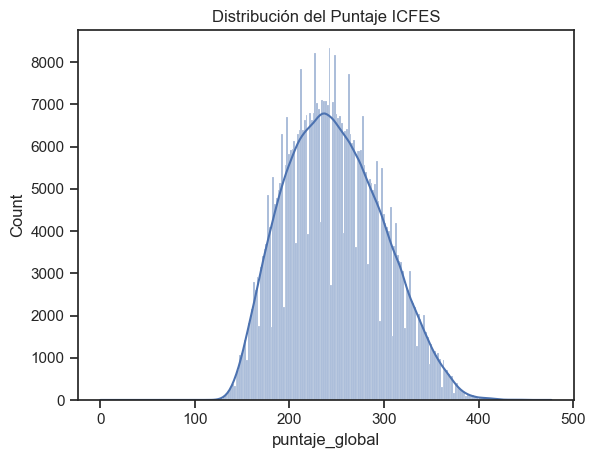

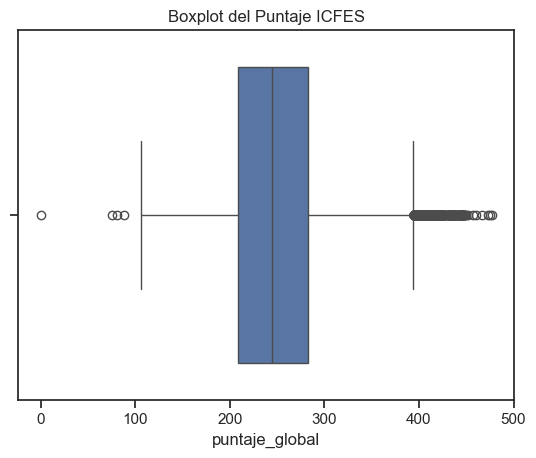

In [71]:
# Histograma con curva KDE
sns.histplot(x, kde=True)
plt.title("Distribución del Puntaje ICFES")
plt.show()

# Boxplot para ver asimetría
sns.boxplot(x=x)
plt.title("Boxplot del Puntaje ICFES")
plt.show()

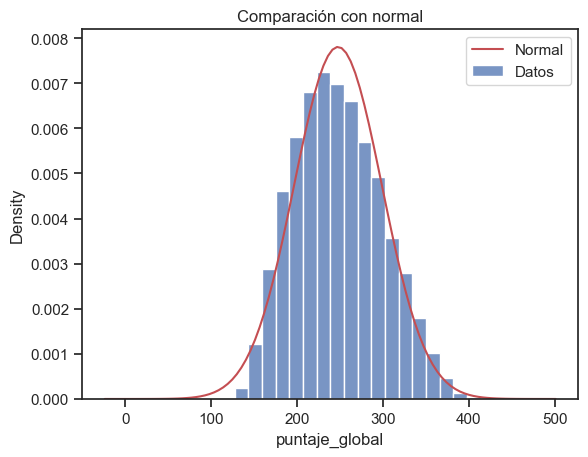

In [72]:
from scipy.stats import norm

# Ajuste normal
mu, sigma = x.mean(), x.std()
sns.histplot(x, kde=False, stat="density", bins=30, label="Datos")
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 100)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', label="Normal")
plt.legend()
plt.title("Comparación con normal")
plt.show()

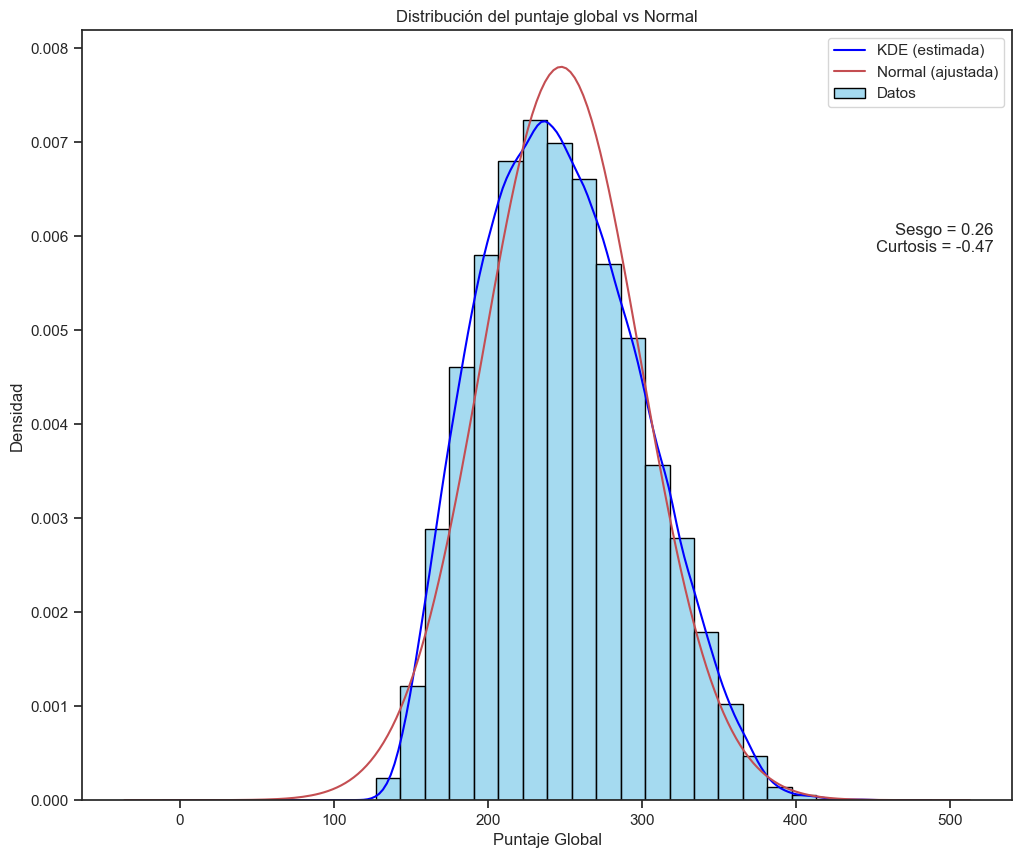

In [73]:
from scipy.stats import norm, skew, kurtosis

# Tomar variable y eliminar nulos
x = icfes['puntaje_global'].dropna()

# Calcular estadísticos
mu, sigma = x.mean(), x.std()
sesgo, curt = skew(x), kurtosis(x)

# --- Histograma con curva KDE y normal ---
plt.figure(figsize=(12,10))

# Histograma real
sns.histplot(x, bins=30, kde=False, stat="density", color="skyblue", edgecolor="black", label="Datos")

# Curva KDE (estimada a partir de los datos)
sns.kdeplot(x, color="blue", label="KDE (estimada)")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', label="Normal (ajustada)")

# Título y leyenda
plt.title("Distribución del puntaje global vs Normal")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()

# Anotación con sesgo y curtosis
plt.annotate(f"Sesgo = {sesgo:.2f}\nCurtosis = {curt:.2f}",
             xy=(0.98, 0.75), xycoords='axes fraction',  # (x, y) en proporción
             ha='right', va='top',
             fontsize=12, bbox=dict(facecolor="white", alpha=0.7))

plt.show()

#### CONCLUSIONES

La variable a predecir, el puntaje del ICFES, presenta una distribución cercana a la normal.

- Sesgo = 0.26 (ligeramente positivo) → La distribución es casi simétrica, pero con una cola un poco más larga hacia la derecha. Es decir, hay algunos estudiantes con puntajes algo más altos que el promedio, que estiran la distribución hacia arriba.

- Curtosis = –0.47 → Este valor indica que la distribución tiene una forma platicúrtica, es decir, algo más achatada o plana que la normal, con colas ligeramente más ligeras, lo que sugiere que no hay concentración de valores extremos.

### 1.2 ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES PREDICTORAS

In [74]:
icfes.head(6)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,5.00,Estrato 3,Moderado,1,1,0,1,1,0,0,0,Peor,>100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,47,33,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00
1,Colombia,Masculino,Andina,No,16,15-19,0,Más de 1 hogar,3.00,Estrato 3,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,30-60 min,Óptimo,Aceptable,Insuficiente,Tecnico/Tecnologo,Microempresario,Tecnico/Tecnologo,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,60,76,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00
2,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar grande,2.00,Estrato 1,Mucho,0,1,0,1,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,66,91,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00
3,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,Estrato 3,Moderado,0,0,1,0,0,0,0,0,Igual,11-25,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller,No Aplica,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,62,81,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00
4,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,4.00,Estrato 3,Mucho,1,1,1,1,1,0,0,0,Mejor,26-100,No lee,Óptimo,Muy Insuficiente,Óptimo,Bachiller,Sin Actividad Remunerada,Bachiller Inc,Sin Actividad Remunerada,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,63,85,57,70,3,55,74,2,57,79,3,52.00,63,A1,288,78.00,52.91,3.00,3.00
6,Colombia,Masculino,Pacífica,Afro,17,15-19,0,Hogar tradicional,3.00,Estrato 4,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,0-30 min,Aceptable,Óptimo,Aceptable,Tecnico/Tecnologo,Profesionales,Postgrado,Sin Actividad Remunerada,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Mañana,Cali,Valle,76,100,70,96,3,70,98,3,68,96,3,72.00,96,B1,355,99.00,66.39,4.00,3.00


In [75]:
num_vars = icfes[['edad', 'puntaje_lectura', 'puntaje_matematicas', 'puntaje_naturales',
                  'puntaje_sociales', 'puntaje_ingles', 'puntaje_global', 'inse_estudiante']]

cat_vars = icfes.select_dtypes(include=['object']).columns.tolist()

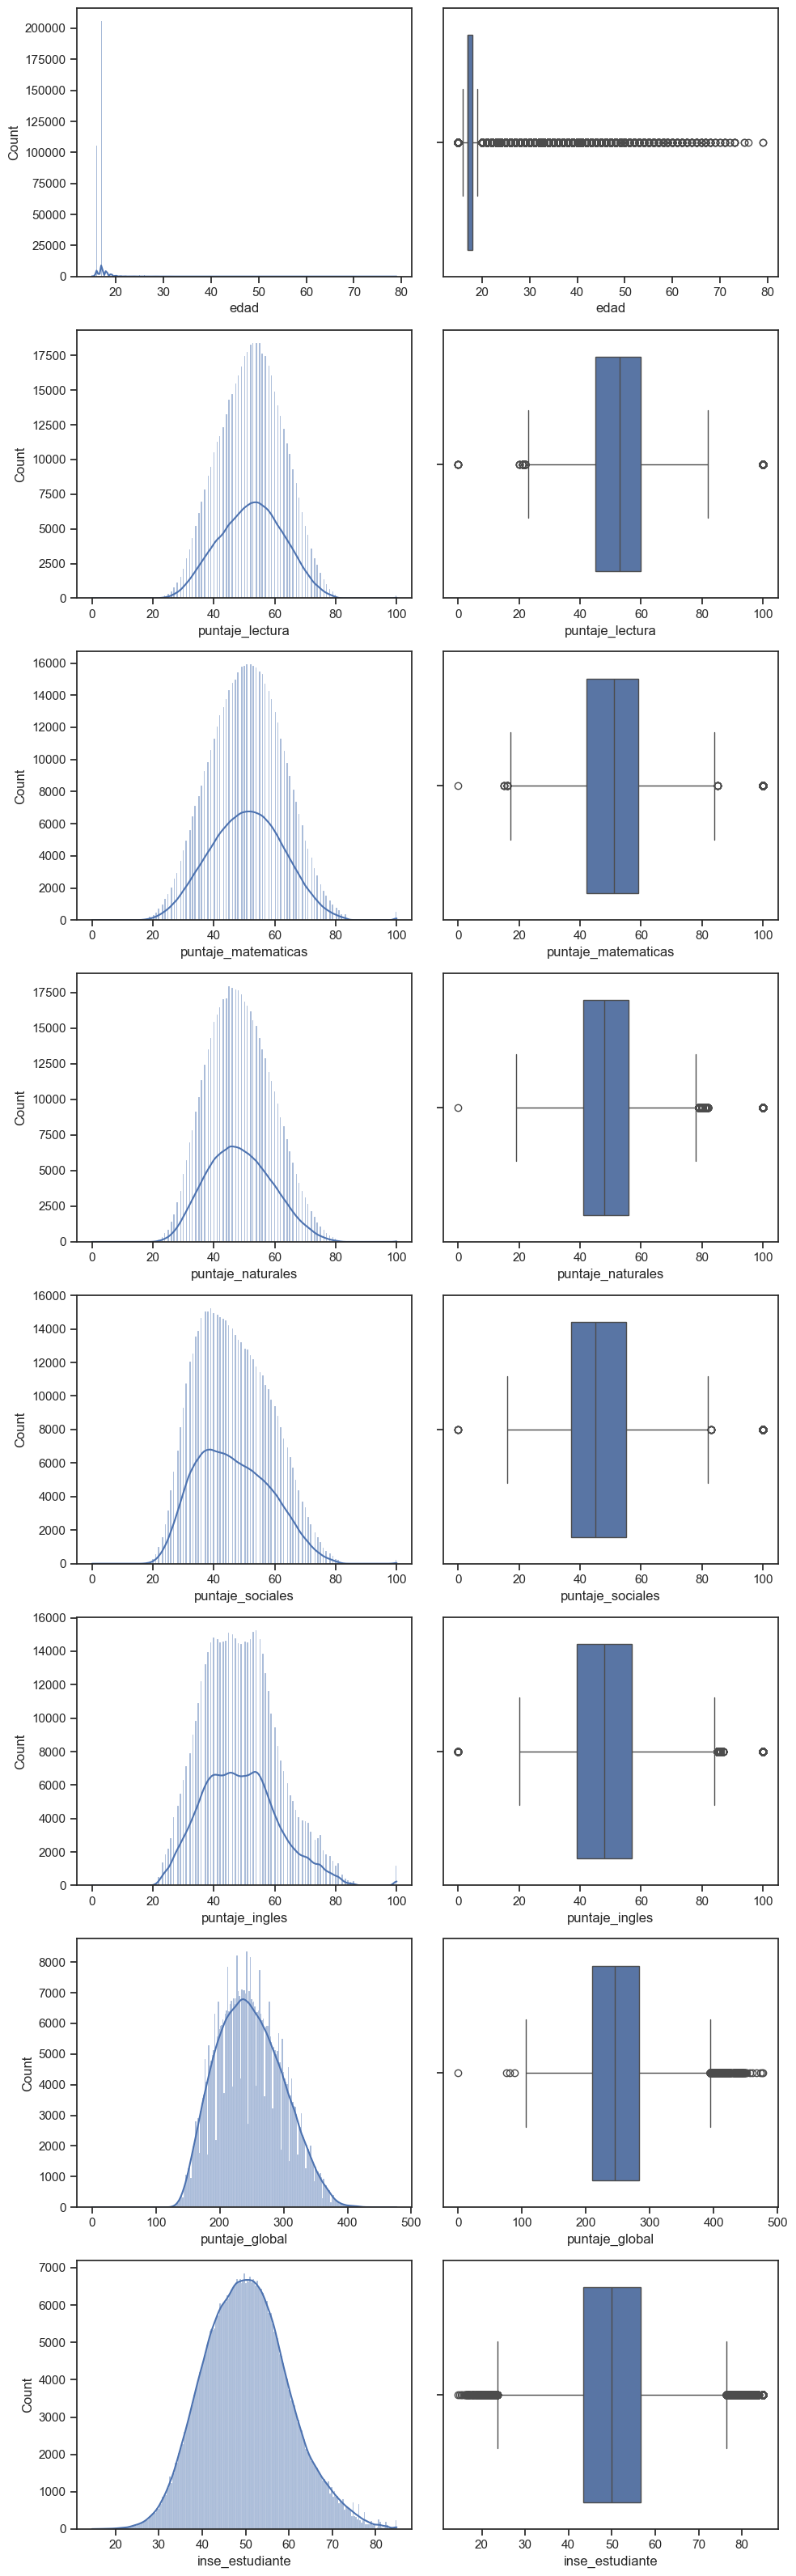

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = num_vars.select_dtypes(include='number').columns
n = len(num_cols)
fig, axes = plt.subplots(n, 2, figsize=(10, 4*n))

for i, col in enumerate(num_cols):
    sns.histplot(num_vars[col], kde=True, ax=axes[i,0])
    sns.boxplot(x=num_vars[col], ax=axes[i,1])

plt.tight_layout()
plt.show()


In [77]:
from scipy.stats import skew, kurtosis
import pandas as pd

def sesgo_curtosis(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            x = df[col].dropna()
            if len(x) == 0:
                continue
            ses = round(skew(x), 2)
            curt = round(kurtosis(x), 2)
            # Interpretaciones...
            if ses > 1:
                interp_sesgo = "Asimetría alta, cola a la derecha"
            elif ses < -1:
                interp_sesgo = "Asimetría alta, cola a la izquierda"
            else:
                interp_sesgo = "Asimetría baja o moderada"
            if curt > 1:
                interp_curtosis = "Distribución más picuda que la normal"
            elif curt < -1:
                interp_curtosis = "Distribución más plana que la normal"
            else:
                interp_curtosis = "Distribución similar a la normal"

            print(f"{col}:")
            print(f"  Sesgo: {ses} ({interp_sesgo})")
            print(f"  Curtosis: {curt} ({interp_curtosis})\n")



In [78]:
sesgo_curtosis(num_vars)

edad:
  Sesgo: 7.04 (Asimetría alta, cola a la derecha)
  Curtosis: 67.94 (Distribución más picuda que la normal)

puntaje_lectura:
  Sesgo: -0.01 (Asimetría baja o moderada)
  Curtosis: -0.35 (Distribución similar a la normal)

puntaje_matematicas:
  Sesgo: 0.06 (Asimetría baja o moderada)
  Curtosis: -0.23 (Distribución similar a la normal)

puntaje_naturales:
  Sesgo: 0.23 (Asimetría baja o moderada)
  Curtosis: -0.32 (Distribución similar a la normal)

puntaje_sociales:
  Sesgo: 0.31 (Asimetría baja o moderada)
  Curtosis: -0.51 (Distribución similar a la normal)

puntaje_ingles:
  Sesgo: 0.45 (Asimetría baja o moderada)
  Curtosis: 0.17 (Distribución similar a la normal)

puntaje_global:
  Sesgo: 0.26 (Asimetría baja o moderada)
  Curtosis: -0.47 (Distribución similar a la normal)

inse_estudiante:
  Sesgo: 0.25 (Asimetría baja o moderada)
  Curtosis: 0.0 (Distribución similar a la normal)



#### CONCLUSIONES

Las variables numéricas predictoras presentan distribuciones acordes a lo esperado. La única que podría resultar conflictiva es edad, que muestra un sesgo positivo (asimetría a la derecha), es decir, concentra la mayoría de los valores alrededor de la media/mediana pero con algunos valores altos alejados de ellas.

Sin embargo, esto se explica por la naturaleza de la variable: aunque la edad típica para presentar el examen ICFES ronda los 17 años, también participan personas con edades mayores, lo que genera esa cola hacia la derecha. Por lo tanto, su sesgo y curtosis son comprensibles y no requieren transformación.

El resto de las variables numéricas no presentan inconvenientes: todas muestran una asimetría baja, y varias de ellas tienen distribuciones cercanas a la normal sin necesidad de transformaciones adicionales.

### 1.3 DETECCIÓN OUTLIERS EN VARIABLE OBJETIVO

Número de outliers: 538


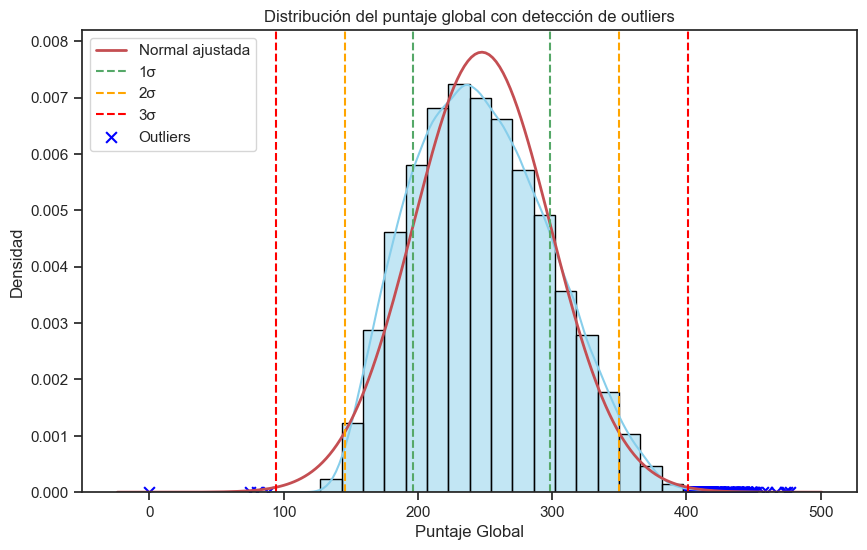

In [79]:

# Extraer variable
y = icfes['puntaje_global'].dropna()

# Normalización (Z-score)
mu, sigma = y.mean(), y.std()
z_scores = (y - mu) / sigma

# Índices de los outliers
outlier_idx = y.index[abs(z_scores) > 3]

# Guardar como lista de tuplas (índice, valor, z-score)
outliers = [(i, y.loc[i], z_scores.loc[i]) for i in outlier_idx]

print("Número de outliers:", len(outliers))

from scipy.stats import norm

plt.figure(figsize=(10,6))

# Histograma con KDE
sns.histplot(y, kde=True, stat="density", bins=30, color="skyblue", edgecolor="black")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', lw=2, label="Normal ajustada")

# Líneas verticales de 1σ, 2σ, 3σ
for k, col in zip([1,2,3], ["g","orange","red"]):
    plt.axvline(mu + k*sigma, color=col, linestyle="--")
    plt.axvline(mu - k*sigma, color=col, linestyle="--", label=f"{k}σ")

# Graficar puntos outliers
plt.scatter(y.loc[outlier_idx], [0]*len(outlier_idx), 
            color="blue", marker="x", s=60, label="Outliers")

plt.title("Distribución del puntaje global con detección de outliers")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()
plt.show()

#### 2.1.1 CONOCER LOS PUNTAJES ATÍPICOS PARA LOS MÁS BAJOS Y MÁS ALTOS

In [80]:
# Extraer variable
y = icfes['puntaje_global'].dropna()

# Calcular media y desviación estándar
mu, sigma = y.mean(), y.std()

# Calcular límites para outliers (3 desviaciones estándar)
limite_inferior = mu - 3 * sigma
limite_superior = mu + 3 * sigma

print(f"Límite inferior (empiezan los más bajos): {limite_inferior:.2f}")
print(f"Límite superior (empiezan los más altos): {limite_superior:.2f}")

Límite inferior (empiezan los más bajos): 94.21
Límite superior (empiezan los más altos): 400.91


#### 2.1.2  EXAMINAR SI LOS VALORES ATÍPICOS BAJOS SON ERRORES O NO

In [81]:
icfes_min_100 = icfes[icfes['puntaje_global'] <= 95]
icfes_min_100.shape

(4, 58)

In [82]:
icfes_min_100.head(20)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
144135,Colombia,Femenino,Pacífica,No,31,30-34,1,Hogar tradicional,2.00,None,Poco,0,0,0,0,0,1,0,0,None,0-10,0-30 min,Insuficiente,Aceptable,Óptimo,nan,None,Primaria,None,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Sabatina,Buenaventura,Valle,0,1,0,1,1,0,1,1,0,1,1,0.00,1,A-,0,1.00,42.44,2.00,2.00
227299,Colombia,Femenino,Pacífica,No,31,30-34,1,Hogar tradicional,2.00,Estrato 2,Poco,0,0,0,0,0,0,0,0,Igual,0-10,No lee,Aceptable,Óptimo,None,Primaria Inc,Trabajadores Operativos,Bachiller Inc,Trabajador Independiente,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Sabatina,Cali,Valle,0,1,20,1,1,22,1,1,21,1,1,41.00,31,A-,88,1.00,46.59,2.00,2.00
244976,Colombia,Masculino,Andina,No,28,25-29,1,Más de 1 hogar,5.00,Estrato 3,Poco,0,1,0,1,1,1,0,1,Igual,None,30-60 min,None,Insuficiente,Aceptable,Primaria Inc,Trabajadores Operativos,Primaria Inc,Microempresario,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Noche,Bogotá D.C.,Bogotá,0,1,16,1,1,21,1,1,20,1,1,25.00,1,A-,75,1.00,47.73,2.00,3.00
360805,Colombia,Masculino,Andina,No,64,60-64,1,None,NaN,Estrato 4,Ninguno,0,1,0,0,0,0,0,1,Peor,0-10,No lee,Muy Insuficiente,Insuficiente,Insuficiente,Ninguna,Profesionales,Ninguna,Microempresario,Tiempo Completo,Remuneración Mixta,Mixto,No Oficial,A,S,Urbano,Sabatina,Medellín,Antioquia,22,1,17,1,1,22,1,1,0,1,1,26.00,2,A-,80,1.00,37.33,1.00,2.00


#### 2.1.3 SE ELIMINA UN POSIBLE ERROR DE TIPEO

In [83]:
icfes = icfes.drop(index=134084)

#### 2.1.4 EXAMINAR SI LOS VALORES ATÍPICOS ALTOS SON ERRORES O NO

In [84]:
icfes_max_400 = icfes[icfes['puntaje_global'] >= 400]
icfes_max_400.shape

(568, 58)

In [85]:
icfes_max_400.head(10)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
3633,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,2.00,Estrato 2,Moderado,1,0,1,1,1,0,1,0,Igual,11-25,>2h,Óptimo,Aceptable,Aceptable,Bachiller,Sin Actividad Remunerada,Bachiller,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Completa,Caucasia,Antioquia,100,100,80,100,4,74,100,4,70,97,3,76.00,98,B1,403,100.00,53.83,3.00,2.00
4997,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar tradicional,3.00,Estrato 3,Promedio,1,1,1,1,1,0,0,1,Mejor,11-25,0-30 min,Óptimo,Óptimo,Insuficiente,Postgrado,Directivos,Postgrado,Directivos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Barranquilla,Atlantico,75,100,100,100,4,76,100,4,76,100,4,100.00,100,B+,416,100.00,71.16,4.00,4.00
6377,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,3.00,Estrato 3,Promedio,1,1,1,1,1,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Tecnico/Tecnologo,Profesionales,Postgrado,Microempresario,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,72,98,100,100,4,77,100,4,74,99,4,100.00,100,B+,411,100.00,66.58,4.00,4.00
7218,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,Estrato 5,Promedio,1,1,1,1,1,1,0,1,Mejor,>100,1-2h,Óptimo,Óptimo,Óptimo,Postgrado,Profesionales,Postgrado,Profesionales,No Trabaja,No Aplica,Masculino,No Oficial,A,S,Rural,Completa,Piedecuesta,Santander,75,100,100,100,4,77,100,4,100,100,4,100.00,100,B+,445,100.00,84.83,4.00,4.00
7467,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,Estrato 2,Promedio,1,1,1,1,1,1,0,1,Mejor,11-25,0-30 min,Óptimo,Aceptable,Insuficiente,Profesional,Profesionales,Postgrado,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Envigado,Antioquia,75,99,77,100,4,100,100,4,78,100,4,78.00,99,B1,411,100.00,72.06,4.00,4.00
7716,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,3.00,Estrato 4,Promedio,1,1,1,1,1,1,0,0,Igual,26-100,0-30 min,Óptimo,Óptimo,Aceptable,Postgrado,Directivos,Postgrado,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,74,99,100,100,4,80,100,4,73,99,4,83.00,100,B+,409,100.00,75.53,4.00,4.00
7851,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,3.00,Estrato 4,Mucho,1,1,1,1,1,1,0,1,Igual,>100,0-30 min,Aceptable,Óptimo,Aceptable,Profesional,Trabajador Independiente,Profesional,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,81,100,100,100,4,100,100,4,75,100,4,100.00,100,B+,449,100.00,70.76,4.00,4.00
7857,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,3.00,Estrato 3,Promedio,1,1,1,1,0,1,1,1,Igual,11-25,30-60 min,Muy Insuficiente,Óptimo,Aceptable,Postgrado,Trabajador Independiente,Profesional,Microempresario,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Mañana,Bucaramanga,Santander,100,100,82,100,4,80,100,4,78,100,4,67.00,92,A2,418,100.00,62.37,3.00,3.00
7867,Colombia,Masculino,Orinoquía,No,16,15-19,0,Hogar tradicional,2.00,Estrato 2,Moderado,1,1,1,1,1,0,1,0,Peor,>100,1-2h,Óptimo,Óptimo,Aceptable,Bachiller,Microempresario,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial

#### CONCLUSIONES

Los puntajes atípicamente bajos se observaron principalmente en personas que presentaron el examen fuera de la edad típica. Esto podría estar relacionado con un menor tiempo de estudio o con trayectorias académicas más irregulares, lo cual podría haber afectado su desempeño. Sin embargo, estos casos son muy pocos: solo 4 entre más de 30.000 participantes.

Por otro lado, los puntajes atípicamente altos (superiores a los 400 puntos) corresponden en su mayoría a estudiantes con un nivel socioeconómico (NSE) alto, tanto a nivel individual como institucional (colegio), lo cual sugiere que el contexto socioeconómico podría favorecer un mejor rendimiento.

### 1.3 DETECCIÓN DE OUTLIERS DE OTRAS VARIABLES NUMÉRICAS

In [86]:
icfes.sample(20)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
307146,Colombia,Femenino,Andina,No,16,15-19,0,Hogar tradicional,2.00,Estrato 3,Promedio,1,1,1,1,1,1,0,0,Igual,0-10,30-60 min,Aceptable,Aceptable,Insuficiente,Bachiller Inc,Trabajadores Operativos,Bachiller Inc,Sin Actividad Remunerada,Trabajo Ocasional,Sin Remuneración,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,55,61,47,39,2,50,59,2,48,57,2,53.00,66,A1,251,55.00,52.22,3.00,3.00
431938,Colombia,Femenino,Andina,No,17,15-19,0,Hogar grande,2.00,Estrato 2,Promedio,1,0,1,1,0,1,1,0,Igual,26-100,1-2h,Aceptable,Aceptable,Muy Insuficiente,Primaria Inc,Sin Actividad Remunerada,Tecnico/Tecnologo,Trabajador Independiente,Tiempo Completo,Sin Remuneración,Femenino,Oficial,A,S,Urbano,Tarde,Bogotá D.C.,Bogotá,63,83,59,74,3,55,73,2,54,73,2,59.00,81,A2,289,79.00,50.85,2.00,3.00
507137,Colombia,Masculino,Caribe,No,18,15-19,0,Más de 1 hogar,5.00,Estrato 1,Poco,0,1,0,0,1,0,0,0,Igual,0-10,No lee,Aceptable,Aceptable,Aceptable,Primaria Inc,Sin Actividad Remunerada,Primaria Inc,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Malambo,Atlantico,60,77,66,91,3,59,83,3,59,83,3,60.00,84,A2,305,86.00,40.94,1.00,2.00
480568,Colombia,Femenino,Andina,No,16,15-19,0,Hogar tradicional,3.00,Estrato 2,Promedio,1,1,1,1,1,0,1,1,Mejor,>100,>2h,Óptimo,Óptimo,Óptimo,Tecnico/Tecnologo,Pensionado,Profesional Inc,Sin Información,No Trabaja,No Aplica,Femenino,Oficial,A,S,Urbano,Unica,Medellín,Antioquia,66,90,66,90,3,70,98,3,60,85,3,80.00,100,B+,333,95.00,67.88,4.00,3.00
405196,Colombia,Femenino,Andina,No,17,15-19,0,Hogar grande,3.00,Estrato 1,Poco,0,1,0,0,0,0,0,0,Mejor,0-10,0-30 min,Insuficiente,Insuficiente,Muy Insuficiente,Primaria Inc,Trabajadores Operativos,Bachiller,Sector Primario,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Rural,Sabatina,Sabana De Torres,Santander,51,44,36,12,2,35,10,1,36,24,1,40.00,27,A-,198,19.00,34.11,1.00,2.00
195946,Colombia,Masculino,Caribe,No,16,15-19,0,Hogar grande,3.00,Estrato 3,Moderado,0,1,0,1,1,0,0,0,Igual,26-100,30-60 min,Aceptable,Óptimo,Insuficiente,Bachiller Inc,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,Baranoa,Atlantico,45,26,48,40,2,44,38,2,34,18,1,47.00,48,A-,215,30.00,47.19,2.00,2.00
486796,Colombia,Femenino,Amazónica,No,18,15-19,0,Más de 1 hogar,4.00,Estrato 3,Poco,0,1,1,0,1,0,1,0,Igual,26-100,0-30 min,Muy Insuficiente,Insuficiente,Insuficiente,Bachiller Inc,Microempresario,Bachiller Inc,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,N,Urbano,Mañana,Puerto Asís,Putumayo,53,51,49,44,2,44,38,2,42,40,2,48.00,50,A1,235,44.00,46.31,2.00,2.00
390989,Colombia,Masculino,Andina,No,19,15-19,0,Hogar tradicional,4.00,Estrato 2,Moderado,1,1,0,0,0,0,0,1,Igual,11-25,0-30 min,Insuficiente,Aceptable,Aceptable,Primaria Inc,Directivos,Primaria,Sector Primario,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,47,32,44,30,2,42,31,2,40,34,1,35.00,14,A-,213,29.00,48.01,2.00,3.00
493884,Colombia,Femenino,Andina,No,17,15-19,0,Más de 1 hogar,5.00,Estrato 3,Moderado,1,1,1,1,1,1,0,1,Igual,26

In [87]:
num_vars

,edad,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante
0,17,47,48,37,30,54.00,208,50.94
1,16,60,65,54,59,63.00,299,59.76
2,18,66,57,41,74,64.00,299,50.76
3,17,62,54,61,73,53.00,309,45.77
4,17,63,57,55,57,52.00,288,52.91
...,...,...,...,...,...,...,...,...
543733,20,76,78,65,74,58.00,360,47.58
543734,17,75,73,72,67,74.00,360,57.40
543735,17,72,83,71,77,72.00,377,71.22
543736,17,59,61,54,52,46.00,278,38.13


In [88]:
def valores_z (df):
    for col in df.columns:
        media, desviacion = df[col].mean(), df[col].std()
        z_scores = (df[col] - media) / desviacion
        outlier_idx = df.index[abs(z_scores) > 3]
        print(f"{col}: {len(outlier_idx)} outliers")

In [89]:
valores_z(num_vars)

edad: 9187 outliers
puntaje_lectura: 220 outliers
puntaje_matematicas: 515 outliers
puntaje_naturales: 270 outliers
puntaje_sociales: 231 outliers
puntaje_ingles: 1266 outliers
puntaje_global: 538 outliers
inse_estudiante: 1505 outliers


In [90]:
import pandas as pd

def limites_outliers(df):
    """
    Calcula límites de outliers (basados en ± 3 desviaciones estándar)
    para todas las variables numéricas del DataFrame.

    Retorna un diccionario con los límites inferior y superior por variable.
    """
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            x = df[col].dropna()
            if len(x) == 0:
                continue

            mu, sigma = x.mean(), x.std()
            limite_inferior = mu - 3 * sigma
            limite_superior = mu + 3 * sigma

            print(f"{col}:")
            print(f"  Media: {mu:.2f}")
            print(f"  Desviación estándar: {sigma:.2f}")
            print(f"  Límite inferior (empiezan los más bajos): {limite_inferior:.2f}")
            print(f"  Límite superior (empiezan los más altos): {limite_superior:.2f}\n")


In [91]:
limites_outliers(num_vars)

edad:
  Media: 17.75
  Desviación estándar: 3.05
  Límite inferior (empiezan los más bajos): 8.58
  Límite superior (empiezan los más altos): 26.91

puntaje_lectura:
  Media: 52.36
  Desviación estándar: 10.47
  Límite inferior (empiezan los más bajos): 20.96
  Límite superior (empiezan los más altos): 83.76

puntaje_matematicas:
  Media: 50.92
  Desviación estándar: 11.92
  Límite inferior (empiezan los más bajos): 15.16
  Límite superior (empiezan los más altos): 86.67

puntaje_naturales:
  Media: 48.58
  Desviación estándar: 10.66
  Límite inferior (empiezan los más bajos): 16.59
  Límite superior (empiezan los más altos): 80.57

puntaje_sociales:
  Media: 46.45
  Desviación estándar: 12.14
  Límite inferior (empiezan los más bajos): 10.03
  Límite superior (empiezan los más altos): 82.87

puntaje_ingles:
  Media: 48.71
  Desviación estándar: 12.51
  Límite inferior (empiezan los más bajos): 11.18
  Límite superior (empiezan los más altos): 86.24

puntaje_global:
  Media: 247.56
  D

#### CONCLUSIONES

Aunque el análisis con valores Z identificó cientos de valores extremos en algunas variables y miles en otras, al revisar más a fondo se encontró que dichos valores corresponden a resultados plausibles dentro del contexto del examen ICFES (Saber 11).

Por lo tanto, no se considera necesario aplicar un tratamiento o transformación a estas variables, ya que los valores identificados como extremos no representan errores ni datos atípicos no válidos, sino variabilidad normal en el desempeño de los estudiantes. 

### 1.4 IDENTIFICAR VARIABLES CON ALTA VARIABILIDAD

In [92]:
def resumen_variabilidad(df, num_vars=None):
    if num_vars is None:
        num_vars = df.select_dtypes(include=np.number).columns.tolist()

    resumen = []

    for col in num_vars:
        x = df[col].dropna()

        media = x.mean()
        std = x.std()
        var = x.var()
        rango = x.max() - x.min()
        iqr = x.quantile(0.75) - x.quantile(0.25)
        mad = (x - x.median()).abs().mean()
        cv = std / media if media != 0 else np.nan

        # Diagnóstico básico
        diagnostico = []
        if cv < 0.1:
            diagnostico.append("Baja variabilidad (CV<0.1)")
        elif cv > 1:
            diagnostico.append("Alta variabilidad relativa (CV>1)")
        if rango > 10 * iqr:
            diagnostico.append("Posibles outliers (rango muy amplio)")
        if mad > iqr:
            diagnostico.append("Alta dispersión alrededor de la mediana")

        resumen.append({
            "variable": col,
            "media": round(media, 2),
            "std": round(std, 2),
            "varianza": round(var, 2),
            "rango": round(rango, 2),
            "IQR": round(iqr, 2),
            "MAD": round(mad, 2),
            "CV": round(cv, 2) if not np.isnan(cv) else "NA",
            "diagnóstico": ", ".join(diagnostico) if diagnostico else "Sin problemas relevantes"
        })

    return pd.DataFrame(resumen)

In [93]:
resumen_variabilidad(num_vars)

,variable,media,std,varianza,rango,IQR,MAD,CV,diagnóstico
0,edad,17.75,3.05,9.33,64.00,1.00,1.20,0.17,"Posibles outliers (rango muy amplio), Alta dis..."
1,puntaje_lectura,52.36,10.47,109.55,100.00,15.00,8.52,0.20,Sin problemas relevantes
2,puntaje_matematicas,50.92,11.92,142.04,100.00,17.00,9.67,0.23,Sin problemas relevantes
3,puntaje_naturales,48.58,10.66,113.70,100.00,15.00,8.68,0.22,Sin problemas relevantes
4,puntaje_sociales,46.45,12.14,147.34,100.00,18.00,10.06,0.26,Sin problemas relevantes
5,puntaje_ingles,48.71,12.51,156.52,100.00,18.00,10.05,0.26,Sin problemas relevantes
6,puntaje_global,247.56,51.12,2613.04,477.00,74.00,41.91,0.21,Sin problemas relevantes
7,inse_estudiante,50.30,9.76,95.23,70.24,13.20,7.79,0.19,Sin problemas relevantes


### 1.5 GRÁFICOS DE CONTEO

In [94]:
icfes.sample(8)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
239082,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar tradicional,2.00,Estrato 1,Poco,1,0,0,0,1,0,0,0,Mejor,11-25,No lee,Insuficiente,Muy Insuficiente,Muy Insuficiente,Primaria,No Aplica,Primaria,Sector Primario,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,La Gloria,Cesar,32,3,39,19,2,36,14,1,31,10,1,38.00,22,A-,174,7.00,40.42,1.00,2.00
517072,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,3.00,Estrato 3,Promedio,1,1,1,1,1,0,1,0,Igual,0-10,No lee,Óptimo,Óptimo,Óptimo,Tecnico/Tecnologo,Trabajadores Operativos,Tecnico/Tecnologo,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,58,69,70,95,3,62,89,3,61,87,3,51.00,61,A1,309,88.00,59.78,3.00,3.00
295702,Colombia,Femenino,Caribe,No,18,15-19,0,Hogar grande,2.00,Estrato 1,Ninguno,0,0,0,0,1,1,0,0,Igual,11-25,No lee,Óptimo,Insuficiente,Insuficiente,Primaria Inc,Trabajadores Operativos,Bachiller Inc,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,Sabanalarga,Atlantico,29,1,37,14,2,25,1,1,25,2,1,30.00,7,A-,145,1.00,44.08,2.00,2.00
27947,Colombia,Masculino,Andina,No,18,15-19,0,Hogar tradicional,2.00,Estrato 3,Moderado,1,1,1,1,0,0,0,0,Mejor,11-25,>2h,Óptimo,Óptimo,Óptimo,None,Microempresario,Primaria,Sin Información,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,60,76,64,86,3,66,95,3,64,92,3,50.00,57,A1,312,89.00,55.99,3.00,3.00
120479,Colombia,Masculino,Andina,No,18,15-19,0,Hogar tradicional,3.00,Estrato 2,Promedio,1,1,1,1,1,0,1,0,Peor,0-10,0-30 min,Óptimo,Aceptable,Aceptable,Tecnico/Tecnologo Inc,Sin Información,Tecnico/Tecnologo Inc,Sin Información,Trabajo Ocasional,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Noche,Madrid,Cundinamarca,66,90,62,83,3,55,72,2,51,65,2,59.00,81,A2,293,81.00,56.88,3.00,3.00
258678,Colombia,Masculino,Pacífica,Afro,17,15-19,0,Hogar tradicional,4.00,Estrato 2,Moderado,1,1,0,0,1,0,1,0,Mejor,0-10,0-30 min,Insuficiente,Aceptable,Insuficiente,Bachiller Inc,Trabajador Independiente,Bachiller,No Aplica,No Trabaja,No Aplica,Mixto,Oficial,A,S,Rural,Mañana,Candelaria,Valle,38,10,53,58,3,44,37,2,33,15,1,45.00,43,A-,211,27.00,47.51,2.00,2.00
81845,Colombia,Femenino,Pacífica,Afro,17,15-19,0,Más de 1 hogar,5.00,None,Moderado,1,0,0,0,0,0,0,0,Mejor,0-10,0-30 min,Insuficiente,Aceptable,Aceptable,Primaria Inc,Sector Primario,Primaria,Sector Primario,Trabajo Ocasional,Sin Remuneración,Mixto,Oficial,A,S,Rural,Mañana,Buenaventura,Valle,32,3,32,7,1,40,23,1,42,40,2,25.00,2,A-,178,9.00,36.15,1.00,1.00
208923,Colombia,Masculino,Andina,No,17,15-19,0,Hogar grande,3.00,Estrato 2,Moderado,0,1,0,1,0,0,0,0,Peor,11-25,0-30 min,Insuficiente,Aceptable,Insuficiente,Primaria,Sin Actividad Remunerada,Bachiller,Trabajador Independiente,Medio Tiempo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Unica,Aranzazu,Caldas,57,65,67,92,3,64,93,3,57,80,3,49.00,53,A1,302,85.00,43.68,2.00,2.00


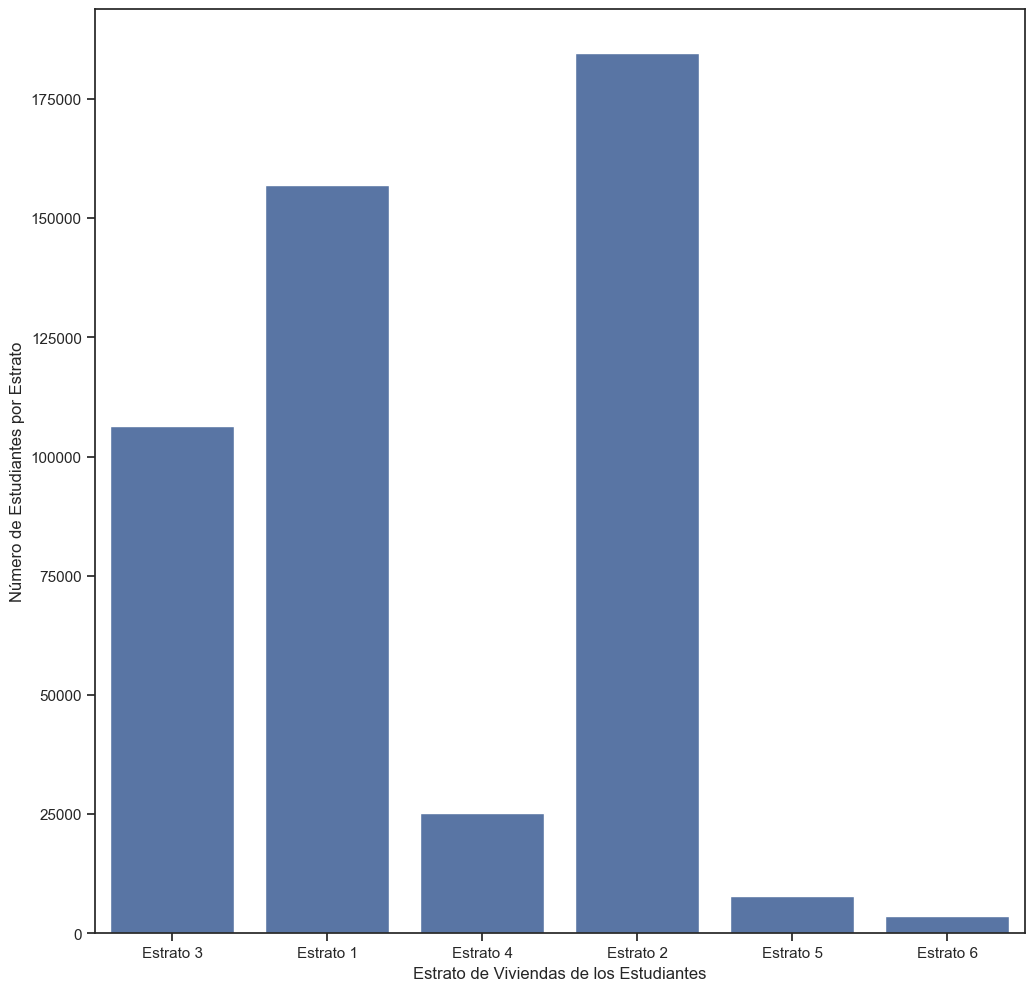

In [95]:
### NÚMERO DE ESTUDIANTES POR ESTRATO SOCIOECONÓMICO

estrato_conteo = icfes['estrato_casa'].dropna()

plt.figure(figsize=(12, 12))
sns.countplot(x=estrato_conteo)

plt.ylabel('Número de Estudiantes por Estrato')
plt.xlabel('Estrato de Viviendas de los Estudiantes')
plt.show()

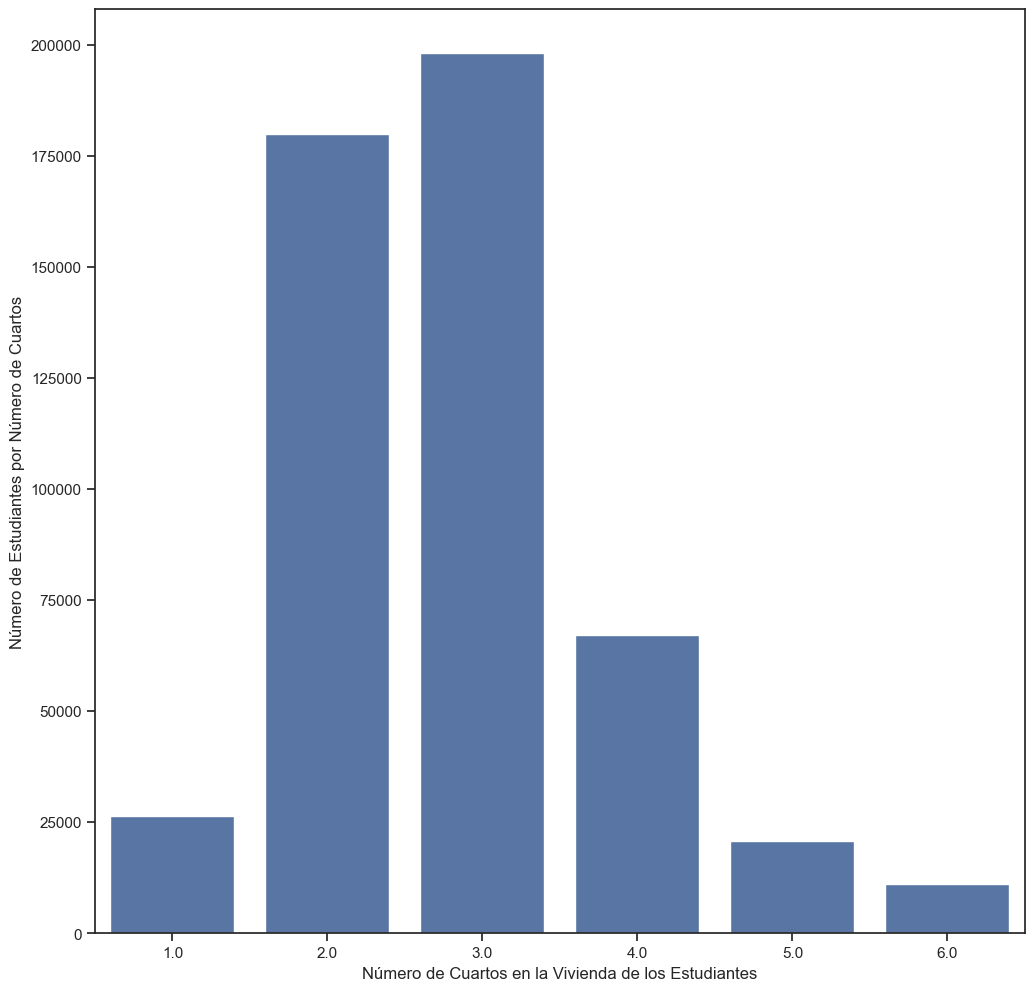

In [96]:
cuartos_casa_conteo = icfes['num_cuartos_casa'].dropna()

plt.figure(figsize=(12, 12))
sns.countplot(x=cuartos_casa_conteo)

plt.ylabel('Número de Estudiantes por Número de Cuartos')
plt.xlabel('Número de Cuartos en la Vivienda de los Estudiantes')
plt.show()

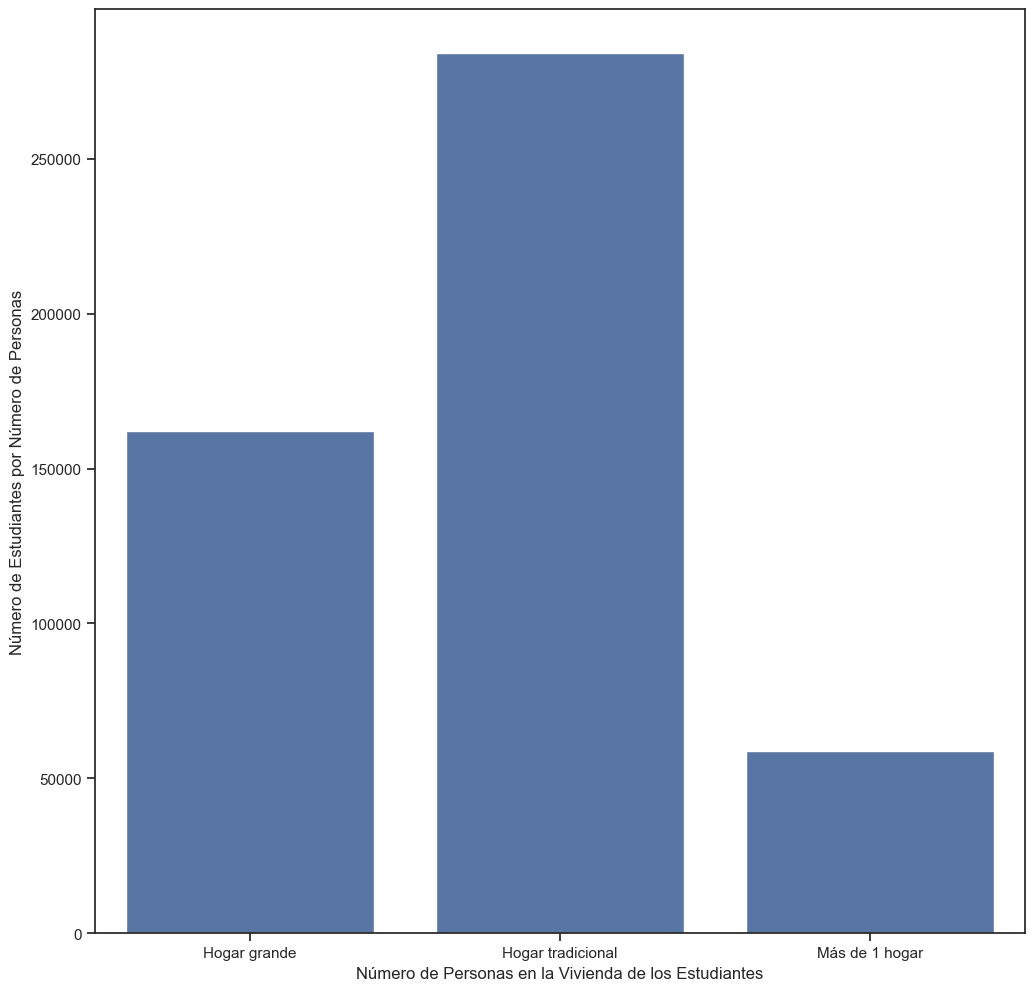

In [97]:
plt.figure(figsize=(12,12))
sns.countplot(x = 'num_personas_casa', data = icfes, order = sorted(icfes['num_personas_casa'].dropna().unique()))
plt.ylabel('Número de Estudiantes por Número de Personas')
plt.xlabel('Número de Personas en la Vivienda de los Estudiantes')
plt.show()

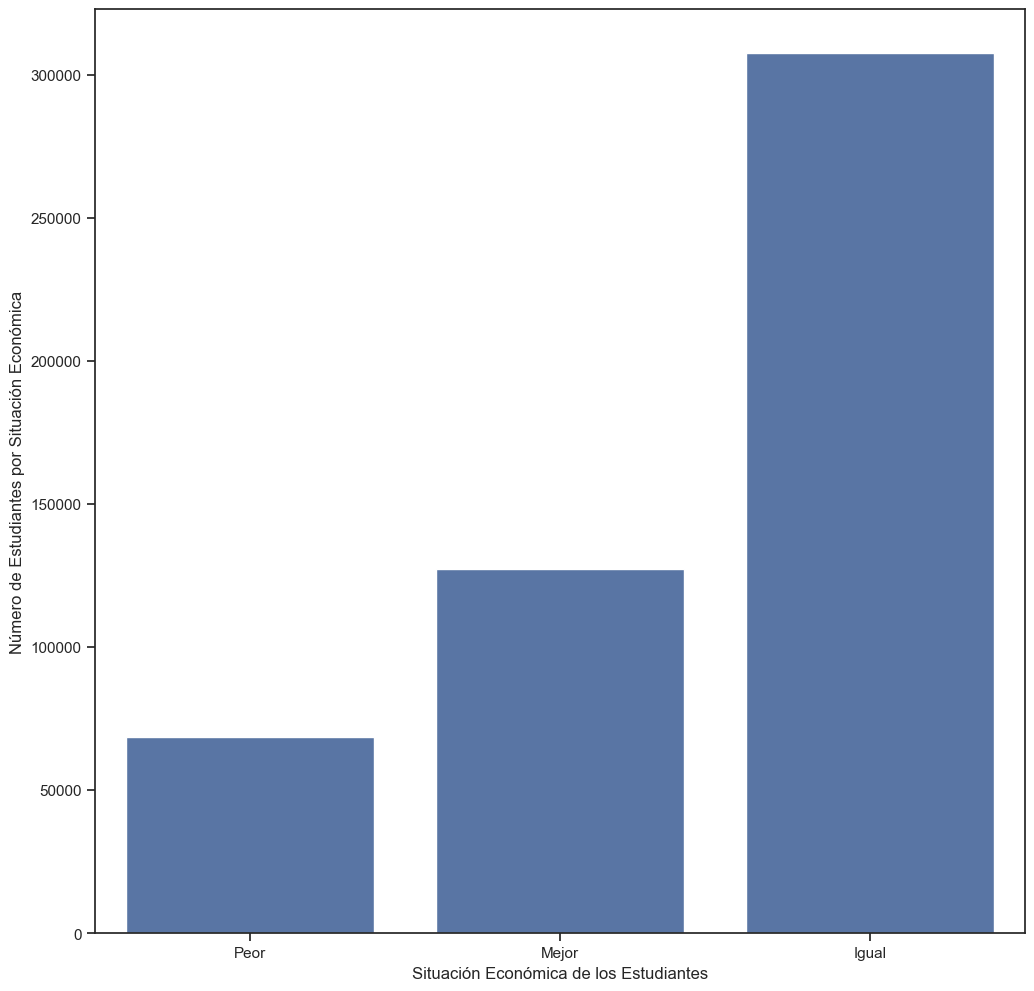

In [98]:
situacion_economica_conteo = icfes['situacion_economica_casa'].dropna()

plt.figure(figsize=(12, 12))
sns.countplot(x=situacion_economica_conteo)

plt.ylabel('Número de Estudiantes por Situación Económica')
plt.xlabel('Situación Económica de los Estudiantes')
plt.show()

In [99]:
def plot_categorical_distribution(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=df[column].dropna(), order=df[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

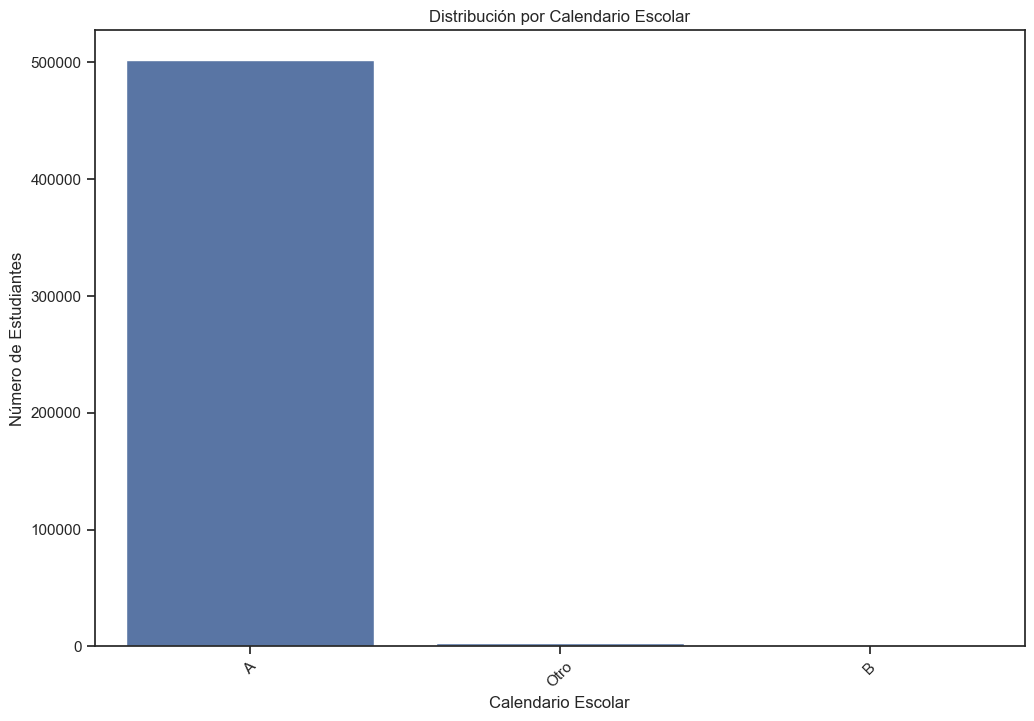

In [100]:
plot_categorical_distribution(icfes, 'colegio_calendario', 'Distribución por Calendario Escolar', 'Calendario Escolar', 'Número de Estudiantes')

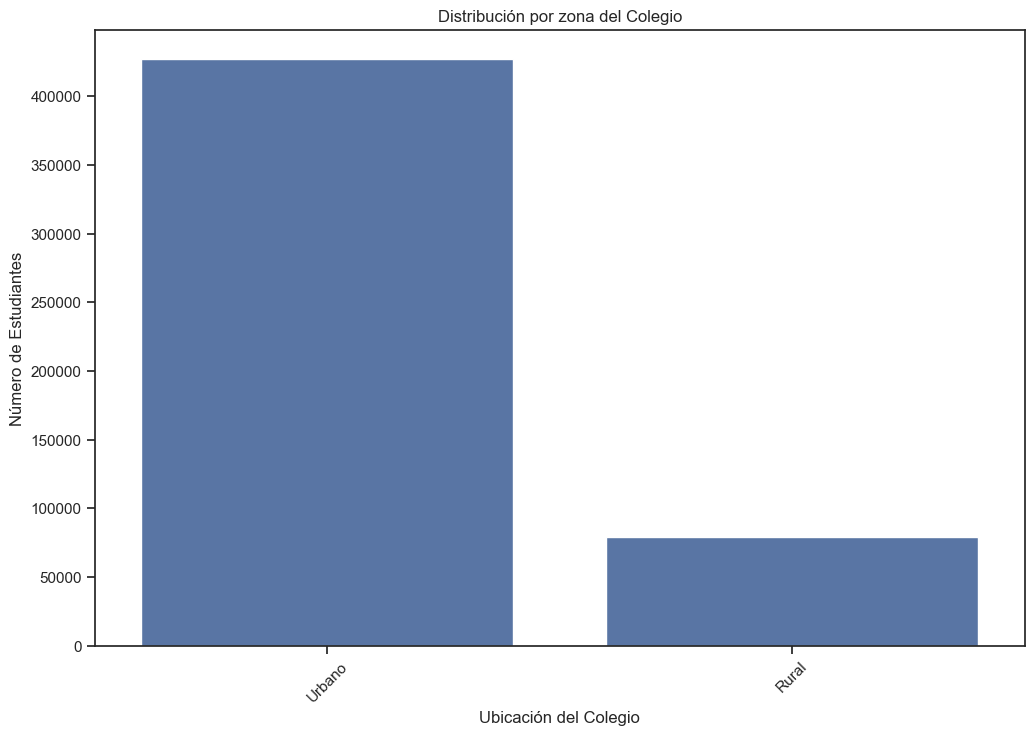

In [101]:
plot_categorical_distribution(icfes, 'colegio_area', 'Distribución por zona del Colegio', 'Ubicación del Colegio', 'Número de Estudiantes')

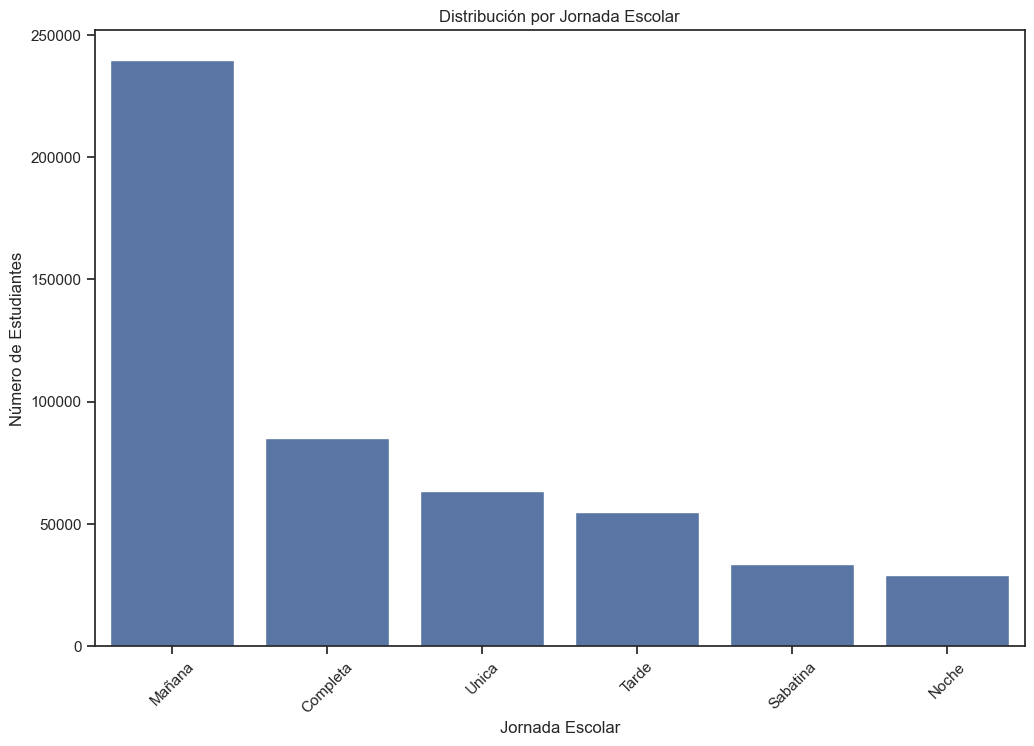

In [102]:
plot_categorical_distribution(icfes, 'colegio_jornada', 'Distribución por Jornada Escolar', 'Jornada Escolar', 'Número de Estudiantes')

## 2. ANÁLISIS BIVARIADO

### 2.1 ANÁLISIS DE CORRELACIÓN LINEAL

In [103]:
from scipy.stats import spearmanr

def analisis_correlacion(df, target, num_vars=None):
    if num_vars is None:
        # Detectar solo numéricas
        num_vars = df.select_dtypes(include=np.number).columns.tolist()
    
    # Quitar el target de la lista si está ahí
    num_vars = [v for v in num_vars if v != target]

    resultados = []

    for var in num_vars:
        x = df[var]
        y = df[target]

        # Correlación de Pearson
        pearson = x.corr(y, method='pearson')

        # Correlación de Spearman
        # spearmanr devuelve r, p_value
        spear_r, spear_p = spearmanr(x, y, nan_policy='omit')

        # Interpretación de fuerza (Pearson)
        fuerza = ""
        if abs(pearson) < 0.1:
            fuerza = "Muy débil"
        elif abs(pearson) < 0.3:
            fuerza = "Débil"
        elif abs(pearson) < 0.5:
            fuerza = "Moderada"
        elif abs(pearson) < 0.7:
            fuerza = "Fuerte"
        else:
            fuerza = "Muy fuerte"

        direccion = "Positiva" if pearson > 0 else "Negativa" if pearson < 0 else "Nula"

        resultados.append({
            "Variable": var,
            "Pearson": round(pearson, 3),
            "Spearman": round(spear_r, 3),
            "Fuerza (Pearson)": fuerza,
            "Dirección (Pearson)": direccion
        })

    return pd.DataFrame(resultados).sort_values(by="Pearson", ascending=False)


In [104]:
# Crear máscara para las columnas a eliminar
mask = (icfes.columns.str.startswith('puntaje_') & (icfes.columns != 'puntaje_global')) | icfes.columns.str.startswith('percentil_') | icfes.columns.str.startswith('nivel_')

# Drop solo de esas columnas, pero dejando el target
correlaciones = icfes.drop(icfes.columns[mask], axis=1)

# Ahora sí, el target sigue estando disponible
analisis_correlacion(correlaciones, target='puntaje_global')

,Variable,Pearson,Spearman,Fuerza (Pearson),Dirección (Pearson)
11,inse_estudiante,0.45,0.43,Moderada,Positiva
13,nse_colegio,0.44,0.42,Moderada,Positiva
12,nse_estudiante,0.41,0.40,Moderada,Positiva
5,computador,0.29,0.29,Débil,Positiva
3,internet,0.29,0.29,Débil,Positiva
8,carro,0.20,0.19,Débil,Positiva
7,microndas,0.17,0.17,Débil,Positiva
10,consola,0.17,0.16,Débil,Positiva
6,lavadora,0.16,0.16,Débil,Positiva
4,tv,0.14,0.14,Débil,Positiva


### 2.2 VISUALIZACIONES DE RELACIONES BIVARIADAS

#### 2.2.1 PUNTAJE Y ESTRATO ECONÓMICO

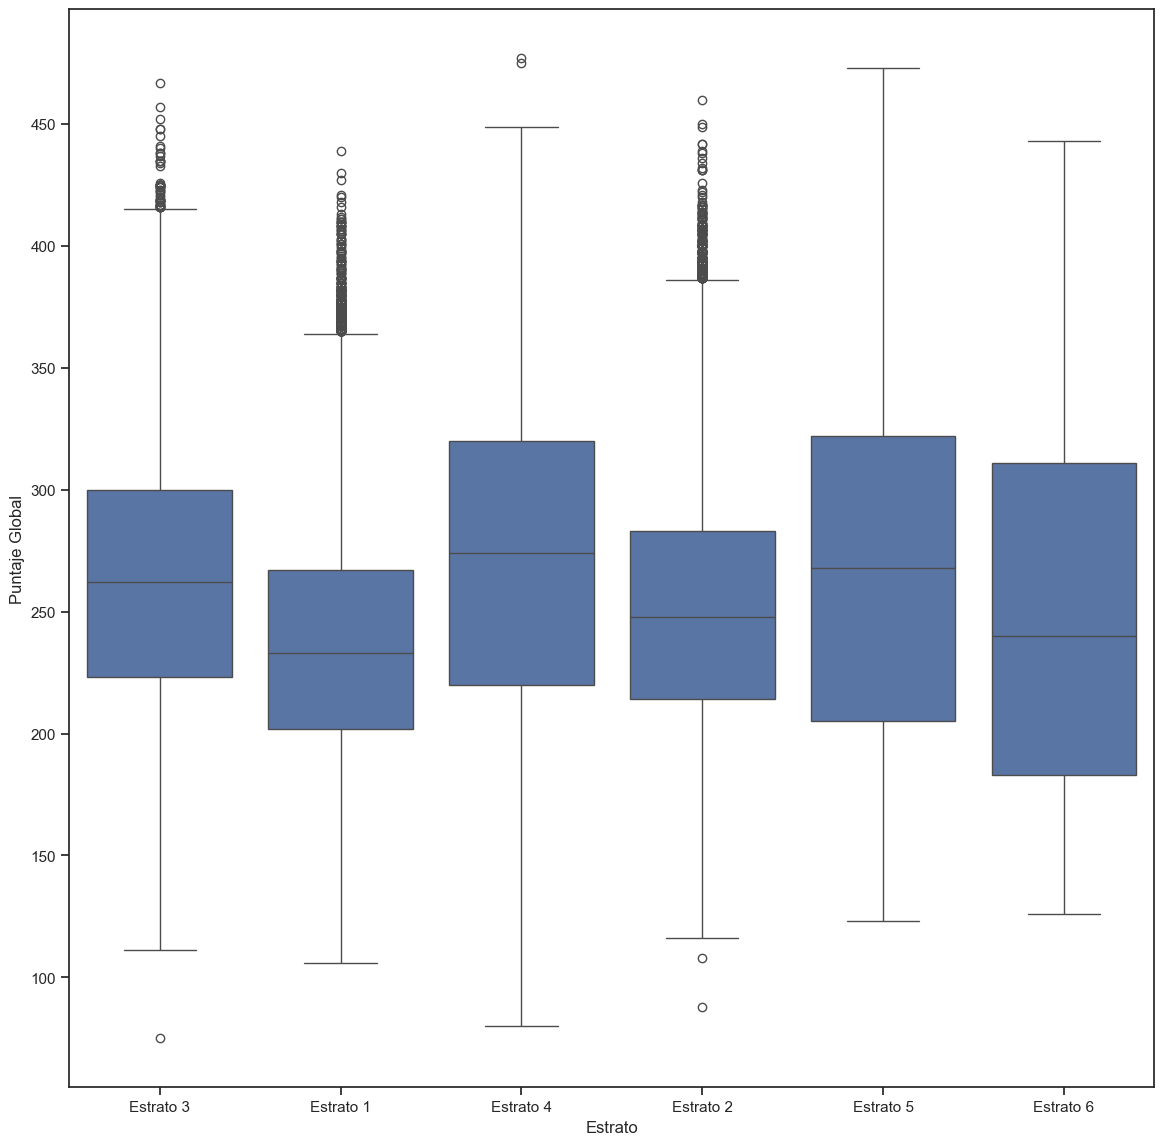

In [105]:
## Puntaje del ICFES en función del estrato de la vivienda del estudiante

plt.figure(figsize = (14,14))
sns.set_theme(style="ticks")

sns.boxplot(x = "estrato_casa", y = "puntaje_global",
            data = icfes)

plt.xlabel('Estrato')
plt.ylabel('Puntaje Global')
plt.show()

In [106]:
icfes['estrato_casa'] = icfes['estrato_casa'].astype('category')

In [107]:
icfes['estrato_casa'].value_counts(dropna=False).sort_index(ascending=True)

estrato_casa
Estrato 1    156896
Estrato 2    184586
Estrato 3    106368
Estrato 4     25244
Estrato 5      7823
Estrato 6      3619
NaN           21636
Name: count, dtype: int64

In [108]:
icfes.sample(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
454803,Colombia,Masculino,Andina,No,19,15-19,0,Más de 1 hogar,3.00,Estrato 1,Moderado,0,1,0,0,1,0,0,0,Igual,0-10,30-60 min,Insuficiente,Insuficiente,Insuficiente,Bachiller,Sector Primario,Bachiller,Sector Primario,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Arboletes,Antioquia,42,18,52,55,3,41,28,2,45,48,2,46.00,46,A-,225,37.00,38.25,1.00,2.00
32321,Colombia,Masculino,Andina,No,16,15-19,0,Hogar tradicional,3.00,Estrato 4,Promedio,1,1,1,1,1,0,1,1,Peor,11-25,No lee,Óptimo,Óptimo,Insuficiente,Bachiller Inc,Sin Actividad Remunerada,Tecnico/Tecnologo,No Aplica,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Envigado,Antioquia,49,38,62,82,3,49,54,2,48,58,2,56.00,74,A1,262,62.00,58.01,3.00,3.00
233920,Colombia,Masculino,Andina,No,19,15-19,0,Más de 1 hogar,3.00,Estrato 1,Moderado,1,1,0,1,0,0,0,0,Igual,>100,0-30 min,Óptimo,Óptimo,Insuficiente,Bachiller,Trabajador Independiente,Tecnico/Tecnologo Inc,No Aplica,Trabajo Ocasional,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Unica,Bogotá D.C.,Bogotá,44,25,49,46,2,38,18,1,38,29,1,33.00,10,A-,208,25.00,53.54,3.00,2.00
64308,Colombia,Femenino,Caribe,No,17,15-19,0,Hogar tradicional,1.00,Estrato 3,Mucho,0,1,0,1,0,0,0,0,Mejor,11-25,30-60 min,Óptimo,Aceptable,Aceptable,None,Trabajadores Operativos,Tecnico/Tecnologo Inc,Directivos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Santa Marta,Magdalena,53,52,39,18,2,46,44,2,42,42,2,42.00,33,A-,224,36.00,48.72,2.00,3.00
146572,Colombia,Masculino,Caribe,No,20,20-24,1,Más de 1 hogar,3.00,Estrato 1,Moderado,0,0,0,1,0,0,1,1,Igual,0-10,30-60 min,Muy Insuficiente,Insuficiente,Muy Insuficiente,Primaria Inc,Sin Actividad Remunerada,Bachiller Inc,Trabajadores Operativos,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Noche,Barranquilla,Atlantico,41,17,43,26,2,40,23,1,30,7,1,39.00,25,A-,193,16.00,38.52,1.00,3.00


In [109]:
icfes['estrato_cat'] = icfes['estrato_casa'].replace({
    1: 'Bajo',
    2: 'Bajo',
    3: 'Medio',
    4: 'Medio',
    5: 'Alto',
    6: 'Alto'
})

In [110]:
# Ejemplo de análisis cruzado
pd.crosstab(icfes['estrato_cat'], icfes['colegio_naturaleza'], normalize='index', margins=True).style.format("{:.2f}")

colegio_naturaleza,No Oficial,Oficial
estrato_cat,,
Estrato 1,0.10,0.90
Estrato 2,0.21,0.79
Estrato 3,0.39,0.61
Estrato 4,0.59,0.41
Estrato 5,0.61,0.39
Estrato 6,0.51,0.49
All,0.24,0.76


<Axes: xlabel='estrato_cat', ylabel='puntaje_global'>

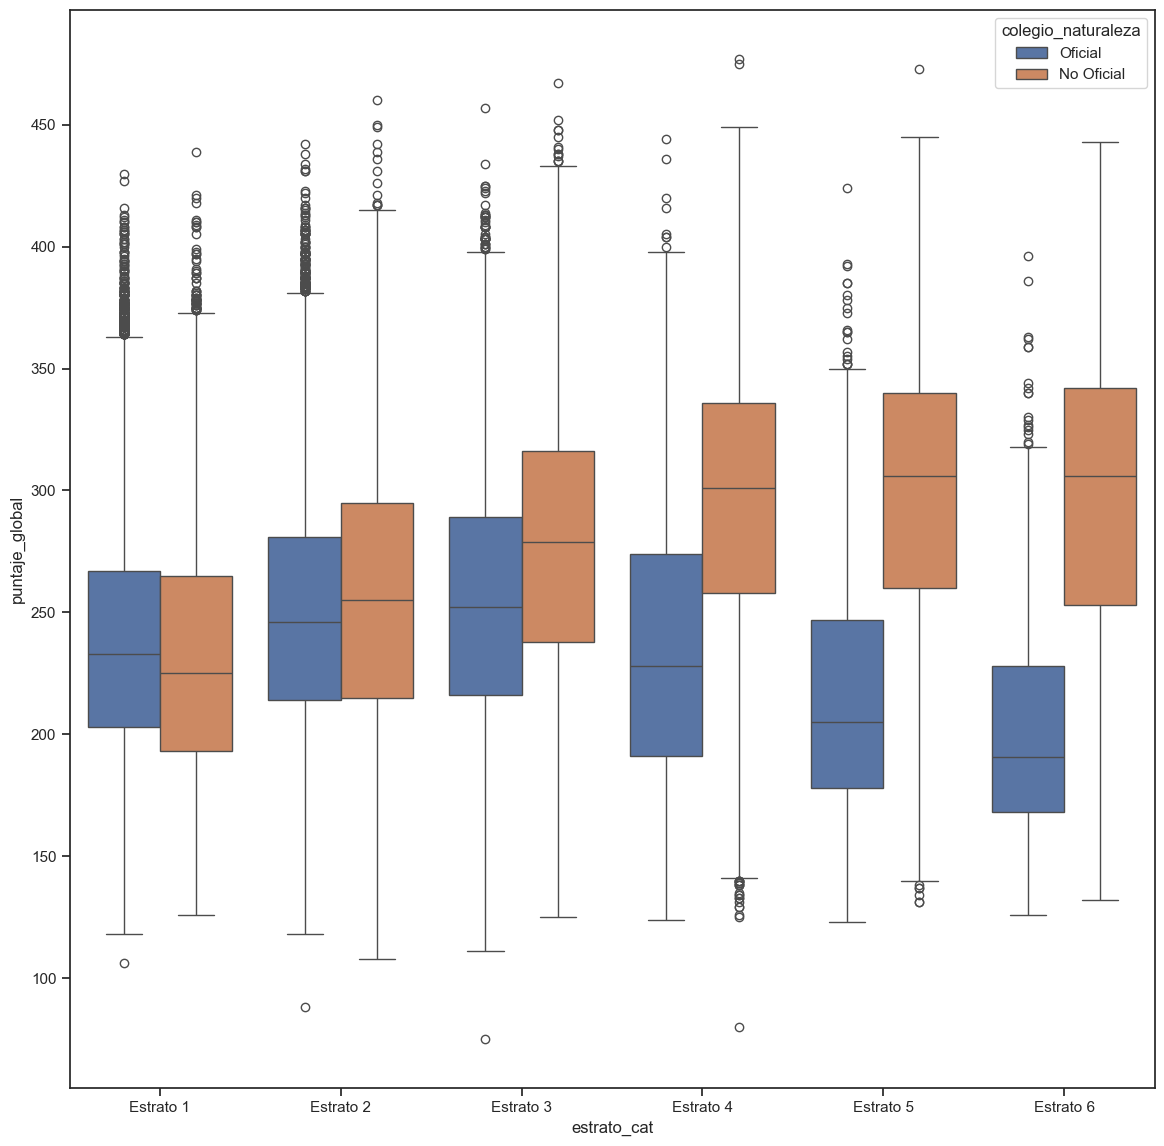

In [111]:
plt.figure(figsize = (14,14))
sns.boxplot(data=icfes, x='estrato_cat', y='puntaje_global', hue='colegio_naturaleza')

<Axes: xlabel='estrato_cat', ylabel='puntaje_global'>

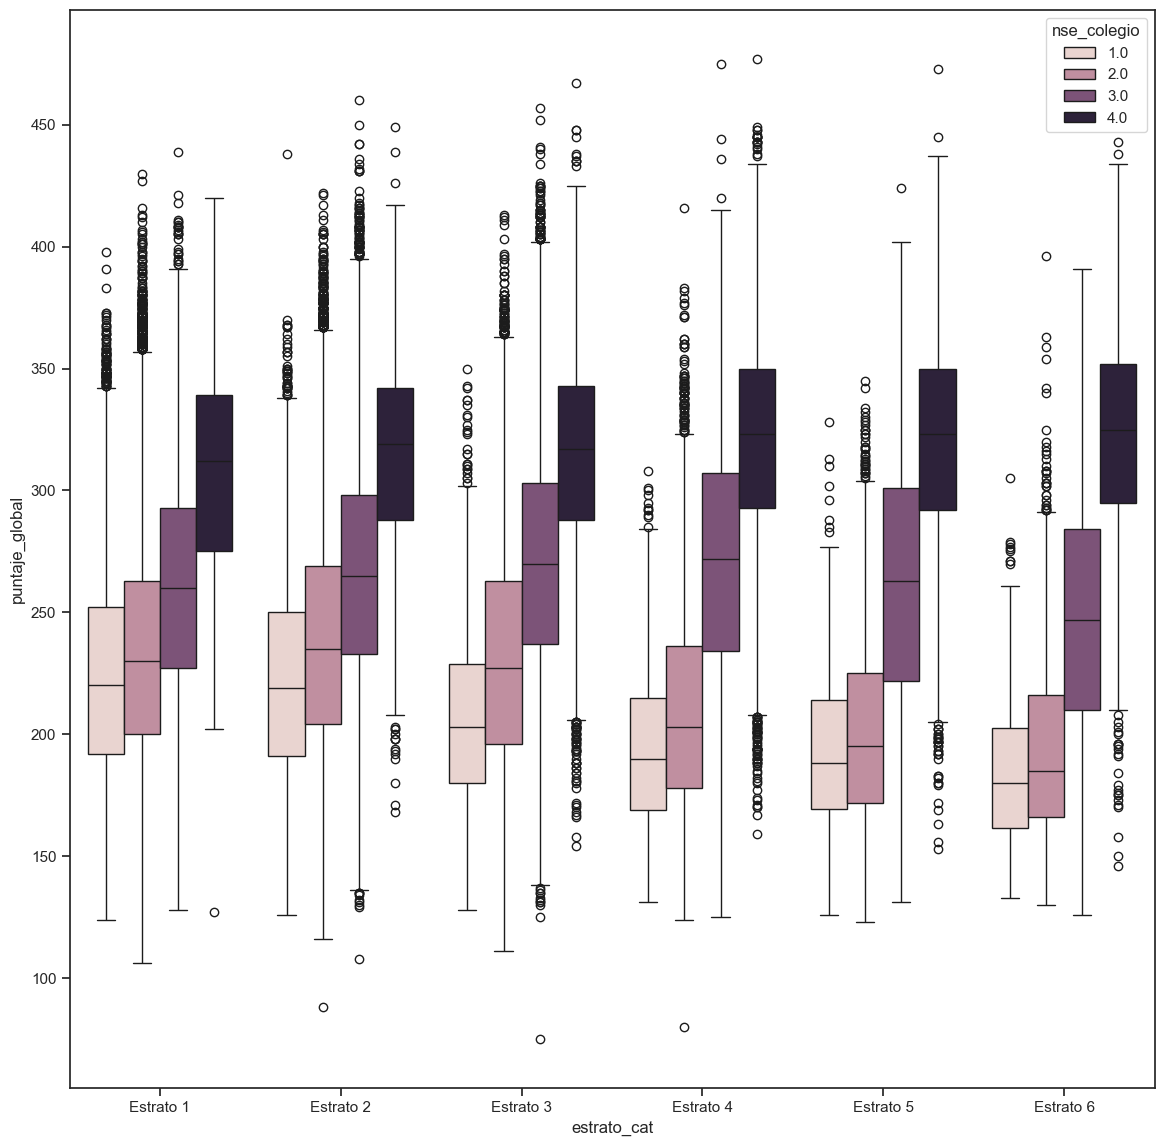

In [112]:
plt.figure(figsize = (14,14))
sns.boxplot(data=icfes, x='estrato_cat', y='puntaje_global', hue='nse_colegio')

In [113]:
pd.crosstab(icfes['nse_colegio'], icfes['colegio_naturaleza'], normalize='index', margins=True).style.format("{:.2f}")

colegio_naturaleza,No Oficial,Oficial
nse_colegio,,
1.000000,0.03,0.97
2.000000,0.10,0.90
3.000000,0.37,0.63
4.000000,1.00,0.00
All,0.24,0.76


In [114]:
estrato_casa_nse_colegio = icfes.groupby(["estrato_casa", "nse_colegio"]).size().unstack()

print(estrato_casa_nse_colegio)

nse_colegio    1.00    2.00   3.00  4.00
estrato_casa                            
Estrato 1     19499  114455  22730   212
Estrato 2      7305   96892  78602  1787
Estrato 3      2214   29913  64642  9599
Estrato 4       818    5934  10052  8440
Estrato 5       390    2207   1967  3259
Estrato 6       299    1378    653  1289


In [115]:
# Analizar la distribución rural/urbana por estrato
pd.crosstab(icfes['estrato_casa'], icfes['colegio_area'], normalize='index', margins=True).style.format("{:.2f}")

colegio_area,Rural,Urbano
estrato_casa,,
Estrato 1,0.23,0.77
Estrato 2,0.12,0.88
Estrato 3,0.08,0.92
Estrato 4,0.12,0.88
Estrato 5,0.17,0.83
Estrato 6,0.21,0.79
All,0.15,0.85


In [116]:
pd.crosstab(icfes['nse_colegio'], icfes['colegio_area'], normalize='index', margins=True).style.format("{:.2f}")

colegio_area,Rural,Urbano
nse_colegio,,
1.000000,0.78,0.22
2.000000,0.17,0.83
3.000000,0.02,0.98
4.000000,0.10,0.90
All,0.16,0.84


In [117]:
icfes = icfes.astype({
    'nse_estudiante': 'category',
    'nse_colegio': 'category'
})

In [118]:
# Definir los bins manualmente con un cierre cerrado en 100
bins = [0, 100, 200, 300, 400, 500]

# Crear etiquetas para los rangos
labels = ["0-100", "101-200", "201-300", "301-400", "401-500"]

# Crear la nueva variable rango_puntaje
icfes['rango_puntaje'] = pd.cut(icfes['puntaje_global'], bins=bins, labels=labels, right=True, include_lowest=True)

In [119]:
puntajes_estrato = icfes.groupby(["estrato_casa", "rango_puntaje"]).size().unstack()

# Eliminar la fila correspondiente a "Ns/Nr"
puntajes_estrato = puntajes_estrato.dropna()

# Imprimir la tabla resultante
print(puntajes_estrato)

rango_puntaje  0-100  101-200  201-300  301-400  401-500
estrato_casa                                            
Estrato 1          0    38028   104391    14442       35
Estrato 2          1    30498   124984    29009       94
Estrato 3          1    14329    65713    26166      159
Estrato 4          1     4343    11928     8811      161
Estrato 5          0     1813     3243     2716       51
Estrato 6          0     1251     1328     1013       27


In [120]:
# Calcula la suma de cada fila (estrato-rango puntaje)
suma_puntajes_estrato = puntajes_estrato.sum(axis=1)

# Divide cada valor por la suma de su fila correspondiente
puntajes_normalizados = puntajes_estrato.div(suma_puntajes_estrato, axis=0)

# Multiplicamos por 100 para obtener porcentajes entre 0 y 100
puntajes_normalizados_porcentaje = puntajes_normalizados * 100

print(puntajes_normalizados_porcentaje)

rango_puntaje  0-100  101-200  201-300  301-400  401-500
estrato_casa                                            
Estrato 1       0.00    24.24    66.54     9.20     0.02
Estrato 2       0.00    16.52    67.71    15.72     0.05
Estrato 3       0.00    13.47    61.78    24.60     0.15
Estrato 4       0.00    17.20    47.25    34.90     0.64
Estrato 5       0.00    23.18    41.45    34.72     0.65
Estrato 6       0.00    34.57    36.70    27.99     0.75


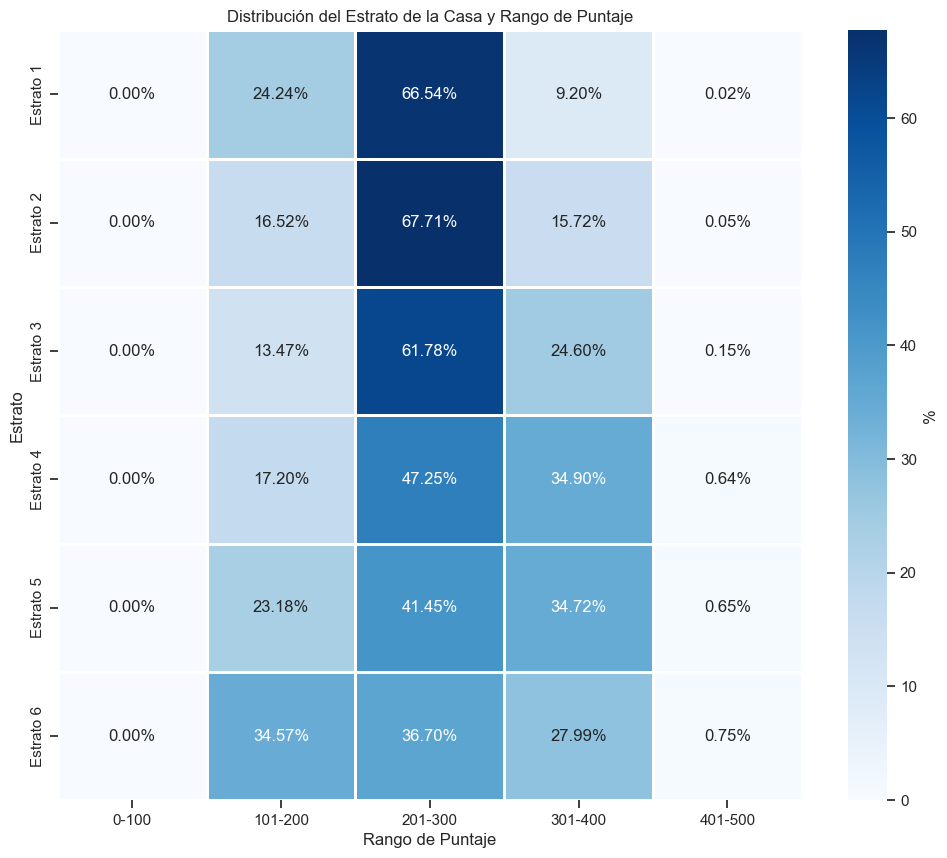

In [121]:
# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea el heatmap con Seaborn
heatmap = sns.heatmap(puntajes_normalizados_porcentaje, cmap='Blues', annot=True, 
                      fmt=".2f", linewidths=.9, cbar_kws={'label': '%'})

# Añade el símbolo '%' al lado de los valores en el heatmap
for text in heatmap.texts:
    text.set_text(text.get_text() + '%')

# Añade un título al gráfico
plt.title('Distribución del Estrato de la Casa y Rango de Puntaje')

# Añade etiquetas a los ejes x e y
plt.xlabel('Rango de Puntaje')
plt.ylabel('Estrato')

# Muestra el heatmap
plt.show()

##### CONCLUSIONES

- El análisis exploratorio reveló patrones complejos y no lineales en las variables socioeconómicas que afectan el rendimiento en las pruebas ICFES.

- Efecto del estrato socioeconómico: Se identificó una relación no lineal entre el estrato de la vivienda y el puntaje global del ICFES. Contrario a una progresión lineal esperada, el estrato 4 mostró el mejor rendimiento mediano, mientras que los estratos 5 y 6 presentaron desempeños inferiores con mayor variabilidad. Este hallazgo sugiere la existencia de un "efecto plateau" donde factores adicionales al nivel socioeconómico influyen en el rendimiento académico a partir de cierto umbral.

- Efecto del tipo de colegio: Los colegios no oficiales (privados) demostraron consistentemente mejor rendimiento que los oficiales (públicos). Sin embargo, esta diferencia varía significativamente según el estrato socioeconómico del estudiante, evidenciando una interacción importante entre ambas variables.

- Nivel socioeconómico del colegio (NSE): Se observó una relación positiva y casi lineal entre el NSE del colegio y el puntaje ICFES across todos los estratos. Los estudiantes de estratos bajos mostraron los mayores beneficios relativos al asistir a colegios con NSE alto, aunque el efecto fue positivo en todos los segmentos socioeconómicos.

- Factores geográficos: Un hallazgo notable fue la identificación de estudiantes de estratos altos (5-6) en colegios de NSE bajo (1-2), explicado principalmente por su ubicación en zonas rurales donde la oferta educativa está limitada geográficamente, independientemente de la capacidad económica familiar.

- Recomendaciones para el modelo: Basado en estos hallazgos, se propone la creación de variables de interacción que capturen las relaciones complejas entre: (1) estrato socioeconómico recodificado, (2) naturaleza del colegio, (3) NSE del colegio, y (4) zona geográfica, para maximizar el poder predictivo del modelo Random Forest.

#### 2.2.2 EDUCACIÓN EN EL HOGAR

In [122]:
icfes.head(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje
0,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,5.00,Estrato 3,Moderado,1,1,0,1,1,0,0,0,Peor,>100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,47,33,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00,Estrato 3,201-300
1,Colombia,Masculino,Andina,No,16,15-19,0,Más de 1 hogar,3.00,Estrato 3,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,30-60 min,Óptimo,Aceptable,Insuficiente,Tecnico/Tecnologo,Microempresario,Tecnico/Tecnologo,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,60,76,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00,Estrato 3,201-300
2,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar grande,2.00,Estrato 1,Mucho,0,1,0,1,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,66,91,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00,Estrato 1,201-300
3,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,Estrato 3,Moderado,0,0,1,0,0,0,0,0,Igual,11-25,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller,No Aplica,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,62,81,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00,Estrato 3,301-400
4,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,4.00,Estrato 3,Mucho,1,1,1,1,1,0,0,0,Mejor,26-100,No lee,Óptimo,Muy Insuficiente,Óptimo,Bachiller,Sin Actividad Remunerada,Bachiller Inc,Sin Actividad Remunerada,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,63,85,57,70,3,55,74,2,57,79,3,52.00,63,A1,288,78.00,52.91,3.00,3.00,Estrato 3,201-300


In [123]:
## Educación Conjunta en el Hogar
# Crear la lista de condiciones
condiciones = [
    # Sin información
    (icfes['nivel_edu_madre'].isna()) & (icfes['nivel_edu_padre'].isna()),
    
    # No aplica
    (icfes['nivel_edu_madre'] == 'No aplica') | (icfes['nivel_edu_padre'] == 'No aplica'),
    
    # Educación Superior
    (icfes['nivel_edu_madre'].isin(['Profesional', 'Postgrado'])) | 
    (icfes['nivel_edu_padre'].isin(['Profesional', 'Postgrado'])),
    
    # Educación Técnica
    (icfes['nivel_edu_madre'] == 'Tecnico/Tecnologo') | 
    (icfes['nivel_edu_padre'] == 'Tecnico/Tecnologo'),
    
    # Bachillerato Completo
    (icfes['nivel_edu_madre'] == 'Bachiller') & 
    (icfes['nivel_edu_padre'] == 'Bachiller'),
    
    # Al Menos Un Bachiller
    (icfes['nivel_edu_madre'] == 'Bachiller') | 
    (icfes['nivel_edu_padre'] == 'Bachiller'),
    
    # Educación Primaria
    (icfes['nivel_edu_madre'] == 'Primaria') | 
    (icfes['nivel_edu_padre'] == 'Primaria'),
    
    # Educación Primaria Incompleta
    (icfes['nivel_edu_madre'] == 'Primaria Inc') |
    (icfes['nivel_edu_padre'] == 'Primaria Inc'),
    
    # Educación Secundaria Incompleta
    (icfes['nivel_edu_madre'] == 'Bachiller Inc') |
    (icfes['nivel_edu_padre'] == 'Bachiller Inc'),
    
    # Educación Superior Incompleta
    (icfes['nivel_edu_madre'].isin(['Tecnico/Tecnologo Inc', 'Profesional Inc'])) |
    (icfes['nivel_edu_padre'].isin(['Tecnico/Tecnologo Inc', 'Profesional Inc'])),
    
    # Sin Educación Formal
    (icfes['nivel_edu_madre'] == 'Ninguna') | 
    (icfes['nivel_edu_padre'] == 'Ninguna')
]

# Crear la lista de valores correspondientes
valores = [
    'Sin Información',
    'No Aplica',
    'Educación Superior',
    'Educación Técnica',
    'Bachillerato Completo',
    'Al Menos Un Bachiller',
    'Educación Primaria',
    'Educación Primaria Incompleta',
    'Educación Secundaria Incompleta',
    'Educación Superior Incompleta',
    'Sin Educación Formal'
]

# Crear la nueva variable usando np.select
icfes['educacion_padres'] = np.select(condiciones, valores, default='Otros Casos')

# Ver la distribución y estadísticas
print("\nDistribución de categorías:")
print(icfes['educacion_padres'].value_counts())


Distribución de categorías:
educacion_padres
Al Menos Un Bachiller              96998
Educación Superior                 87044
Educación Primaria Incompleta      81326
Educación Primaria                 62685
Educación Técnica                  59704
Bachillerato Completo              55136
Educación Secundaria Incompleta    36195
Educación Superior Incompleta       7467
No Aplica                           7409
Sin Educación Formal                6447
Sin Información                     5139
Otros Casos                          622
Name: count, dtype: int64


In [124]:
print(icfes.groupby('educacion_padres')['puntaje_global'].agg(['count', 'mean', 'std']).round(2))

                                 count   mean   std
educacion_padres                                   
Al Menos Un Bachiller            96998 243.96 46.52
Bachillerato Completo            55136 246.97 47.68
Educación Primaria               62685 230.53 44.64
Educación Primaria Incompleta    81326 226.29 43.01
Educación Secundaria Incompleta  36195 236.21 45.96
Educación Superior               87044 278.88 54.27
Educación Superior Incompleta     7467 263.64 51.72
Educación Técnica                59704 264.68 47.01
No Aplica                         7409 251.82 51.89
Otros Casos                        622 210.33 49.55
Sin Educación Formal              6447 203.75 40.00
Sin Información                   5139 246.53 56.59


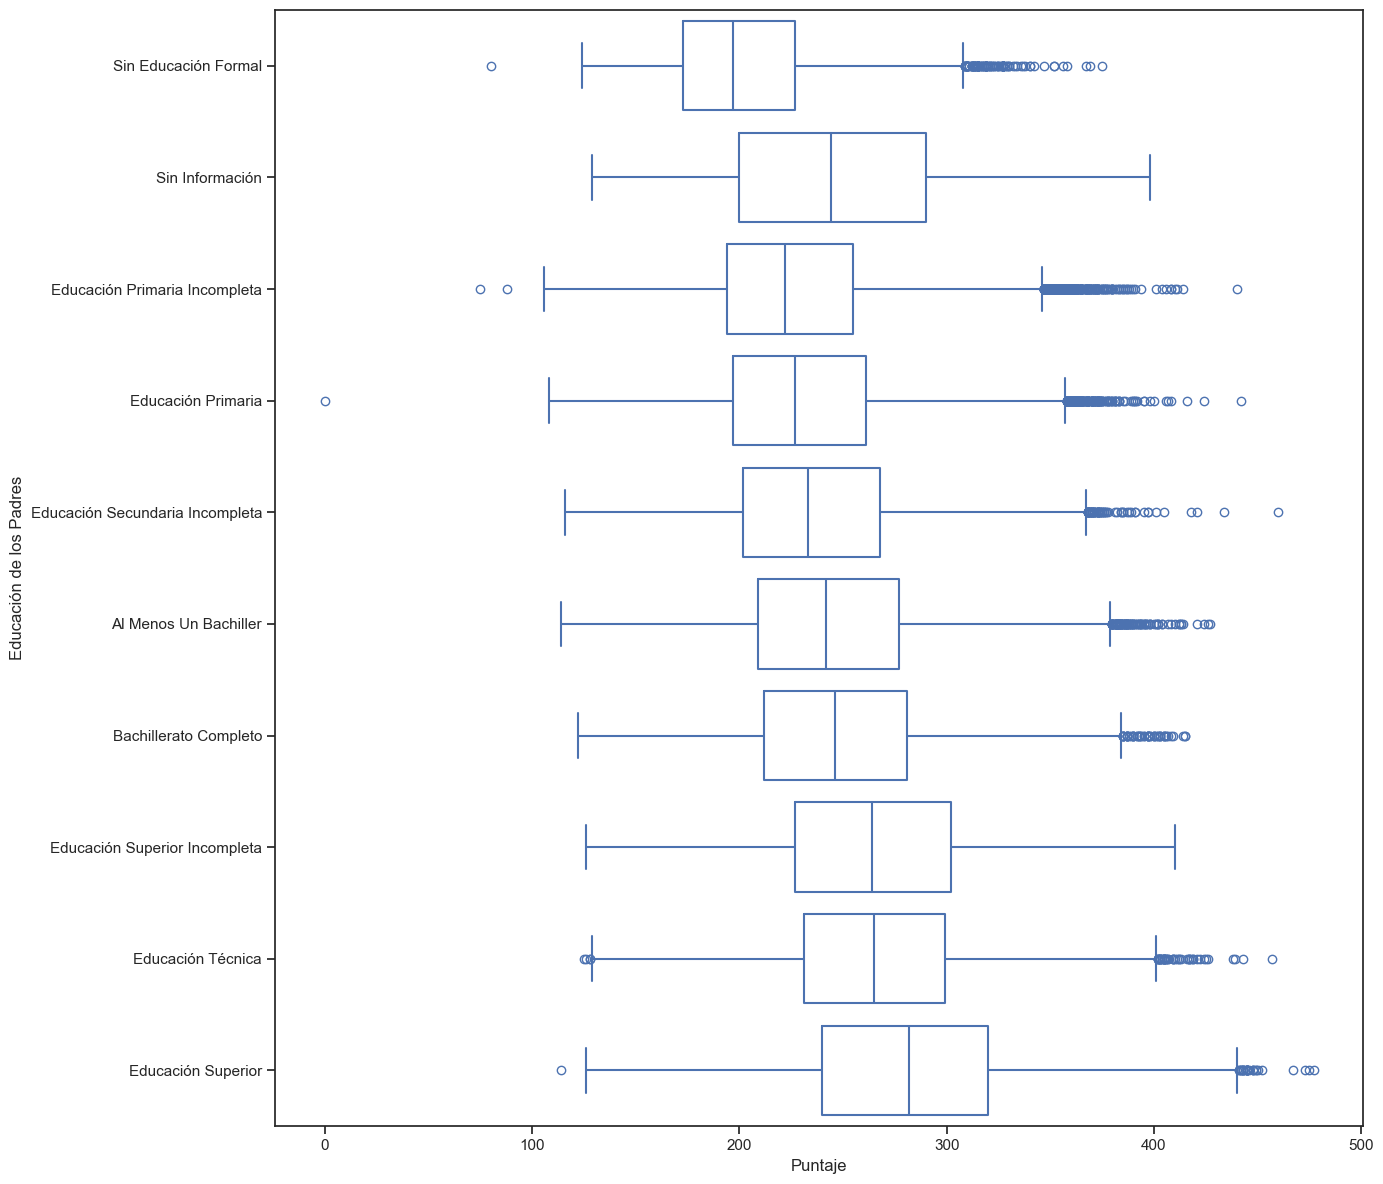

In [125]:
orden_educativo = ['Sin Educación Formal', 'Sin Información', 'Educación Primaria Incompleta', 'Educación Primaria', 
                  'Educación Secundaria Incompleta', 'Al Menos Un Bachiller', 'Bachillerato Completo', 
                  'Educación Superior Incompleta', 'Educación Técnica', 'Educación Superior']

plt.figure(figsize=(14, 12))  # Ajustado el tamaño para mejor visualización horizontal
sns.set_theme(style="ticks")  # Aplicar un tema
sns.color_palette("husl", 9)

# Cambiar x por y para hacer el gráfico horizontal
sns.boxplot(y = 'educacion_padres', x = 'puntaje_global', data = icfes, order = orden_educativo, fill = False)

plt.ylabel('Educación de los Padres')  # Ahora es ylabel en lugar de xlabel
plt.xlabel('Puntaje')  # Ahora es xlabel en lugar de ylabel

# Ajustar el layout para asegurar que todas las etiquetas sean visibles
plt.tight_layout()

plt.show()

In [126]:
icfes.shape

(506172, 61)

In [127]:
icfes.sample(7)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres
411987,Colombia,Femenino,Orinoquía,No,18,15-19,0,Hogar tradicional,2.00,Estrato 1,Moderado,1,1,1,1,0,0,1,0,Igual,0-10,No lee,Insuficiente,Óptimo,Insuficiente,No aplica,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Villavicencio,Meta,49,38,50,49,2,34,9,1,39,33,1,48.00,50,A1,217,31.00,50.30,2.00,3.00,Estrato 1,201-300,No Aplica
364628,Colombia,Femenino,Caribe,No,17,15-19,0,Hogar grande,2.00,Estrato 2,Mucho,1,1,0,0,0,0,0,0,Igual,26-100,>2h,Aceptable,Óptimo,Aceptable,Primaria Inc,Sin Actividad Remunerada,Bachiller,Microempresario,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Simití,Bolivar,56,62,55,64,3,54,69,2,56,77,3,44.00,39,A-,272,69.00,48.41,2.00,2.00,Estrato 2,201-300,Al Menos Un Bachiller
148137,Colombia,Femenino,Caribe,No,21,20-24,1,Más de 1 hogar,3.00,Estrato 3,Moderado,0,1,0,1,0,0,1,0,Mejor,0-10,No lee,Insuficiente,Insuficiente,Insuficiente,Primaria,Sin Actividad Remunerada,Bachiller Inc,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Noche,Río Viejo,Bolivar,39,11,38,15,2,35,12,1,37,27,1,36.00,18,A-,186,13.00,42.69,2.00,2.00,Estrato 3,101-200,Educación Primaria
200756,Colombia,Femenino,Andina,No,16,15-19,0,Más de 1 hogar,5.00,Estrato 1,Moderado,1,1,1,1,1,1,1,1,Igual,>100,0-30 min,Insuficiente,Insuficiente,Insuficiente,Bachiller,Sin Actividad Remunerada,Bachiller,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Soacha,Cundinamarca,46,30,53,58,3,46,44,2,33,15,1,42.00,33,A-,222,34.00,57.00,3.00,2.00,Estrato 1,201-300,Bachillerato Completo
271838,Colombia,Masculino,Andina,No,17,15-19,0,Hogar grande,4.00,Estrato 6,Mucho,1,1,1,1,1,1,0,1,Peor,26-100,No lee,Óptimo,Óptimo,Óptimo,Postgrado,Profesionales,Postgrado,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,70,97,78,100,4,77,100,4,74,99,4,82.00,100,B+,377,100.00,82.39,4.00,4.00,Estrato 6,301-400,Educación Superior
138898,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,Estrato 1,Poco,0,0,0,0,0,0,0,0,Peor,0-10,30-60 min,Muy Insuficiente,Muy Insuficiente,Muy Insuficiente,Primaria Inc,Sin Actividad Remunerada,Primaria,Sector Primario,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Completa,Betulia,Santander,63,84,55,64,3,43,35,2,47,56,2,46.00,44,A-,258,60.00,28.20,1.00,2.00,Estrato 1,201-300,Educación Primaria
487301,Colombia,Femenino,Pacífica,No,16,15-19,0,Hogar tradicional,2.00,Estrato 2,Moderado,1,0,1,1,0,0,0,0,Igual,11-25,1-2h,Insuficiente,Aceptable,Aceptable,Bachiller,No Aplica,Profesional Inc,Sin Información,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Cali,Valle,43,20,42,24,2,46,45,2,42,41,2,53.00,66,A1,220,33.00,51.10,2.00,3.00,Estrato 2,201-300,Al Menos Un Bachiller


#### 2.2.3 HÁBITOS DEL ESTUDIANTE

In [128]:
icfes.sample(6)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres
50070,Colombia,Masculino,Andina,No,18,15-19,0,Hogar grande,2.00,Estrato 2,Moderado,1,1,0,0,0,0,0,0,Igual,0-10,No lee,Muy Insuficiente,Insuficiente,Insuficiente,Bachiller Inc,Trabajadores Operativos,Profesional Inc,Sin Información,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Noche,Bogotá D.C.,Bogotá,55,59,49,45,2,45,39,2,37,27,1,51.00,61,A1,234,43.00,44.33,2.00,2.00,Estrato 2,201-300,Educación Secundaria Incompleta
53850,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,2.00,Estrato 1,Promedio,0,1,0,0,0,1,0,0,Peor,0-10,0-30 min,Aceptable,Óptimo,Muy Insuficiente,Primaria Inc,Sin Actividad Remunerada,Bachiller Inc,Sin Actividad Remunerada,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Completa,Murindó,Antioquia,34,5,40,21,2,40,25,1,43,43,2,34.00,12,A-,194,17.00,42.73,2.00,2.00,Estrato 1,101-200,Educación Primaria Incompleta
169668,Colombia,Masculino,Andina,No,17,15-19,0,Hogar grande,3.00,Estrato 3,Mucho,1,1,1,1,1,1,1,1,Mejor,26-100,No lee,Óptimo,Óptimo,Insuficiente,Tecnico/Tecnologo,Directivos,Profesional,Directivos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,72,98,72,97,4,73,99,4,75,100,4,74.00,97,B1,365,99.00,68.80,4.00,3.00,Estrato 3,301-400,Educación Superior
139446,Colombia,Masculino,Andina,No,16,15-19,0,Hogar grande,4.00,Estrato 3,Moderado,1,1,0,0,1,0,1,0,Igual,11-25,30-60 min,Óptimo,Insuficiente,Aceptable,Postgrado,Profesionales,Postgrado,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Mañana,Medellín,Antioquia,50,42,48,42,2,53,68,2,56,78,3,52.00,61,A1,259,61.00,59.89,3.00,3.00,Estrato 3,201-300,Educación Superior
401411,Colombia,Femenino,Pacífica,No,18,15-19,0,Hogar grande,4.00,Estrato 2,Moderado,1,0,1,1,0,0,0,0,Igual,0-10,No lee,Insuficiente,Aceptable,Óptimo,Bachiller,Trabajadores Operativos,Primaria,Sin Información,Trabajo Ocasional,Sin Remuneración,Mixto,Oficial,A,S,Rural,Mañana,El Cerrito,Valle,53,51,39,18,2,41,29,2,46,54,2,45.00,42,A-,224,36.00,46.81,2.00,2.00,Estrato 2,201-300,Al Menos Un Bachiller
255995,Colombia,Masculino,Orinoquía,No,18,15-19,0,Hogar grande,3.00,Estrato 1,Promedio,1,1,0,0,0,0,0,0,Igual,0-10,0-30 min,Insuficiente,Insuficiente,Insuficiente,None,Sin Actividad Remunerada,Bachiller Inc,Sin Información,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Villavicencio,Meta,52,47,58,72,3,47,47,2,33,15,1,54.00,68,A1,240,48.00,42.65,2.00,3.00,Estrato 1,201-300,Educación Secundaria Incompleta


In [129]:
icfes.groupby(['num_libros', 'tiempo_lectura'])['puntaje_global'].agg(['count', 'mean', 'std']).round(0).sort_values(by = 'mean', ascending=True)

count   mean   std
num_libros tiempo_lectura                    
0-10       No lee          46443 228.00 44.00
           0-30 min        90199 229.00 44.00
           1-2h            15674 235.00 48.00
           30-60 min       46238 238.00 46.00
           >2h              4828 242.00 51.00
11-25      0-30 min        60203 245.00 48.00
           No lee          22613 245.00 49.00
           1-2h            16405 254.00 51.00
           30-60 min       46271 255.00 49.00
26-100     No lee          13701 260.00 51.00
>100       No lee           4273 260.00 57.00
11-25      >2h              5291 262.00 51.00
26-100     0-30 min        32037 265.00 50.00
>100       0-30 min         8754 270.00 57.00
26-100     30-60 min       36468 274.00 49.00
           1-2h            15475 276.00 50.00
           >2h              5916 281.00 49.00
>100       1-2h             6530 282.00 56.00
           >2h              3494 283.00 57.00
           30-60 min       10709 284.00 55.00

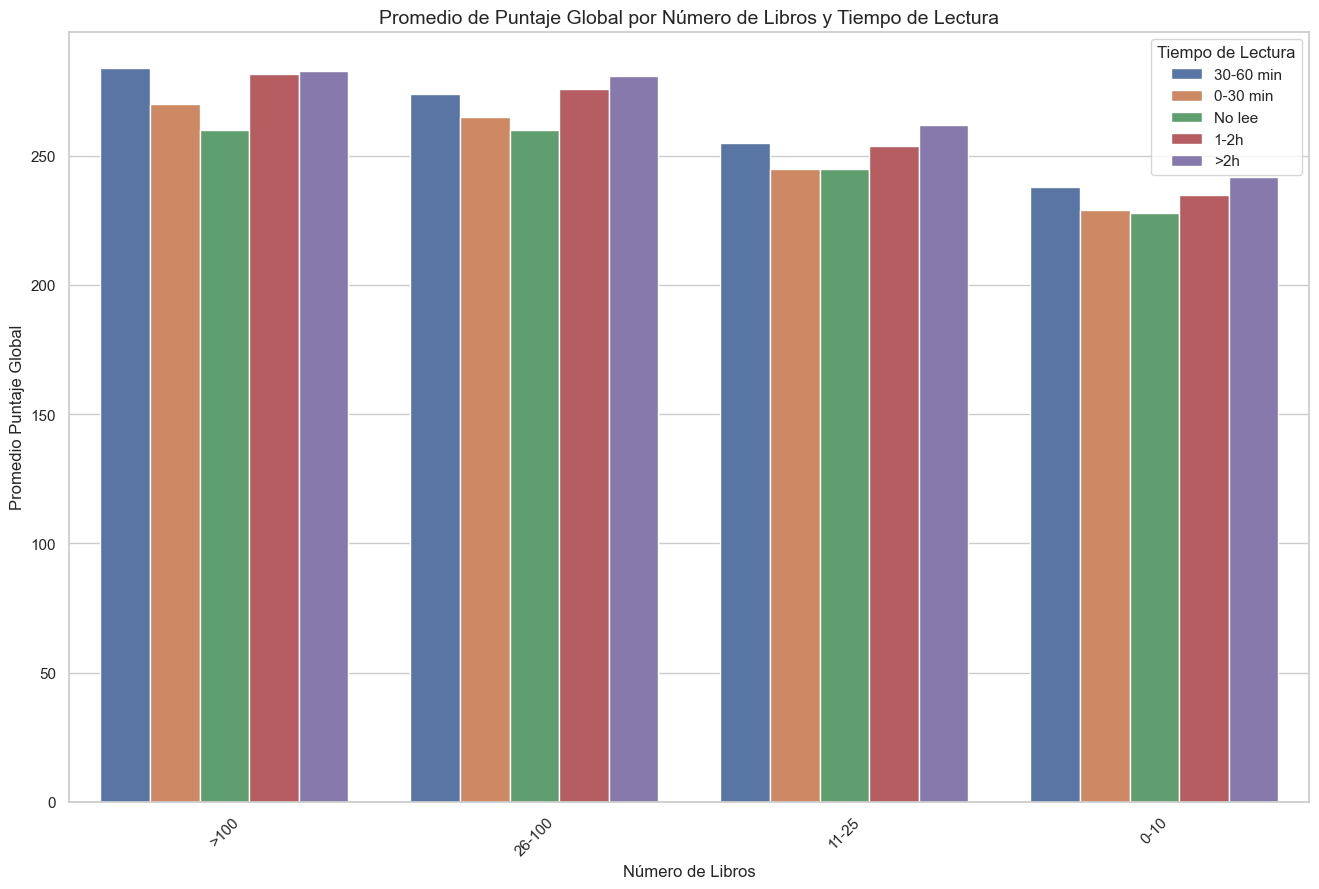

In [130]:
# Configurar el estilo
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras con dodge
plt.figure(figsize=(16, 10))
sns.barplot(
    data=icfes,
    x="num_libros",
    y="puntaje_global",
    hue="tiempo_lectura",
    estimator=lambda x: round(x.mean(), 0),  # Calcula la media redondeada
    dodge=True,  # Para que las barras estén una al lado de la otra
    errorbar=None  # Opcional, para quitar barras de error
)

# Personalizar etiquetas y título
plt.xlabel("Número de Libros", fontsize=12)
plt.ylabel("Promedio Puntaje Global", fontsize=12)
plt.title("Promedio de Puntaje Global por Número de Libros y Tiempo de Lectura", fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas si son largas
plt.legend(title="Tiempo de Lectura")

# Mostrar el gráfico
plt.show()

In [131]:
import pandas as pd
import scipy.stats as stats

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(icfes["num_libros"], icfes["tiempo_lectura"])

# Prueba de Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")

Chi-cuadrado: 25682.14130120308
p-valor: 0.0


In [132]:
import numpy as np

# Calcular el tamaño de la tabla
n = tabla_contingencia.sum().sum()
min_dim = min(tabla_contingencia.shape) - 1

# Calcular V de Cramer
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"V de Cramer: {cramer_v}")

V de Cramer: 0.13197251940169094


Tabla de contingencia entre Num_Libros y Tiempo_Lectura:
tiempo_lectura  0-30 min   1-2h  30-60 min    >2h  No lee   Total
num_libros                                                       
0-10               90199  15674      46238   4828   46443  203382
11-25              60203  16405      46271   5291   22613  150783
26-100             32037  15475      36468   5916   13701  103597
>100                8754   6530      10709   3494    4273   33760
Total             191193  54084     139686  19529   87030  491522

Resultados de la prueba Chi-cuadrado:
Estadístico Chi² = 25682.1413
Valor p = 0
Grados de libertad = 12

Con un nivel de significancia de 0.05, rechazamos la hipótesis nula.
Existe una asociación estadísticamente significativa entre el número de libros y el tiempo de lectura.

Medidas de asociación:
V de Cramer = 0.1320
La fuerza de la asociación es débil.


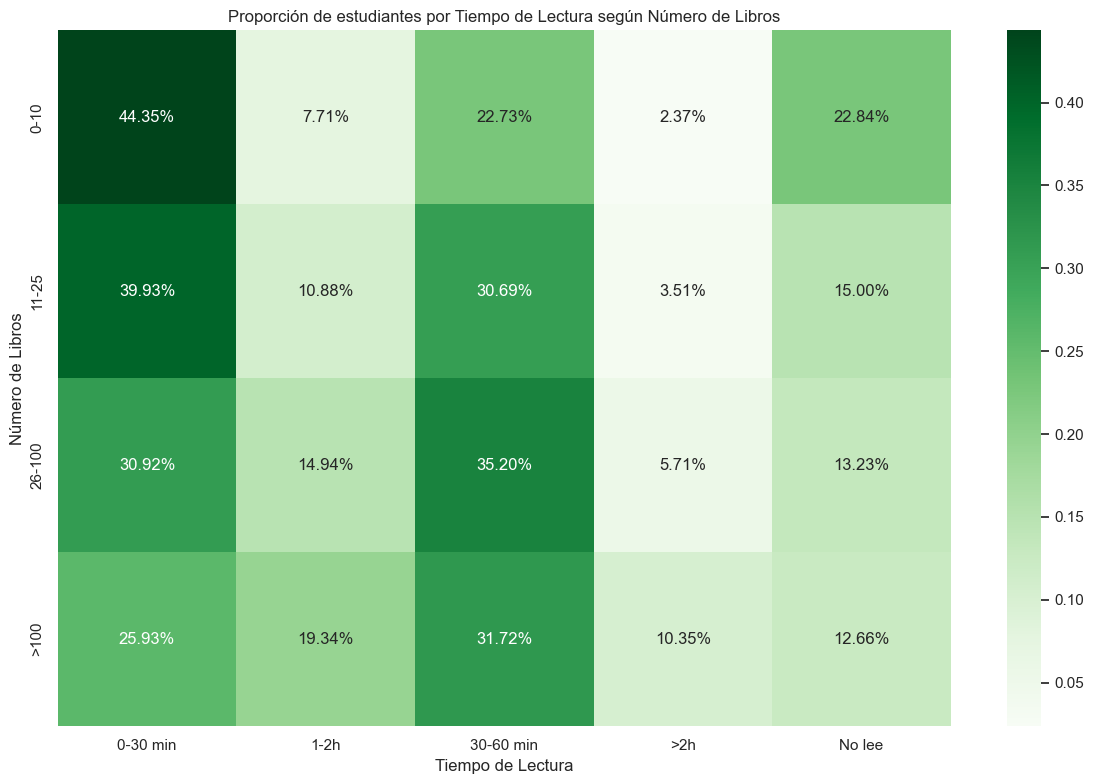

In [133]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Si ya tienes tu DataFrame cargado en tu sesión, puedes omitir la línea anterior

# 1. Crear tabla de contingencia entre num_libros y tiempo_lectura
tabla_contingencia = pd.crosstab(
    index=icfes['num_libros'], 
    columns=icfes['tiempo_lectura'],
    margins=True,  # Añade totales por fila/columna
    margins_name='Total'
)

# Mostrar la tabla de contingencia
print("Tabla de contingencia entre Num_Libros y Tiempo_Lectura:")
print(tabla_contingencia)

# 2. Realizar prueba Chi-cuadrado
# Eliminar la fila y columna de totales para el cálculo
tabla_sin_totales = tabla_contingencia.iloc[:-1, :-1]

chi2, p_valor, gl, valores_esperados = chi2_contingency(tabla_sin_totales)

# 3. Mostrar resultados
print("\nResultados de la prueba Chi-cuadrado:")
print(f"Estadístico Chi² = {chi2:.4f}")
print(f"Valor p = {p_valor:.4g}")
print(f"Grados de libertad = {gl}")

# Interpretación automática
alpha = 0.05
if p_valor < alpha:
    print(f"\nCon un nivel de significancia de {alpha}, rechazamos la hipótesis nula.")
    print("Existe una asociación estadísticamente significativa entre el número de libros y el tiempo de lectura.")
else:
    print(f"\nCon un nivel de significancia de {alpha}, no rechazamos la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar una asociación entre el número de libros y el tiempo de lectura.")

# 4. Calcular medidas de asociación
n = tabla_sin_totales.sum().sum()
r, c = tabla_sin_totales.shape
v_cramer = np.sqrt(chi2 / (n * min(r-1, c-1)))

print("\nMedidas de asociación:")
print(f"V de Cramer = {v_cramer:.4f}")

# Interpretación de la fuerza de asociación
if v_cramer < 0.10:
    interpretacion = "muy débil"
elif v_cramer < 0.20:
    interpretacion = "débil"
elif v_cramer < 0.40:
    interpretacion = "moderada"
elif v_cramer < 0.60:
    interpretacion = "relativamente fuerte"
elif v_cramer < 0.80:
    interpretacion = "fuerte"
else:
    interpretacion = "muy fuerte"

print(f"La fuerza de la asociación es {interpretacion}.")

# 5. Calcular proporciones por fila para entender mejor la relación
proporciones = tabla_sin_totales.div(tabla_sin_totales.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(proporciones, annot=True, fmt='.2%', cmap='Greens')
plt.title('Proporción de estudiantes por Tiempo de Lectura según Número de Libros')
plt.xlabel('Tiempo de Lectura')
plt.ylabel('Número de Libros')
plt.tight_layout()
plt.show()

In [134]:
# Primero clasificamos en niveles simples
def clasificar_libros(num_libros):
    if num_libros in ['0-10', '11-25']:
        return 'Bajo'
    else:
        return 'Alto'

def clasificar_lectura(tiempo_lectura):
    if tiempo_lectura in ['No lee', '0-30 min']:
        return 'Bajo'
    else:
        return 'Alto'

# Creamos las columnas auxiliares
icfes['nivel_libros'] = icfes['num_libros'].apply(clasificar_libros)
icfes['nivel_lectura'] = icfes['tiempo_lectura'].apply(clasificar_lectura)

# Definimos la matriz de perfiles
def asignar_perfil_lector(nivel_libros, nivel_lectura):
    if nivel_libros == 'Bajo' and nivel_lectura == 'Bajo':
        return 'Poco Apoyo, Poco Habito'
    elif nivel_libros == 'Bajo' and nivel_lectura == 'Alto':
        return 'Poco Apoyo, Buen Habito'
    elif nivel_libros == 'Alto' and nivel_lectura == 'Bajo':
        return 'Buen Apoyo, Poco Habito'
    elif nivel_libros == 'Alto' and nivel_lectura == 'Alto':
        return 'Buen Apoyo, Buen Habito'
    else:
        return 'Desconocido'

# Aplicamos la función
icfes['perfil_lector'] = icfes.apply(
    lambda x: asignar_perfil_lector(x['nivel_libros'], x['nivel_lectura']),
    axis=1
)
icfes['perfil_lector'].value_counts().sort_values(ascending=False)

perfil_lector
Poco Apoyo, Poco Habito    219458
Poco Apoyo, Buen Habito    135288
Buen Apoyo, Buen Habito     81451
Buen Apoyo, Poco Habito     69975
Name: count, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'Buen Apoyo, Buen Habito'),
  Text(1, 0, 'Poco Apoyo, Poco Habito'),
  Text(2, 0, 'Buen Apoyo, Poco Habito'),
  Text(3, 0, 'Poco Apoyo, Buen Habito')])

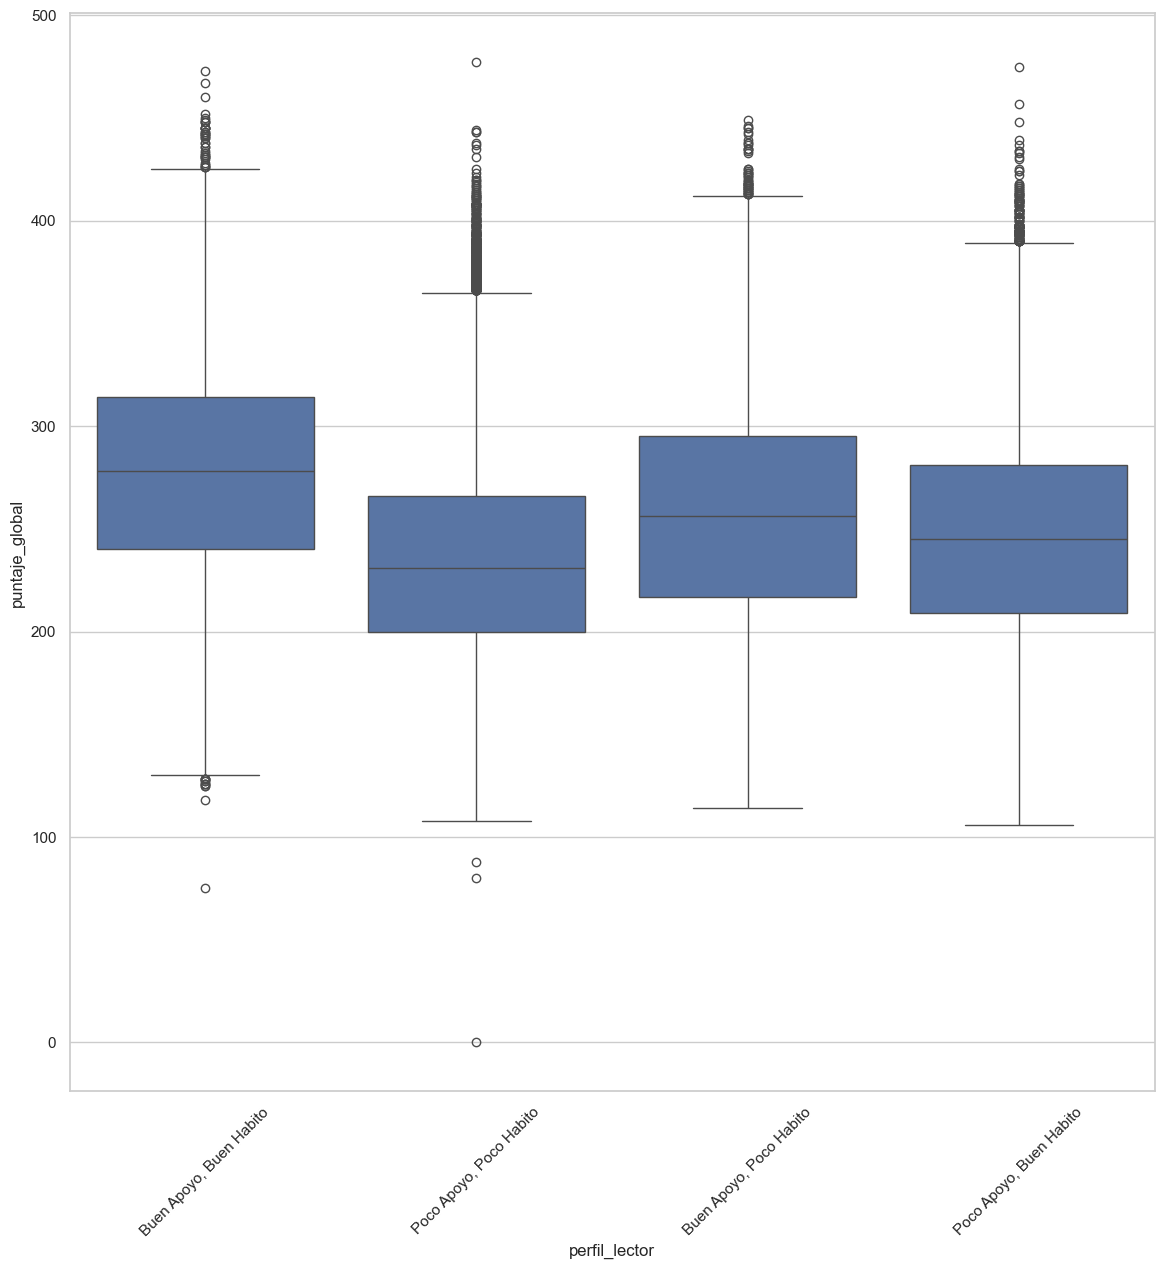

In [135]:
plt.figure(figsize = (14,14))
sns.boxplot(data=icfes, x='perfil_lector', y='puntaje_global')
plt.xticks(rotation=45)

In [136]:
icfes.head(4)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres,nivel_libros,nivel_lectura,perfil_lector
0,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,5.00,Estrato 3,Moderado,1,1,0,1,1,0,0,0,Peor,>100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,47,33,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00,Estrato 3,201-300,Educación Superior,Alto,Alto,"Buen Apoyo, Buen Habito"
1,Colombia,Masculino,Andina,No,16,15-19,0,Más de 1 hogar,3.00,Estrato 3,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,30-60 min,Óptimo,Aceptable,Insuficiente,Tecnico/Tecnologo,Microempresario,Tecnico/Tecnologo,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,60,76,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00,Estrato 3,201-300,Educación Técnica,Alto,Alto,"Buen Apoyo, Buen Habito"
2,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar grande,2.00,Estrato 1,Mucho,0,1,0,1,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,66,91,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00,Estrato 1,201-300,Bachillerato Completo,Alto,Alto,"Buen Apoyo, Buen Habito"
3,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,Estrato 3,Moderado,0,0,1,0,0,0,0,0,Igual,11-25,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller,No Aplica,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,62,81,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00,Estrato 3,301-400,Al Menos Un Bachiller,Bajo,Bajo,"Poco Apoyo, Poco Habito"


##### CONCLUSIONES

🧩 Hallazgos sobre número de libros, tiempo de lectura y puntaje ICFES

- **Número de libros en el hogar**  
  - A mayor número de libros disponibles, **mayor** tiende a ser el puntaje global del ICFES.  
  - Las diferencias entre grupos son estadísticamente significativas y con un tamaño de efecto **moderado**.

- **Tiempo de lectura del estudiante**  
  - También se relaciona positivamente con el puntaje global.  
  - El efecto es más **pequeño** que el número de libros, pero sigue siendo significativo.

- **Interacción entre ambos**  
  - Combinando número de libros y tiempo de lectura en una variable de cuatro categorías (“perfil lector”), se observa el mismo patrón: **más apoyo y más hábito** → mejor puntaje.  
  - La interacción entre estas dos variables existe, pero es muy pequeña: en la práctica, **aportan más tratadas por separado** que combinadas.

---

💡 Implicaciones para el modelo

- Mantener **`num_libros`** y **`tiempo_lectura`** como variables **independientes**, usando **One-Hot Encoding** para sus categorías originales.  
- Se puede usar **`perfil_lector`** solo como **variable interpretativa**, útil para mostrar al usuario una categoría fácil de entender (ej. “Buen Apoyo, Buen Hábito”).  
- No es necesario hacer bucketing (Bajo/Medio/Alto) a menos que quieras simplificar para visualizaciones o interpretabilidad.

---

🛠️ Próximos pasos en Feature Engineering

- Confirmar que no haya categorías con muy pocos registros (podrían generar ruido).  
- Revisar si conviene combinar categorías con baja frecuencia (ej. >100 libros podría fusionarse con 26–100 si son pocos casos).  
- Validar correlación con otras variables socioeconómicas para detectar multicolinealidad antes de entrenar el modelo.


#### 2.2.4 CARACTERÍSTICAS DE LOS COLEGIOS

In [137]:
icfes.sample(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres,nivel_libros,nivel_lectura,perfil_lector
158392,Colombia,Masculino,Caribe,No,16,15-19,0,Hogar tradicional,2.00,Estrato 2,Moderado,0,0,1,1,0,0,0,0,Mejor,0-10,1-2h,Insuficiente,Insuficiente,Aceptable,Profesional,Profesionales,Profesional,Profesionales,No Trabaja,No Aplica,Mixto,Oficial,A,S,Rural,Unica,Montería,Cordoba,72,98,46,35,2,58,80,3,63,91,3,72.00,96,B1,303,85.00,52.49,3.00,1.00,Estrato 2,301-400,Educación Superior,Bajo,Alto,"Poco Apoyo, Buen Habito"
70894,Colombia,Masculino,Andina,Pijao,17,15-19,0,Hogar tradicional,2.00,Estrato 2,Mucho,1,1,1,1,0,0,0,1,Mejor,11-25,1-2h,Aceptable,Óptimo,Aceptable,Profesional,Profesionales,Tecnico/Tecnologo,Profesionales,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Coyaima,Tolima,42,18,44,29,2,37,15,1,40,36,1,39.00,26,A-,203,22.00,62.47,3.00,2.00,Estrato 2,201-300,Educación Superior,Bajo,Alto,"Poco Apoyo, Buen Habito"
384293,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,3.00,Estrato 1,Mucho,1,0,1,1,0,0,1,0,Igual,11-25,No lee,Insuficiente,Óptimo,Aceptable,Primaria Inc,Trabajador Independiente,Bachiller,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Medellín,Antioquia,45,27,27,3,1,37,16,1,36,22,1,30.00,6,A-,179,9.00,49.16,2.00,2.00,Estrato 1,101-200,Al Menos Un Bachiller,Bajo,Bajo,"Poco Apoyo, Poco Habito"
340442,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,3.00,Estrato 2,Poco,0,1,1,1,1,1,1,0,Igual,11-25,0-30 min,Aceptable,Insuficiente,Aceptable,Bachiller,Sin Actividad Remunerada,Bachiller,Sector Primario,Trabajo Ocasional,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Valledupar,Cesar,40,14,46,35,2,35,11,1,36,23,1,51.00,60,A1,201,21.00,50.58,2.00,2.00,Estrato 2,201-300,Bachillerato Completo,Bajo,Bajo,"Poco Apoyo, Poco Habito"
424401,Colombia,Femenino,Andina,No,18,15-19,0,Hogar grande,3.00,Estrato 3,Promedio,1,1,1,1,0,0,1,0,Mejor,0-10,30-60 min,Insuficiente,Insuficiente,Aceptable,Primaria Inc,Trabajadores Operativos,Bachiller Inc,Microempresario,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Barrancabermeja,Santander,48,35,46,35,2,45,40,2,36,23,1,32.00,10,A-,214,29.00,46.42,2.00,3.00,Estrato 3,201-300,Educación Primaria Incompleta,Bajo,Alto,"Poco Apoyo, Buen Habito"


In [138]:
icfes['nse_colegio'].value_counts()

nse_colegio
2.00    265046
3.00    180850
1.00     35507
4.00     24769
Name: count, dtype: int64

In [139]:
def colegios_puntaje (df, hue):
    plt.figure(figsize = (14,16))
    sns.boxplot(data=df, x='nse_colegio', y='puntaje_global', hue=hue)
    plt.xlabel('Nivel Socioeconómico del Colegio')
    plt.ylabel('Puntaje Global')
    plt.title(f'Puntaje Global por NSE del Colegio y {hue.replace("_", " ").title()}')
    plt.legend(title=hue.replace("_", " ").title())
    plt.show()

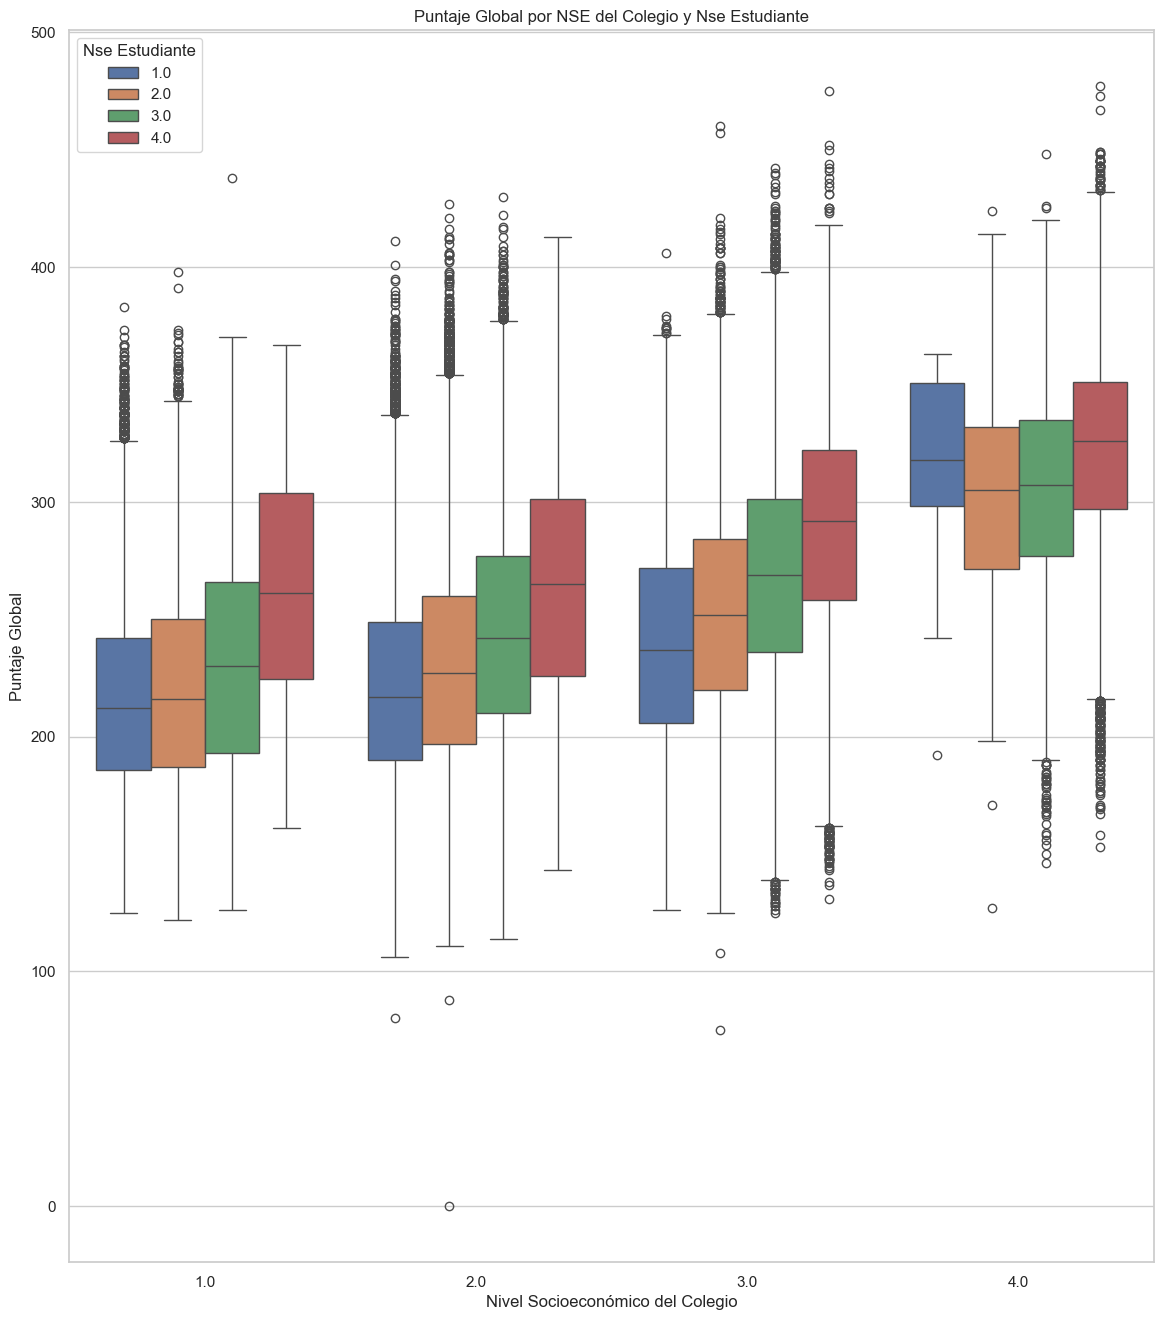

In [140]:
colegios_puntaje(icfes, hue='nse_estudiante')

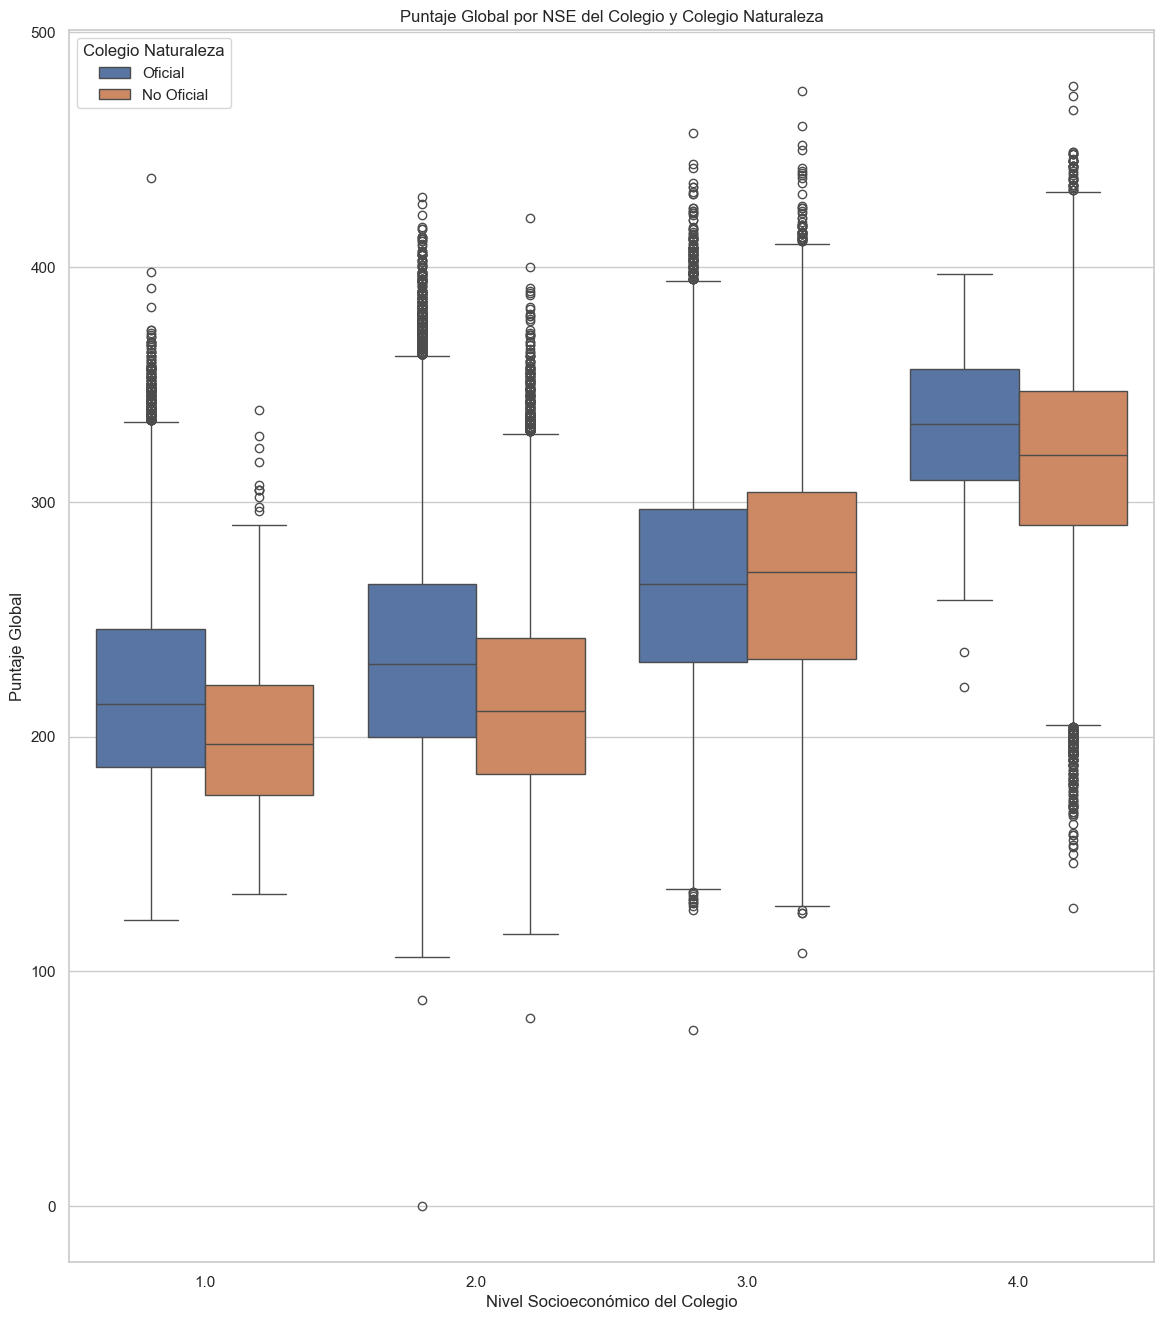

In [141]:
colegios_puntaje(icfes, 'colegio_naturaleza')

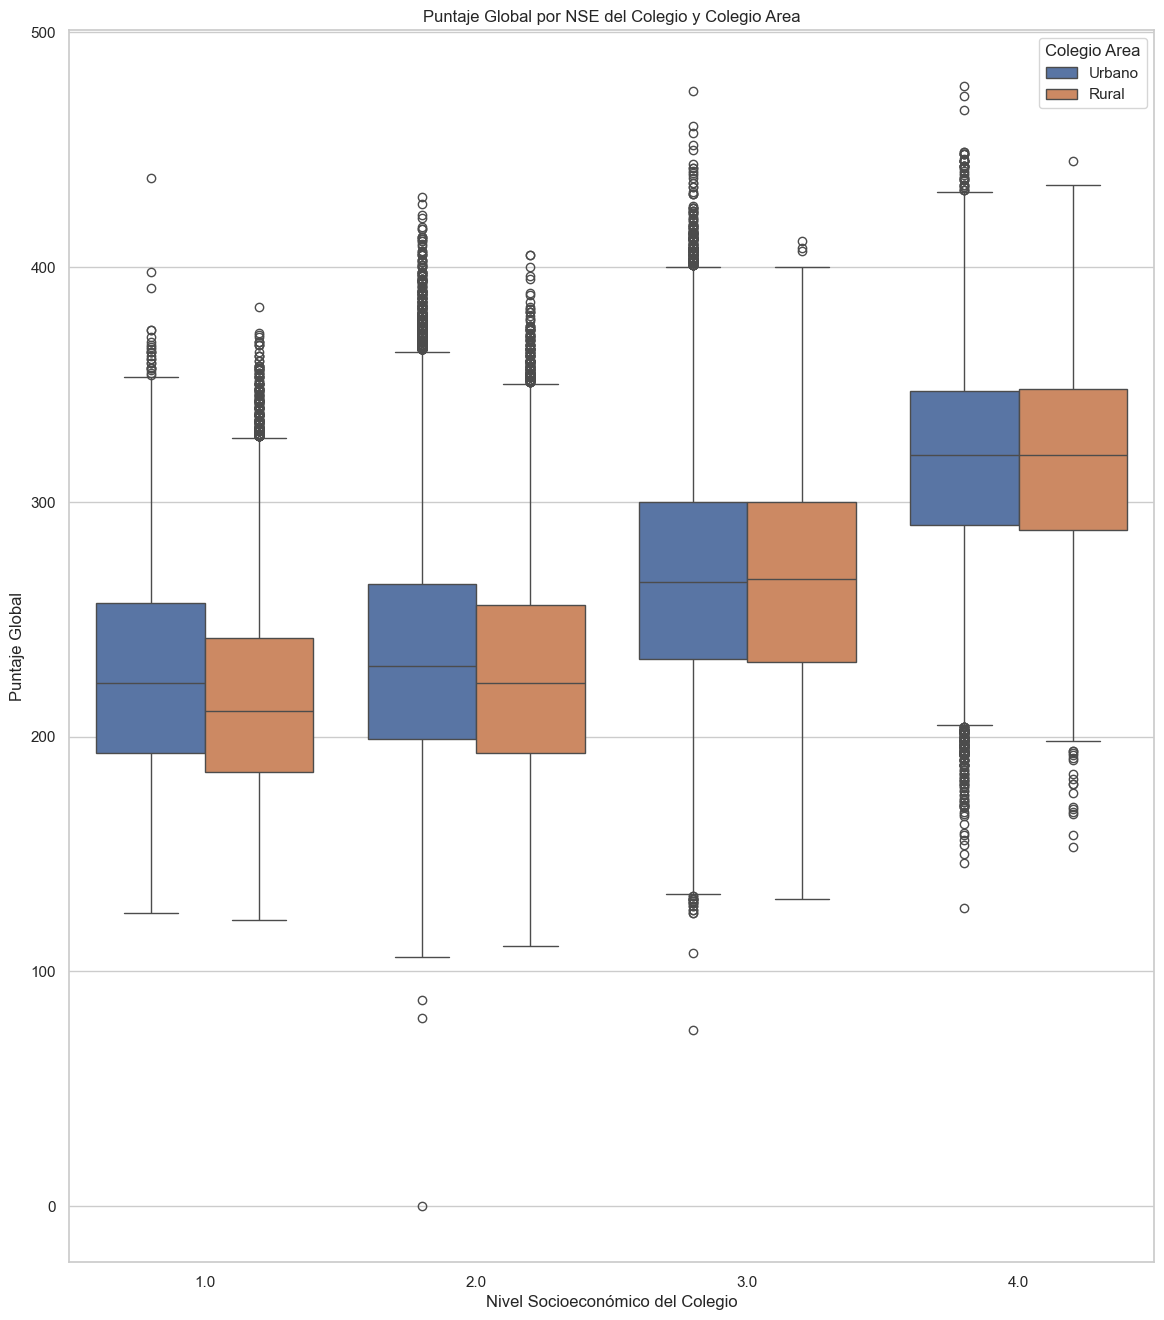

In [142]:
colegios_puntaje(icfes, 'colegio_area')

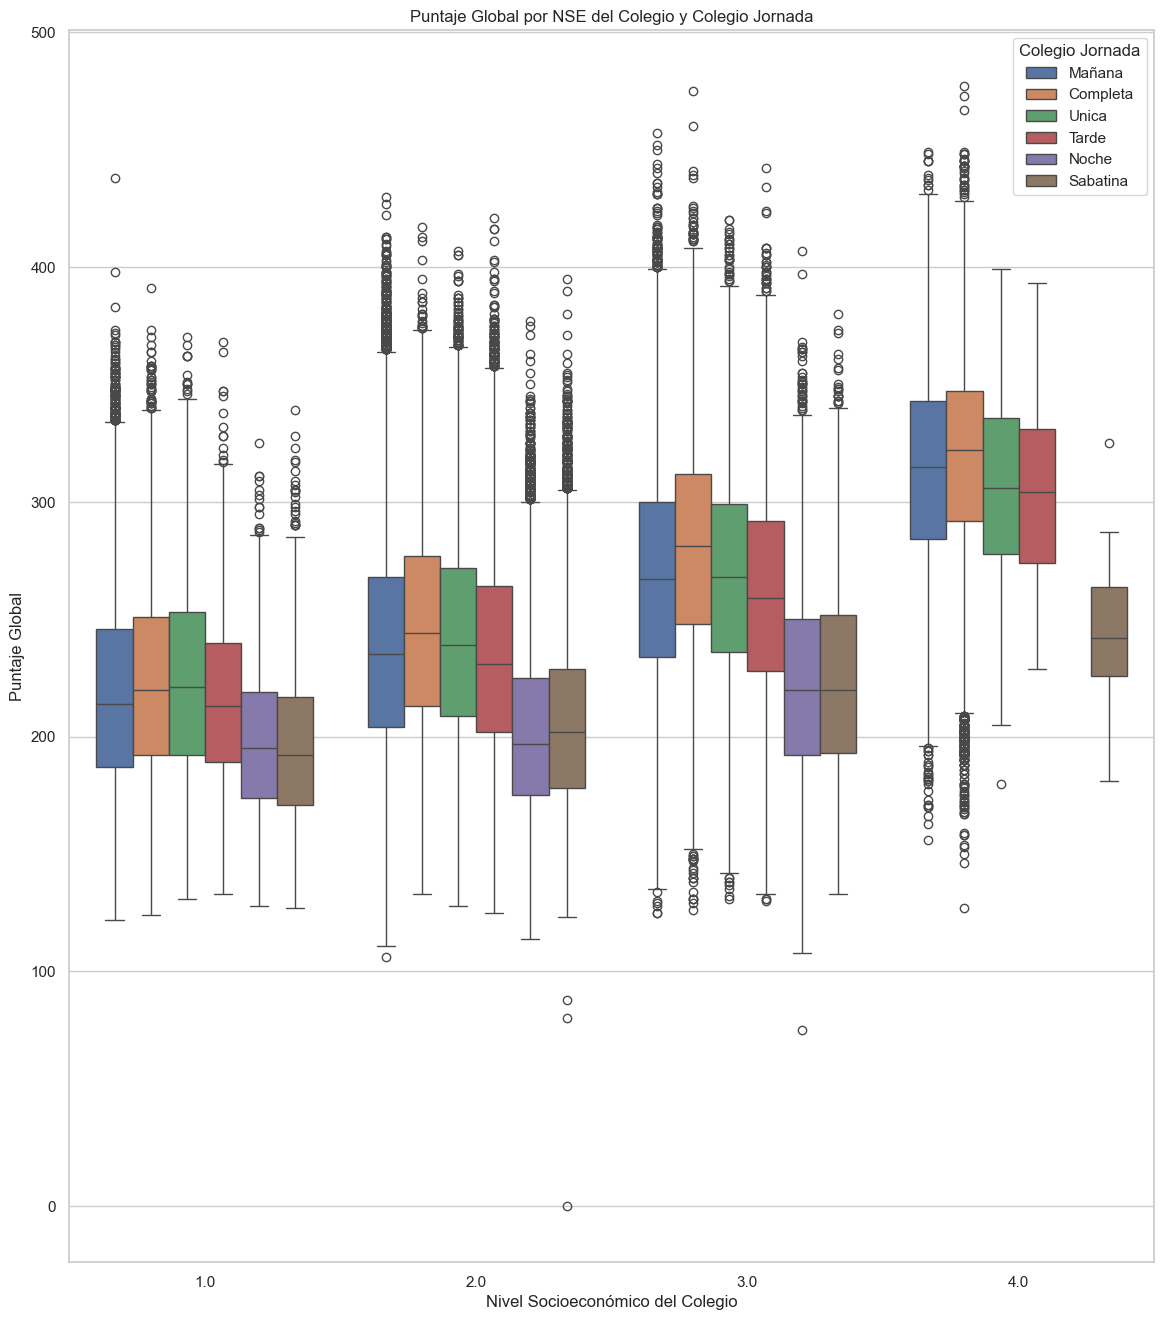

In [143]:
colegios_puntaje(icfes, 'colegio_jornada')

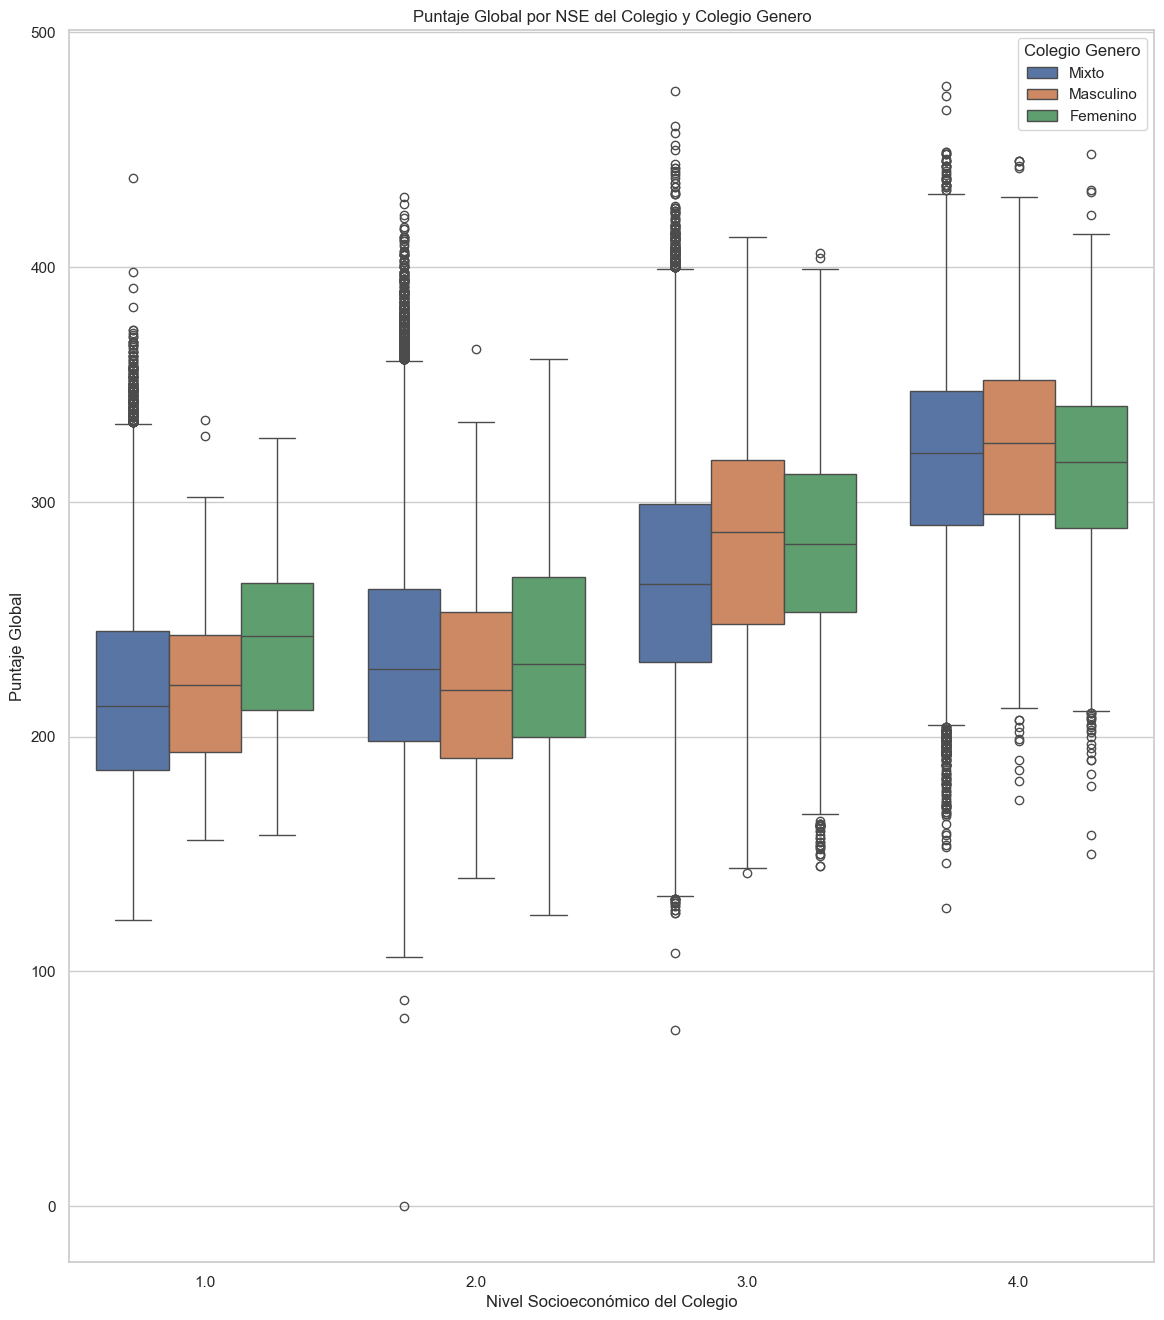

In [144]:
colegios_puntaje(icfes, hue='colegio_genero')

In [145]:
icfes['colegio_genero'].value_counts()

colegio_genero
Mixto        489635
Femenino      12800
Masculino      3737
Name: count, dtype: int64

In [146]:
import pandas as pd
import plotly.graph_objects as go

# Calcular la mediana por categoría
medianas = icfes.groupby("colegio_genero")["puntaje_global"].median()

# Obtener etiquetas y valores
categorias = medianas.index.tolist()
valores = medianas.values.tolist()

# Para cerrar el triángulo, repetimos el primer valor al final
categorias.append(categorias[0])
valores.append(valores[0])

# Crear el gráfico radar
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=valores,  # Valores de la mediana
    theta=categorias,  # Categorías en el radar
    fill='toself',
    name="Mediana Puntaje Global",
    line=dict(color="blue")
))

# Estilizar el gráfico
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True)
    ),
    showlegend=True,
    title="Mediana del Puntaje Global por Género del Colegio"
)

fig.show()

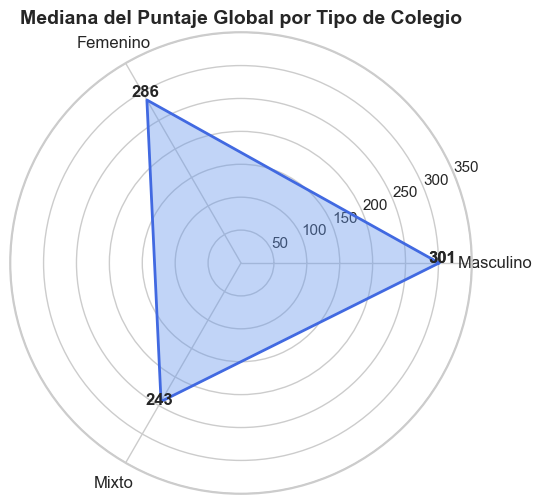

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular la mediana del Puntaje_Global por tipo de colegio
median_scores = icfes.groupby("colegio_genero")["puntaje_global"].median()

# Ordenar según las categorías de Colegio_Genero
categories = ["Masculino", "Femenino", "Mixto"]
values = [median_scores[cat] for cat in categories]

# Cerrar el gráfico (hacer el triángulo completo)
values += values[:1]

# Ángulos para cada categoría
angles = np.linspace(0, 2 * np.pi, len(categories) + 1, endpoint=True)

# Crear figura y ejes en coordenadas polares
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar el área del radar
ax.fill(angles, values, color='cornflowerblue', alpha=0.4)
ax.plot(angles, values, color='royalblue', linewidth=2)

# Colocar etiquetas de categorías en los vértices
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Agregar valores numéricos en los vértices
for angle, value, label in zip(angles, values, categories + [categories[0]]):
    ax.text(angle, value + 5, f"{int(value)}", ha='center', fontsize=12, fontweight='bold')

# Ajustar límites y título
ax.set_ylim(0, max(values) + 50)
ax.set_title("Mediana del Puntaje Global por Tipo de Colegio", fontsize=14, fontweight="bold")

# Mostrar
plt.show()

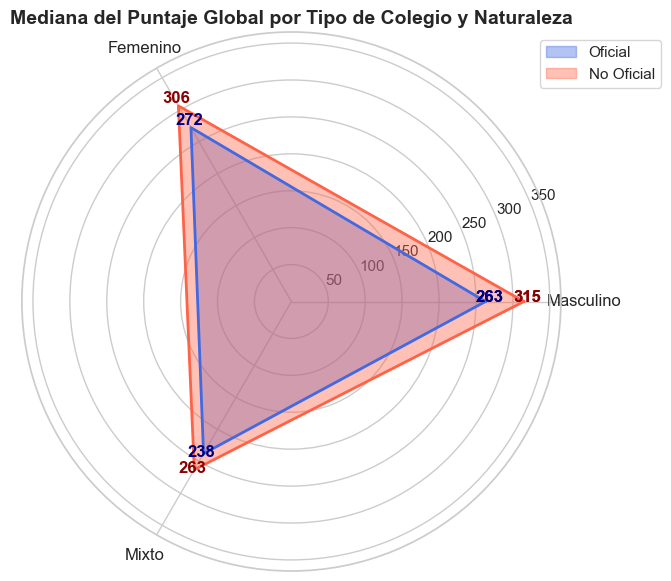

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar datos por colegio_naturaleza
median_scores_oficial = icfes[icfes["colegio_naturaleza"] == "Oficial"].groupby("colegio_genero")["puntaje_global"].median()
median_scores_no_oficial = icfes[icfes["colegio_naturaleza"] == "No Oficial"].groupby("colegio_genero")["puntaje_global"].median()

# Ordenar según las categorías de Colegio_Genero
categories = ["Masculino", "Femenino", "Mixto"]
values_oficial = [median_scores_oficial.get(cat, np.nan) for cat in categories]
values_no_oficial = [median_scores_no_oficial.get(cat, np.nan) for cat in categories]

# Cerrar el gráfico (hacer el triángulo completo)
values_oficial += values_oficial[:1]
values_no_oficial += values_no_oficial[:1]

# Ángulos para cada categoría
angles = np.linspace(0, 2 * np.pi, len(categories) + 1, endpoint=True)

# Crear figura y ejes en coordenadas polares
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Dibujar triángulo para colegios oficiales
ax.fill(angles, values_oficial, color='royalblue', alpha=0.4, label="Oficial")
ax.plot(angles, values_oficial, color='royalblue', linewidth=2)

# Dibujar triángulo para colegios no oficiales
ax.fill(angles, values_no_oficial, color='tomato', alpha=0.4, label="No Oficial")
ax.plot(angles, values_no_oficial, color='tomato', linewidth=2)

# Colocar etiquetas de categorías en los vértices
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Agregar valores numéricos en los vértices
for angle, val_of, val_no, label in zip(angles, values_oficial, values_no_oficial, categories + [categories[0]]):
    ax.text(angle, val_of + 5, f"{int(val_of)}", ha='center', fontsize=12, fontweight='bold', color="navy")
    ax.text(angle, val_no + 5, f"{int(val_no)}", ha='center', fontsize=12, fontweight='bold', color="darkred")

# Ajustar límites y título
ax.set_ylim(0, max(max(values_oficial), max(values_no_oficial)) + 50)
ax.set_title("Mediana del Puntaje Global por Tipo de Colegio y Naturaleza", fontsize=14, fontweight="bold")

# Agregar leyenda
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Mostrar gráfico
plt.show()


In [149]:
icfes[['colegio_genero', 'colegio_naturaleza']].value_counts()

colegio_genero  colegio_naturaleza
Mixto           Oficial               376551
                No Oficial            113084
Femenino        Oficial                 7855
                No Oficial              4945
Masculino       No Oficial              2373
                Oficial                 1364
Name: count, dtype: int64

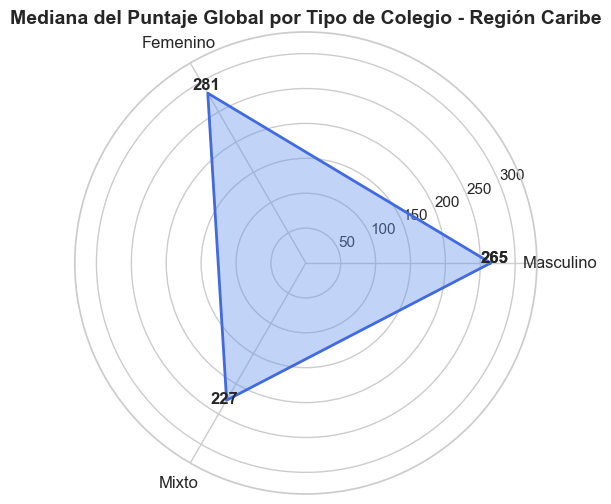

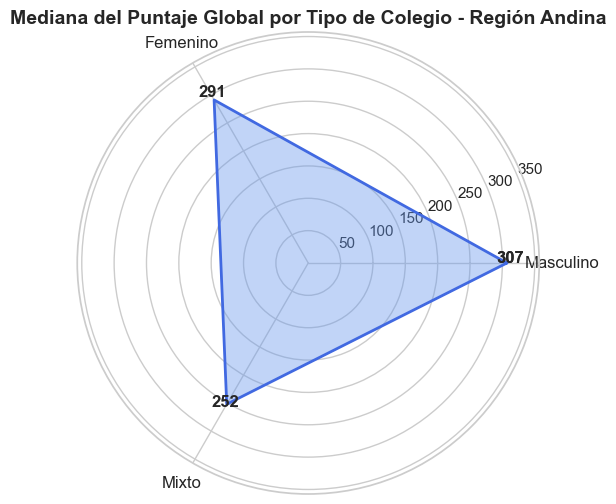

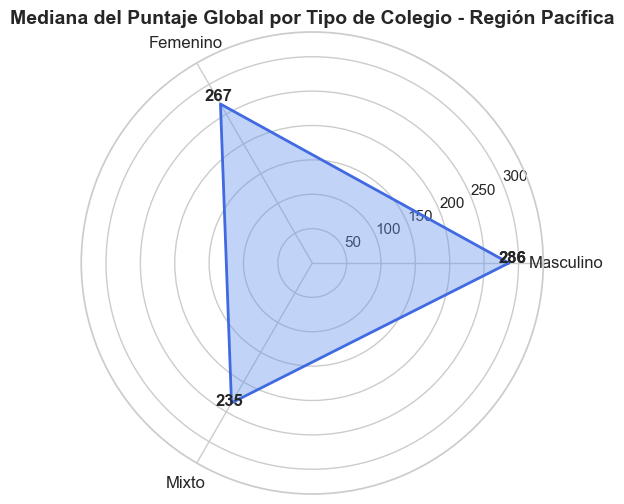

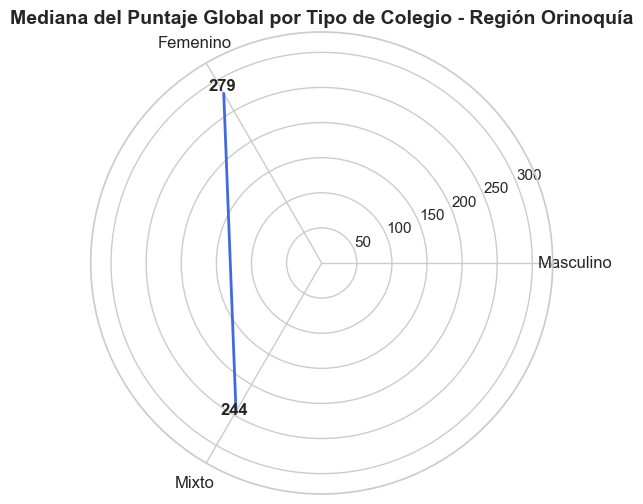

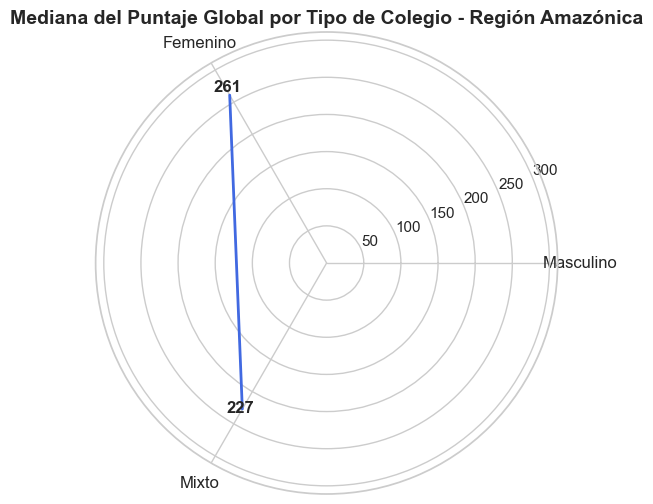

In [150]:
# Suponiendo que tienes la columna "region" en tu DataFrame icfes

import matplotlib.pyplot as plt
import numpy as np

# Lista de categorías de género en el orden deseado
categories = ["Masculino", "Femenino", "Mixto"]

# Obtener todas las regiones únicas
regiones = icfes["region"].unique()

# Iterar sobre cada región
for reg in regiones:
    # Filtrar datos de la región actual
    data_region = icfes[icfes["region"] == reg]
    
    # Calcular la mediana por tipo de colegio
    median_scores = data_region.groupby("colegio_genero")["puntaje_global"].median()
    
    # Asegurar que todas las categorías están en el mismo orden
    values = [median_scores.get(cat, np.nan) for cat in categories]  # si falta algún tipo, pone NaN
    values += values[:1]  # cerrar el radar
    
    # Calcular ángulos
    angles = np.linspace(0, 2 * np.pi, len(categories) + 1, endpoint=True)
    
    # Crear el radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Dibujar el área del radar
    ax.fill(angles, values, color='cornflowerblue', alpha=0.4)
    ax.plot(angles, values, color='royalblue', linewidth=2)
    
    # Colocar etiquetas de categorías
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    
    # Agregar valores numéricos
    for angle, value, label in zip(angles, values, categories + [categories[0]]):
        if not np.isnan(value):  # solo poner número si existe valor
            ax.text(angle, value + 5, f"{int(value)}", ha='center', fontsize=12, fontweight='bold')
    
    # Ajustar límites y título
    ax.set_ylim(0, np.nanmax(values) + 50)
    ax.set_title(f"Mediana del Puntaje Global por Tipo de Colegio - Región {reg}",
                 fontsize=14, fontweight="bold")
    
    plt.show()


In [151]:
# Agrupar por región y género, calculando la mediana del puntaje
median_table = (
    icfes
    .groupby(["region", "colegio_genero"])["puntaje_global"]
    .median()
    .reset_index()
)

# Pivotar para ver cada región como fila y cada género como columna
median_table_pivot = median_table.pivot(
    index="region",
    columns="colegio_genero",
    values="puntaje_global"
)

# (Opcional) Ordenar columnas en el orden que prefieras
median_table_pivot = median_table_pivot[["Masculino", "Femenino", "Mixto"]]

# Mostrar la tabla
print(median_table_pivot)


colegio_genero  Masculino  Femenino  Mixto
region                                    
Amazónica             NaN    261.00 227.00
Andina             307.00    291.00 252.00
Caribe             265.00    281.00 227.00
Orinoquía             NaN    279.00 244.00
Pacífica           286.00    267.00 235.00


In [152]:
icfes.head(4)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres,nivel_libros,nivel_lectura,perfil_lector
0,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,5.00,Estrato 3,Moderado,1,1,0,1,1,0,0,0,Peor,>100,30-60 min,Insuficiente,Aceptable,Muy Insuficiente,Profesional,Sin Actividad Remunerada,Bachiller,No Aplica,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,47,33,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00,Estrato 3,201-300,Educación Superior,Alto,Alto,"Buen Apoyo, Buen Habito"
1,Colombia,Masculino,Andina,No,16,15-19,0,Más de 1 hogar,3.00,Estrato 3,Moderado,1,1,1,1,1,1,0,0,Mejor,>100,30-60 min,Óptimo,Aceptable,Insuficiente,Tecnico/Tecnologo,Microempresario,Tecnico/Tecnologo,Trabajador Independiente,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,60,76,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00,Estrato 3,201-300,Educación Técnica,Alto,Alto,"Buen Apoyo, Buen Habito"
2,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar grande,2.00,Estrato 1,Mucho,0,1,0,1,0,0,0,0,Igual,26-100,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,66,91,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00,Estrato 1,201-300,Bachillerato Completo,Alto,Alto,"Buen Apoyo, Buen Habito"
3,Colombia,Masculino,Andina,No,17,15-19,0,Hogar tradicional,2.00,Estrato 3,Moderado,0,0,1,0,0,0,0,0,Igual,11-25,0-30 min,Óptimo,Óptimo,Aceptable,Primaria Inc,Microempresario,Bachiller,No Aplica,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,62,81,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00,Estrato 3,301-400,Al Menos Un Bachiller,Bajo,Bajo,"Poco Apoyo, Poco Habito"


In [153]:
icfes.groupby(['colegio_jornada', 'colegio_naturaleza'])['puntaje_global'].agg(['mean', 'std']).round(0).sort_values(by = 'mean', ascending=False)

,,mean,std
colegio_jornada,colegio_naturaleza,,
Completa,No Oficial,294.00,48.00
Unica,No Oficial,278.00,46.00
Mañana,No Oficial,261.00,53.00
Unica,Oficial,252.00,46.00
Tarde,Oficial,246.00,46.00
Mañana,Oficial,245.00,47.00
Completa,Oficial,244.00,47.00
Tarde,No Oficial,240.00,51.00
Noche,No Oficial,214.00,42.00


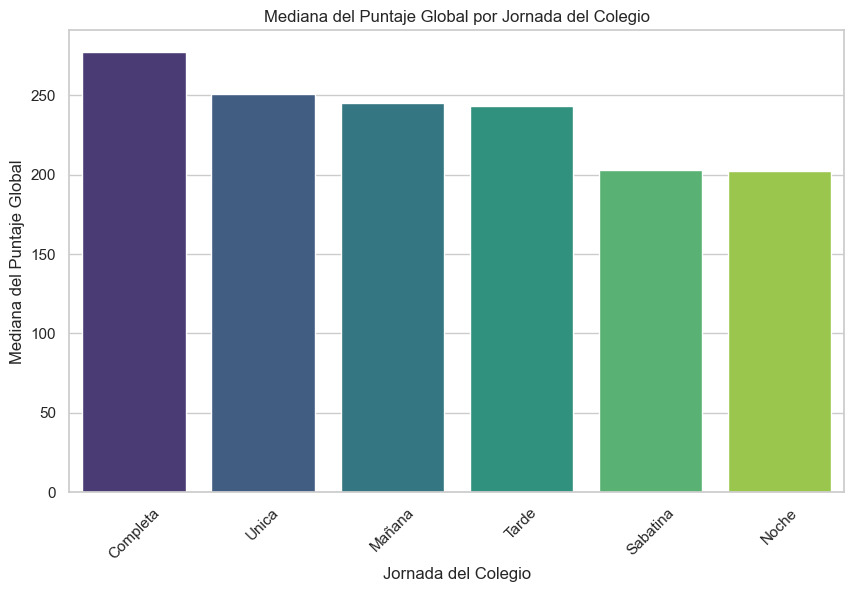

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular la mediana del Puntaje_Global para cada Colegio_Jornada
df_median = icfes.groupby('colegio_jornada')['puntaje_global'].median().reset_index()
df_median = df_median.sort_values(by='puntaje_global', ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_median, x='colegio_jornada', y='puntaje_global', palette='viridis')

# Agregar etiquetas
plt.xlabel('Jornada del Colegio')
plt.ylabel('Mediana del Puntaje Global')
plt.title('Mediana del Puntaje Global por Jornada del Colegio')

# Rotar etiquetas del eje X si hay muchas categorías
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [155]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Modelo ANOVA
modelo = ols('puntaje_global ~ C(colegio_jornada)', data=icfes).fit()
anova_tabla = sm.stats.anova_lm(modelo, typ=2)
print(anova_tabla)


                          sum_sq        df        F  PR(>F)
C(colegio_jornada)  170146447.31      5.00 14945.29    0.00
Residual           1152501226.30 506166.00      NaN     NaN


In [156]:
import pingouin as pg

welch = pg.welch_anova(dv='puntaje_global', between='colegio_jornada', data=icfes)
print(welch)

# Post-hoc (Games-Howell)
posthoc = pg.pairwise_gameshowell(dv='puntaje_global', between='colegio_jornada', data=icfes)
print(posthoc)

            Source  ddof1     ddof2        F  p-unc  np2
0  colegio_jornada      5 130835.55 18310.83   0.00 0.13
           A         B  mean(A)  mean(B)   diff   se       T        df  pval  \
0   Completa    Mañana   275.26   247.56  27.70 0.21  133.64 138746.89  0.00   
1   Completa     Noche   275.26   206.85  68.41 0.29  235.08  69133.81  0.00   
2   Completa  Sabatina   275.26   207.21  68.05 0.27  247.51  85738.11  0.00   
3   Completa     Tarde   275.26   245.45  29.81 0.27  110.83 128030.67  0.00   
4   Completa     Unica   275.26   252.39  22.87 0.26   88.36 144668.58  0.00   
5     Mañana     Noche   247.56   206.85  40.71 0.25  164.29  41329.63  0.00   
6     Mañana  Sabatina   247.56   207.21  40.35 0.23  176.43  50535.50  0.00   
7     Mañana     Tarde   247.56   245.45   2.12 0.22    9.55  84810.10  0.00   
8     Mañana     Unica   247.56   252.39  -4.82 0.21  -23.07 103114.02  0.00   
9      Noche  Sabatina   206.85   207.21  -0.36 0.31   -1.18  61171.96  0.85   
10    

In [157]:
# Propuesta de renombramiento interpretativo
mapa_jornadas = {
    'Completa': 'Completa',
    'Única': 'Única',
    'Mañana': 'Tradicional',
    'Tarde': 'Tradicional',
    'Sabatina': 'Validación',
    'Noche': 'Validación'
}

icfes['colegio_jornada'] = icfes['colegio_jornada'].replace(mapa_jornadas)

icfes['colegio_jornada'].value_counts(dropna=False)


colegio_jornada
Tradicional    294961
Completa        85050
Unica           63314
Validación      62847
Name: count, dtype: int64

##### CONCLUSIONES

🧩 Hallazgos sobre características del colegio y su interacción con el contexto del estudiante

- **Nivel Socioeconómico (NSE) del Colegio**  
  - A mayor NSE institucional, el puntaje global tiende a ser **mayor** para todos los estudiantes.  
  - El efecto es **fuerte** y consistente entre regiones y tipos de colegio.

- **NSE del Estudiante**  
  - De forma independiente, también está asociado con **mayores** puntajes globales.  
  - El gradiente es claro: a mayor NSE personal, mejor desempeño, incluso en colegios con menor NSE.

- **Interacción NSE Colegio × NSE Estudiante**  
  - Estudiantes con **NSE bajo** tienen **ganancias relativas mayores** cuando estudian en colegios con NSE alto.  
  - Los estudiantes con **NSE alto** mejoran en colegios con NSE alto, pero con un **incremento menor** (ya parten de un mejor puntaje).  
  - Este patrón indica un **efecto sinérgico**: el impacto de la calidad del colegio **depende** del contexto socioeconómico del estudiante.

- **Tipo de Colegio (Masculino, Femenino, Mixto)**  
  - Los colegios **masculinos** y **femeninos** tienden a superar en mediana a los mixtos, aunque las diferencias no son uniformes en todas las regiones.  
  - Cuando se analiza por región, en algunas zonas (p. ej. Andina, Caribe) las diferencias son más marcadas que en otras, sugiriendo que el **efecto depende del contexto regional**.

---

💡 Implicaciones para el modelo

- Mantener **`nse_estudiante`** y **`nse_colegio`** como variables categóricas independientes.  
- Probar incluir un término de **interacción** entre ambas (`nse_estudiante * nse_colegio`) para capturar el efecto sinérgico observado.  
- Mantener **`colegio_genero`** solo si el análisis regional indica efectos consistentes; de lo contrario, puede ser prescindible como predictor global.

---

🛠️ Próximos pasos en Feature Engineering

- Evaluar el rendimiento predictivo con y sin la interacción (`nse_estudiante * nse_colegio`) para validar si mejora métricas del modelo.  
- Confirmar que no haya categorías (o combinaciones) con **pocos registros** para evitar inestabilidad en el modelo.  
- Revisar posibles interacciones adicionales (p. ej. región × tipo de colegio) si en el análisis exploratorio muestran diferencias consistentes.



#### 2.2.5 ALIMENTACIÓN DEL ESTUDIANTE

In [158]:
print(icfes['freq_leche_derivados'].value_counts(dropna=False))
print(icfes['freq_carne_pescado_similares'].value_counts(dropna=False))
print(icfes['freq_cereales_frutos_legumbres'].value_counts(dropna=False))

freq_leche_derivados
Insuficiente        167619
Óptimo              158046
Aceptable           131517
Muy Insuficiente     43477
None                  5513
Name: count, dtype: int64
freq_carne_pescado_similares
Óptimo              205669
Aceptable           151683
Insuficiente        122193
Muy Insuficiente     25101
None                  1526
Name: count, dtype: int64
freq_cereales_frutos_legumbres
Insuficiente        194960
Aceptable           151581
Óptimo               86865
Muy Insuficiente     70226
None                  2540
Name: count, dtype: int64


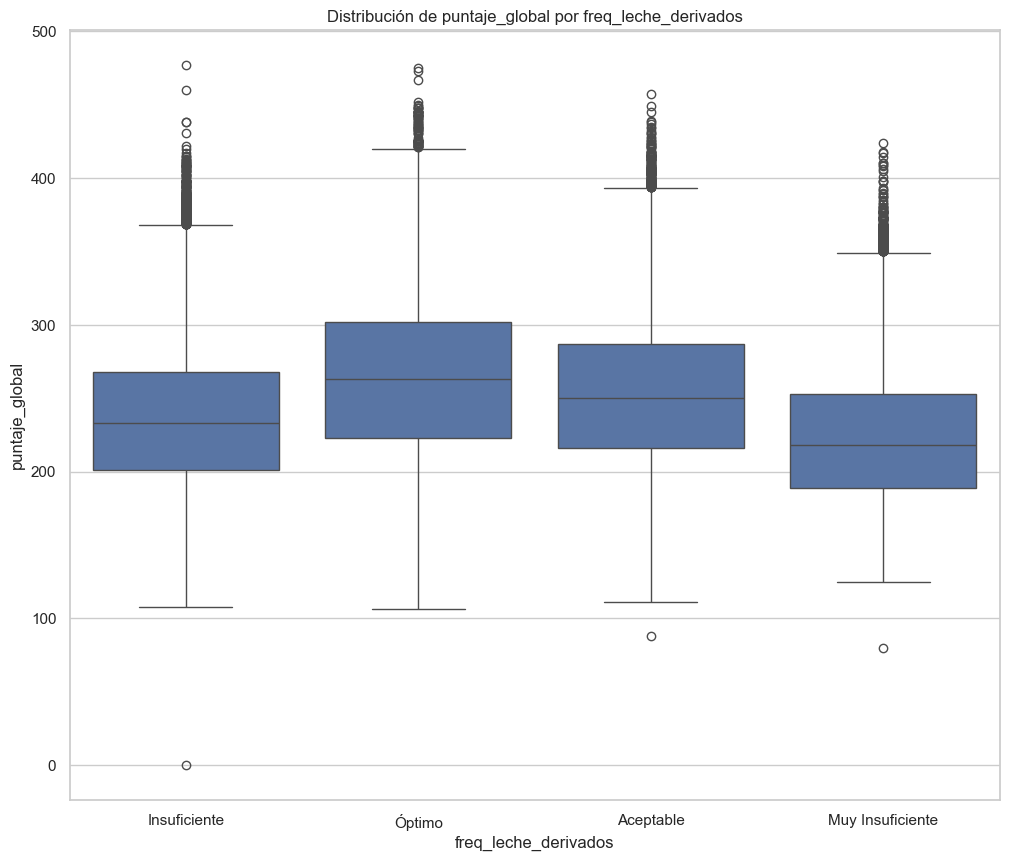

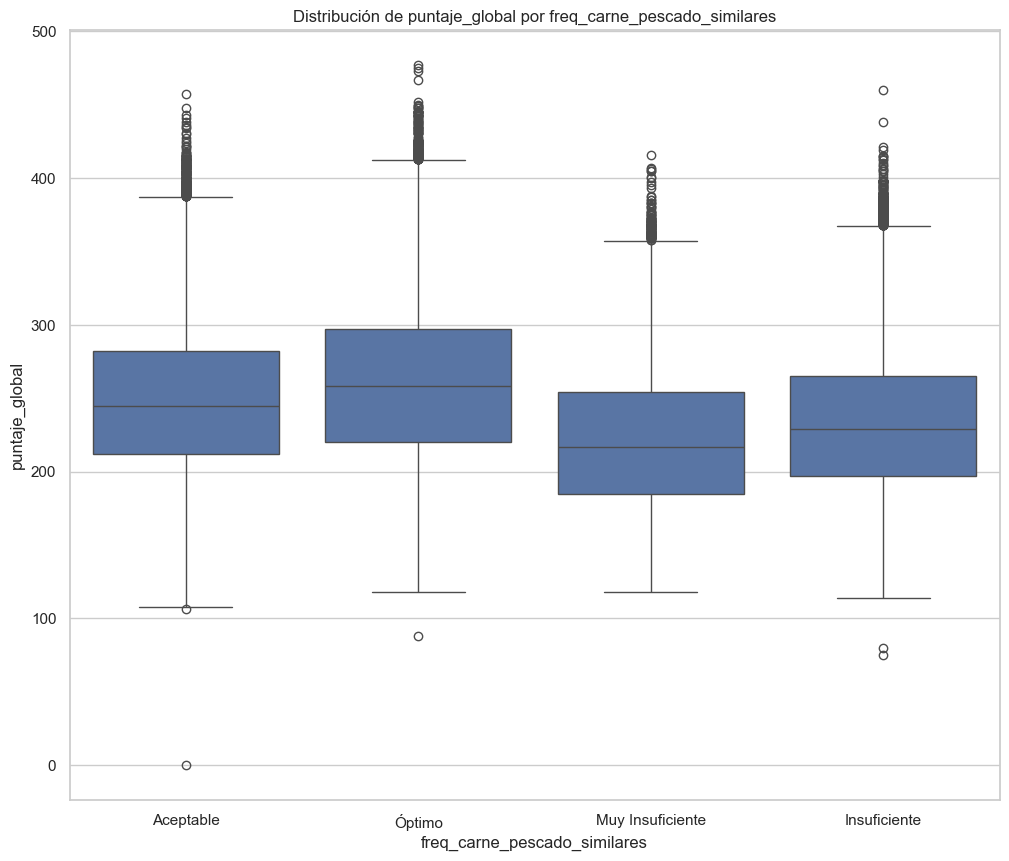

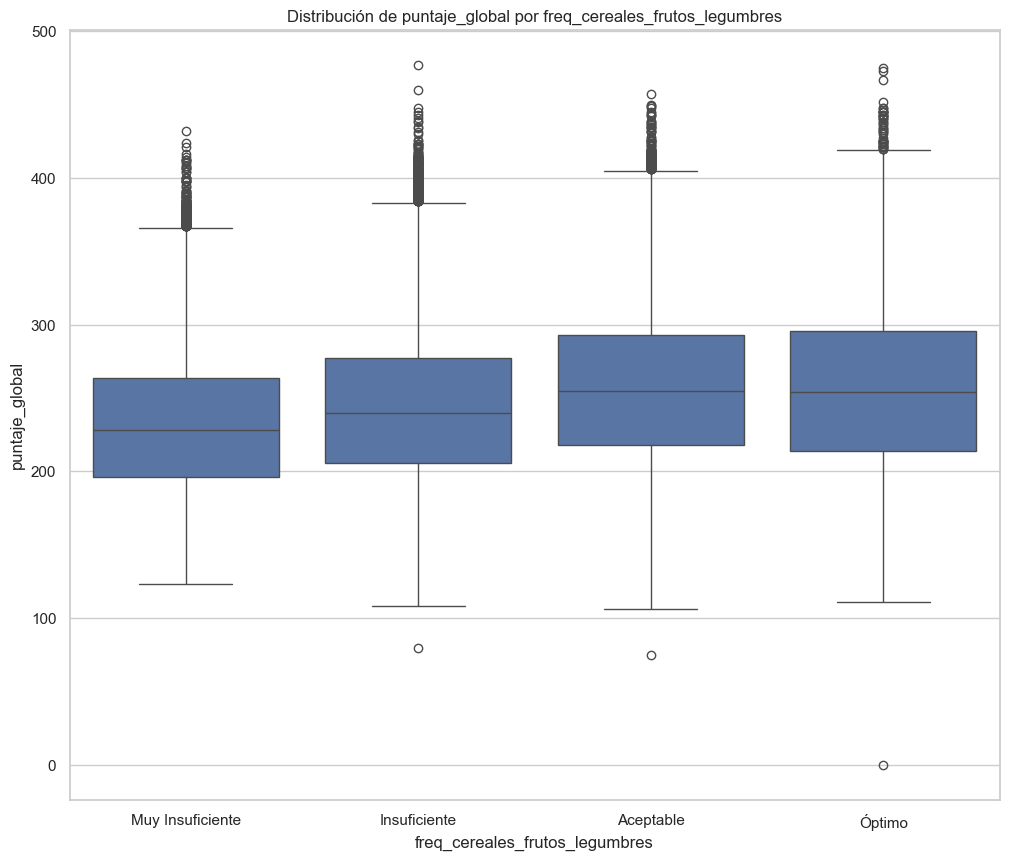

In [159]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=icfes, x='freq_leche_derivados', y='puntaje_global')
plt.title("Distribución de puntaje_global por freq_leche_derivados")
plt.show()

plt.figure(figsize=(12, 10))
sns.boxplot(data=icfes, x='freq_carne_pescado_similares', y='puntaje_global')
plt.title("Distribución de puntaje_global por freq_carne_pescado_similares")
plt.show()

plt.figure(figsize=(12, 10))
sns.boxplot(data=icfes, x='freq_cereales_frutos_legumbres', y='puntaje_global')
plt.title("Distribución de puntaje_global por freq_cereales_frutos_legumbres")
plt.show()

### 2.3 MATRICES DE CORRELACIÓN ENTRE PREDICTORAS

In [160]:
icfes.sample(5)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,estrato_cat,rango_puntaje,educacion_padres,nivel_libros,nivel_lectura,perfil_lector
145954,Colombia,Masculino,Andina,No,33,30-34,1,Hogar tradicional,3.00,Estrato 3,Promedio,1,1,1,1,0,1,0,0,Mejor,0-10,No lee,Aceptable,Óptimo,Aceptable,Primaria Inc,Sin Actividad Remunerada,Primaria Inc,Directivos,Tiempo Completo,Sin Remuneración,Mixto,No Oficial,A,S,Urbano,Validación,Medellín,Antioquia,48,35,50,47,2,42,30,2,42,42,2,46.00,46,A-,228,39.00,51.30,3.00,3.00,Estrato 3,201-300,Educación Primaria Incompleta,Bajo,Bajo,"Poco Apoyo, Poco Habito"
164345,Colombia,Masculino,Caribe,No,18,15-19,0,Hogar tradicional,2.00,Estrato 1,Moderado,0,0,0,1,0,1,1,0,Igual,0-10,0-30 min,Muy Insuficiente,Muy Insuficiente,Muy Insuficiente,Tecnico/Tecnologo,Sin Información,Bachiller,Sin Información,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Tradicional,Cartagena De Indias,Bolivar,57,67,44,30,2,55,73,2,46,53,2,59.00,80,A2,256,59.00,42.23,2.00,3.00,Estrato 1,201-300,Educación Técnica,Bajo,Bajo,"Poco Apoyo, Poco Habito"
307951,Colombia,Femenino,Orinoquía,No,17,15-19,0,Hogar tradicional,3.00,Estrato 1,Promedio,0,1,0,1,0,0,1,0,Igual,0-10,0-30 min,Insuficiente,Insuficiente,Insuficiente,Primaria,Sin Actividad Remunerada,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,Villavicencio,Meta,61,80,49,46,2,48,51,2,42,40,2,39.00,25,A-,246,52.00,42.79,2.00,3.00,Estrato 1,201-300,Al Menos Un Bachiller,Bajo,Bajo,"Poco Apoyo, Poco Habito"
444820,Colombia,Femenino,Caribe,No,18,15-19,0,Hogar tradicional,2.00,Estrato 1,Ninguno,0,1,0,1,0,0,0,0,Igual,11-25,30-60 min,Insuficiente,Insuficiente,Insuficiente,Bachiller,No Aplica,Bachiller Inc,Profesionales,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Tradicional,Cartagena De Indias,Bolivar,38,9,35,11,1,40,23,1,28,6,1,48.00,50,A1,181,10.00,45.77,2.00,3.00,Estrato 1,101-200,Al Menos Un Bachiller,Bajo,Alto,"Poco Apoyo, Buen Habito"
115612,Colombia,Femenino,Caribe,No,18,15-19,0,Más de 1 hogar,3.00,Estrato 4,Poco,0,1,0,1,0,0,0,0,Peor,11-25,1-2h,Insuficiente,Insuficiente,Muy Insuficiente,Primaria Inc,No Aplica,Primaria,No Aplica,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,Barranquilla,Atlantico,42,19,32,6,1,42,31,2,43,44,2,52.00,62,A1,203,22.00,38.62,1.00,2.00,Estrato 4,201-300,Educación Primaria,Bajo,Alto,"Poco Apoyo, Buen Habito"


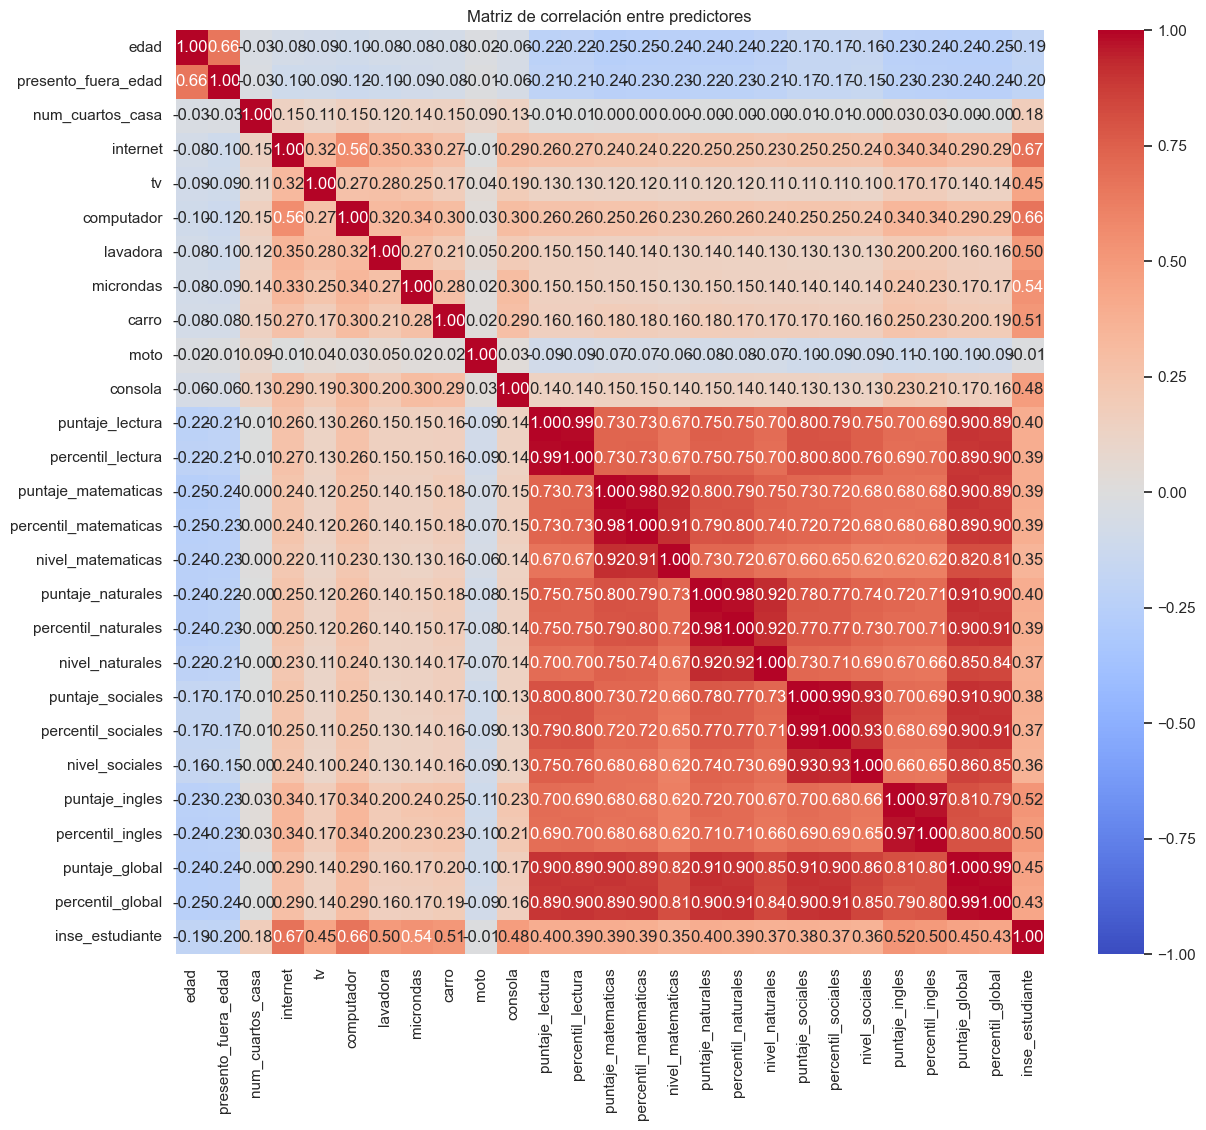

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Seleccionar solo las variables numéricas ---
# Si tus datos están en un DataFrame llamado icfes:
numeric_features = icfes.select_dtypes(include=['int64', 'float64'])

# --- 2. Calcular la matriz de correlación ---
corr_matrix = numeric_features.corr(method='pearson')  # o spearman si hay ordinales no lineales

# --- 3. Visualizar como mapa de calor ---
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación entre predictores")
plt.show()


## 3. EXPORTAR ARCHIVO

In [162]:
eliminar = ['nivel_libros', 'nivel_lectura', 'rango_puntaje', 'estrato_cat', 'percentil_global', 'percentil_lectura', 'percentil_matematicas', 
            'nivel_matematicas',  'percentil_naturales', 'nivel_naturales', 'percentil_sociales', 'nivel_sociales', 'percentil_ingles', 'nivel_ingles',
            'puntaje_lectura', 'puntaje_matematicas', 'puntaje_naturales', 'puntaje_sociales', 'puntaje_ingles', 'grupo_edad', 'colegio_dpto', 'colegio_mpio',
            'colegio_caracter', 'colegio_calendario', 'situacion_economica_casa', 'inse_estudiante', 'tipo_remuneracion', 'genero']

icfes = icfes.drop(columns=eliminar)

In [163]:
# Ahora crear la variable combinada
condiciones_trabajo = [
    # Sin información
    (icfes['actividad_madre'].isna()) & (icfes['actividad_padre'].isna()),
    
    # No aplica
    (icfes['actividad_madre'] == 'No Aplica') | (icfes['actividad_padre'] == 'No Aplica'),
    
    # Sin información disponible
    (icfes['actividad_madre'] == 'Sin Información') & (icfes['actividad_padre'] == 'Sin Información'),
    
    # Profesionales y Directivos (nivel más alto)
    (icfes['actividad_madre'].isin(['Directivos', 'Profesionales'])) | 
    (icfes['actividad_padre'].isin(['Directivos', 'Profesionales'])),
    
    # Microempresarios y Trabajadores Independientes
    (icfes['actividad_madre'].isin(['Microempresario', 'Trabajador Independiente'])) | 
    (icfes['actividad_padre'].isin(['Microempresario', 'Trabajador Independiente'])),
    
    # Trabajadores Operativos
    (icfes['actividad_madre'] == 'Trabajadores Operativos') | 
    (icfes['actividad_padre'] == 'Trabajadores Operativos'),
    
    # Sector Primario
    (icfes['actividad_madre'] == 'Sector Primario') | 
    (icfes['actividad_padre'] == 'Sector Primario'),
    
    # Pensionados
    (icfes['actividad_madre'] == 'Pensionado') | 
    (icfes['actividad_padre'] == 'Pensionado'),
    
    # Sin actividad remunerada (ambos)
    (icfes['actividad_madre'] == 'Sin Actividad Remunerada') & 
    (icfes['actividad_padre'] == 'Sin Actividad Remunerada'),
    
    # Al menos uno sin actividad remunerada
    (icfes['actividad_madre'] == 'Sin Actividad Remunerada') | 
    (icfes['actividad_padre'] == 'Sin Actividad Remunerada')
]

# Valores correspondientes
valores_trabajo = [
    'Sin Información',
    'No Aplica',
    'Sin Información',
    'Profesionales/Directivos',
    'Empresarios/Independientes',
    'Trabajadores Operativos',
    'Sector Primario',
    'Pensionados',
    'Hogar Sin Ingresos',
    'Hogar Con Actividad Limitada'
]

# Crear la nueva variable
icfes['actividad_padres'] = np.select(condiciones_trabajo, valores_trabajo, default='Otros Casos')

# Ver distribución
print("Distribución de actividad laboral de padres:")
print(icfes['actividad_padres'].value_counts())

Distribución de actividad laboral de padres:
actividad_padres
Trabajadores Operativos         144924
Empresarios/Independientes      116610
Profesionales/Directivos         76914
No Aplica                        63771
Sector Primario                  57828
Hogar Sin Ingresos               19550
Hogar Con Actividad Limitada     13987
Pensionados                       6739
Sin Información                   5668
Otros Casos                        181
Name: count, dtype: int64


In [164]:
icfes = icfes.rename(columns={'colegio_naturaleza': 'colegio_publico'})


In [ ]:
icfes.to_parquet("C:/Users/CACTU/Downloads/Proyectos/prediccion-icfes-colombia/data/procesada/icfes_analizado.parquet", index=False, engine="pyarrow")